<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div> 


# Colab Yahoo Introduction to the Research Environment

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

##Code Cells vs. Text Cells

As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

##Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

In [ ]:
2 + 2

4

Sometimes there is no result to be printed, as is the case with assignment.

In [ ]:
X = 2

Remember that only the result from the last line is printed.

In [ ]:
2 + 2
3 + 3

6

However, you can print whichever lines you want using the `print` statement.

In [ ]:
print(2 + 2)
3 + 3

4


6

##Knowing When a Cell is Running

While a cell is running, a `[*]` will display on the left. When a cell has yet to be executed, `[ ]` will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook `[5]`. Try on this cell and note it happening.

In [ ]:
#Take some time to run something
c = 0
for i in range(10000000):
    c = c + i
c

49999995000000

##Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The `as` statement allows this. Here we use `np` and `pd` as aliases for `numpy` and `pandas`. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

In [ ]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

##Tab Autocomplete

Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the `.` and pressing tab.

In [ ]:
np.random.bytes  

<function RandomState.bytes>

##Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [ ]:
np.random.normal?

##Sampling

We'll sample some random data using a function from `numpy`.

In [ ]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)
X

array([-0.32228387, -1.36958528, -0.70543669,  0.74549153, -0.85151822,
       -0.9771097 , -0.66492723, -1.52458106,  1.13925018, -0.35652481,
       -0.30609577,  2.55475882, -1.25596934,  1.47102062, -0.25740082,
       -0.97143226,  0.43936704,  0.73957503,  1.05099222,  1.24728673,
       -0.82741617,  0.84239517, -0.8496774 , -1.41085233, -1.33546221,
        1.50333479,  0.27178985, -0.24019581,  0.867803  ,  0.1717732 ,
        0.51349052, -0.8857871 ,  0.61337238, -0.67098871, -1.09256115,
       -1.62591736,  0.06923546,  0.02848488,  0.48915007,  0.78075141,
        0.14886917, -0.93939509,  2.29740231, -0.22382509, -0.38692019,
        0.56742765, -2.23833898,  0.27287522,  0.92466721, -3.03320617,
       -0.35163343,  1.93059219,  1.6078106 , -1.01037752, -0.17779387,
        1.30970197, -0.62230448, -0.97033095,  0.30552918, -0.12113918,
        0.81633601,  0.27051957, -0.73592821,  0.0160093 ,  0.81625401,
       -0.90401657, -0.92779561, -0.55323901, -1.26495042, -1.13

##Plotting

We can use the plotting library we imported as follows.

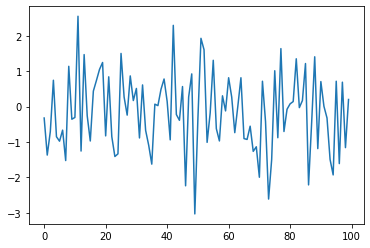

In [ ]:
plt.plot(X)

###Squelching Line Output

You might have noticed the annoying line of the form `[<matplotlib.lines.Line2D at 0x7f72fdbc1710>]` before the plots. This is because the `.plot` function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

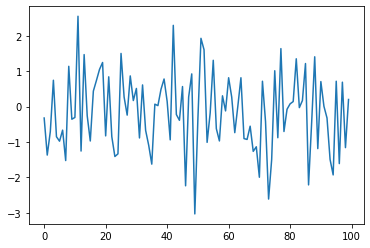

In [ ]:
plt.plot(X);

###Adding Axis Labels

No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

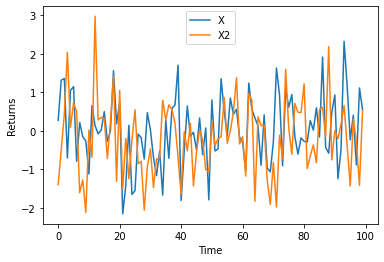

In [ ]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

##Generating Statistics

Let's use `numpy` to take some simple statistics.

In [ ]:
np.mean(X)

0.02663698439839667

In [ ]:
np.std(X)

0.8766006709409959

##Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

data = yf.download("MSFT", start="2012-1-1", end="2015-6-1")

[*********************100%***********************]  1 of 1 completed


Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.413069,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.916996,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.140970,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.484924,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.188961,59706800
...,...,...,...,...,...,...
2015-05-22,47.299999,47.349998,46.820000,46.900002,41.389183,25720600
2015-05-26,46.830002,46.880001,46.189999,46.590000,41.115612,29581900
2015-05-27,46.820000,47.770000,46.619999,47.610001,42.015751,27335600


This is a pandas dataframe, so we can index in to just get price like this. For more info on pandas, please [click here](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [ ]:
X = data['Close']

Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

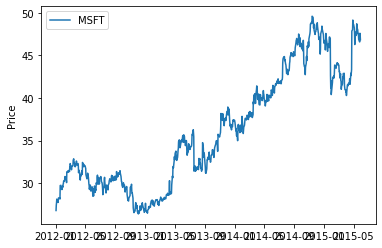

In [ ]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

**My own example 1**

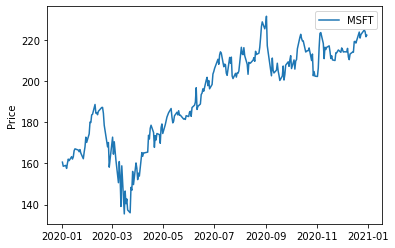

In [ ]:
plt.plot(Y.index, Y.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

We can get statistics again on real data.

In [ ]:
np.mean(X)

36.05204441837061

**My own example 2**

In [ ]:
np.mean(Y)

193.02612642431447

In [ ]:
np.std(X)

6.691260772637948

**My own example 3**

In [ ]:
np.std(Y)

22.950071607823865

##Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).

In [ ]:
R = X.pct_change()[1:]

**My own example 4**

In [ ]:
D = Y.pct_change()[1:]

We can plot the returns distribution as a histogram.

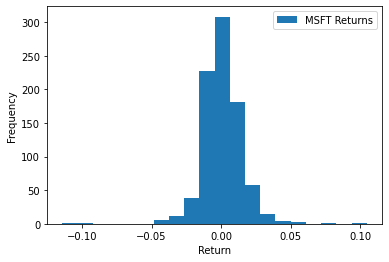

In [ ]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

**My own example 5**

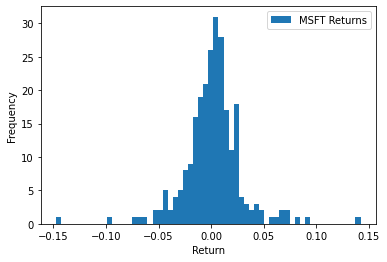

In [ ]:
import matplotlib.pyplot as plt
plt.hist(D, bins=60)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

Get statistics again.

In [ ]:
np.mean(R)

0.0007593053938455802

**My own example 6**

In [ ]:
np.mean(D)

0.001675393471272009

In [ ]:
np.std(R)

0.014427919863141543

**My own example 7**

In [ ]:
np.std(D)

0.027628921616877657

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

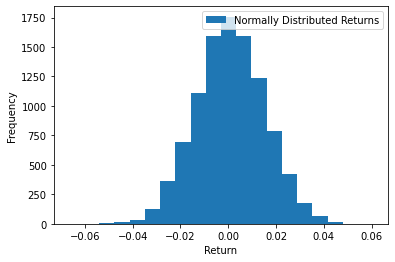

In [ ]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

**My own example 8**

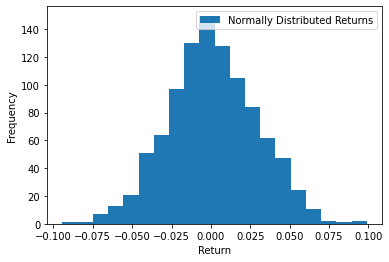

In [ ]:
plt.hist(np.random.normal(np.mean(D), np.std(D), 1000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

##Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

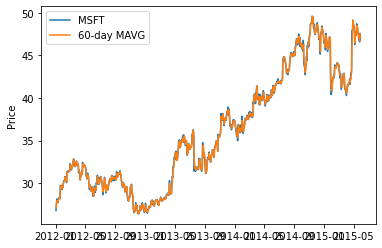

In [ ]:
# Take the average of the last 60 days at each timepoint.
MAVG = X.rolling(2).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

**My own example 9**

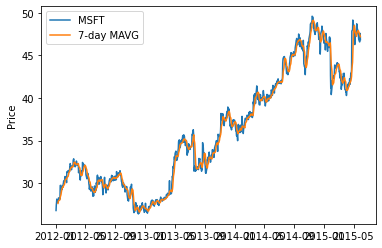

In [ ]:
# Take the average of the last 7 days at each timepoint.
MAVG = pd.DataFrame.rolling(X,window=7).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '7-day MAVG']);

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div> 

# Introduction to Python
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---

All of the coding that you will do on the Quantopian platform will be in Python. It is also just a good, jack-of-all-trades language to know! Here we will provide you with the basics so that you can feel confident going through our other lectures and understanding what is happening.

## Code Comments

A comment is a note made by a programmer in the source code of a program. Its purpose is to clarify the source code and make it easier for people to follow along with what is happening. Anything in a comment is generally ignored when the code is actually run, making comments useful for including explanations and reasoning as well as removing specific lines of code that you may be unsure about. Comments in Python are created by using the pound symbol (`# Insert Text Here`). Including a `#` in a line of code will comment out anything that follows it.

In [ ]:
# This is a comment
# These lines of code will not change any values
# Anything following the first # is not run as code

**My own example 10**

In [ ]:
#print(5) como es un comentario esto no se ejecutara

You may hear text enclosed in triple quotes (`""" Insert Text Here """`) referred to as multi-line comments, but this is not entirely accurate. This is a special type of `string` (a data type we will cover), called a `docstring`, used to explain the purpose of a function.

In [ ]:
""" This is a special string """

' This is a special string '

Make sure you read the comments within each code cell (if they are there). They will provide more real-time explanations of what is going on as you look at each line of code.

## Variables

Variables provide names for values in programming. If you want to save a value for later or repeated use, you give the value a name, storing the contents in a variable. Variables in programming work in a fundamentally similar way to variables in algebra, but in Python they can take on various different data types.

The basic variable types that we will cover in this section are `integers`, `floating point numbers`, `booleans`, and `strings`. 

An `integer` in programming is the same as in mathematics, a round number with no values after the decimal point. We use the built-in `print` function here to display the values of our variables as well as their types!

In [ ]:
my_integer = 50
print(my_integer, type(my_integer))

50 <class 'int'>


**My own example 11**

In [ ]:
entero = 77     
flotante = 7.7  
nombre = "hola mundo" 
print (entero, type(entero))
print (flotante, type(flotante))
print (nombre, type(nombre))

77 <class 'int'>
7.7 <class 'float'>
hola mundo <class 'str'>


Variables, regardless of type, are assigned by using a single equals sign (`=`). Variables are case-sensitive so any changes in variation in the capitals of a variable name will reference a different variable entirely.

In [ ]:
one = 1
print(one)

1


**My own example 12**

In [ ]:
numero = 2
numero = 3
print (numero)

3


A `floating point` number, or a `float` is a fancy name for a real number (again as in mathematics). To define a `float`, we need to either include a decimal point or specify that the value is a float.

In [ ]:
my_float = 1.0
print(my_float, type(my_float))
my_float = float(1)
print(my_float, type(my_float))

1.0 <class 'float'>
1.0 <class 'float'>


**My own example 13**

In [ ]:
flotante = 33.7
flotante2 = int(5.3)
print(flotante, type(flotante))
print(flotante2, type(flotante2))

33.7 <class 'float'>
5 <class 'int'>


A variable of type `float` will not round the number that you store in it, while a variable of type `integer` will. This makes `floats` more suitable for mathematical calculations where you want more than just integers.

Note that as we used the `float()` function to force an number to be considered a `float`, we can use the `int()` function to force a number to be considered an `int`.

In [ ]:
my_int = int(3.14159)
print(my_int, type(my_int))

3 <class 'int'>



**My own example 14**

In [ ]:
parte_entera = int(3.1416)
numero_flotante = 3.1416

print("Numero flotante: ", numero_flotante)
print("Parte entera del numero flotante:", parte_entera)

Numero flotante:  3.1416
Parte entera del numero flotante: 3


The `int()` function will also truncate any digits that a number may have after the decimal point!

Strings allow you to include text as a variable to operate on. They are defined using either single quotes ('') or double quotes ("").

In [ ]:
my_string = 'This is a string with single quotes'
print(my_string)
my_string = "This is a string with double quotes"
print(my_string)

This is a string with single quotes
This is a string with double quotes


**My own example 15**

In [ ]:
nombre = 'Brandon'
nombre2 = "Styven"
apellido = "Forero"
apellido2 = "Briceño"
print(nombre, nombre2, apellido, apellido2)

Brandon Styven Forero Briceño


Both are allowed so that we can include apostrophes or quotation marks in a string if we so choose.

In [ ]:
my_string = '"Jabberwocky", by Lewis Carroll'
print(my_string)
my_string = "'Twas brillig, and the slithy toves / Did gyre and gimble in the wabe;"
print(my_string)

"Jabberwocky", by Lewis Carroll
'Twas brillig, and the slithy toves / Did gyre and gimble in the wabe;


Booleans, or `bools` are binary variable types. A `bool` can only take on one of two values, these being `True` or `False`. There is much more to this idea of truth values when it comes to programming, which we cover later in the [Logical Operators](#id-section5) of this notebook.

In [ ]:
my_bool = True
print(my_bool, type(my_bool))

True <class 'bool'>


**My own example 16**

In [ ]:
booleano = not False
print (not booleano, type(booleano))

False <class 'bool'>


There are many more data types that you can assign as variables in Python, but these are the basic ones! We will cover a few more later as we move through this tutorial.

## Basic Math

Python has a number of built-in math functions. These can be extended even further by importing the **math** package or by including any number of other calculation-based packages.

All of the basic arithmetic operations are supported: `+`, `-`, `/`, and `*`. You can create exponents by using `**` and modular arithmetic is introduced with the mod operator, `%`.

In [ ]:
print('Addition: ', 2 + 2)
print('Subtraction: ', 7 - 4)
print('Multiplication: ', 2 * 5)
print('Division: ', 10 / 2)
print('Exponentiation: ', 3**2)

Addition:  4
Subtraction:  3
Multiplication:  10
Division:  5.0
Exponentiation:  9


**My own example 17**

In [ ]:
print ('Suma: ', 38 + 25)
print ('Resta: ', 10 - (-113))
print ('Multiplicación: ', 7 * 3)
print ('Division: ', 45 / 50)
print ('Exponenciación: ', 2**3)

Suma:  63
Resta:  123
Multiplicación:  21
Division:  0.9
Exponenciación:  8


If you are not familiar with the the mod operator, it operates like a remainder function. If we type $15 \ \% \ 4$, it will return the remainder after dividing $15$ by $4$.

In [ ]:
print('Modulo: ', 15 % 4)

Modulo:  3


**My own example 18**

In [ ]:
print ('Modulo: ', 8 % 2)

Modulo:  0


Mathematical functions also work on variables!

In [ ]:
first_integer = 4
second_integer = 5
print(first_integer * second_integer)

20


**My own example 19**

In [ ]:
num_1 = 440
num_2 = 273
print(num_1 * num_2 * 100)

12012000


Make sure that your variables are floats if you want to have decimal points in your answer. If you perform math exclusively with integers, you get an integer. Including any float in the calculation will make the result a float.

In [ ]:
first_integer = 11
second_integer = 3
print(first_integer / second_integer)

3.6666666666666665


**My own example 20**

In [ ]:
num_1 = 1
num_2 = 10
print(num_1/num_2)

0.1


In [ ]:
first_number = 11.0
second_number = 3.0
print(first_number / second_number)

3.6666666666666665


**My own example 21**

In [ ]:
num_1 = 7.8
num_2 = 5.67
print(num_1/num_2)

1.3756613756613756


Python has a few built-in math functions. The most notable of these are:

* `abs()`
* `round()`
* `max()`
* `min()`
* `sum()`

These functions all act as you would expect, given their names. Calling `abs()` on a number will return its absolute value. The `round()` function will round a number to a specified number of the decimal points (the default is $0$). Calling `max()` or `min()` on a collection of numbers will return, respectively, the maximum or minimum value in the collection. Calling `sum()` on a collection of numbers will add them all up. If you're not familiar with how collections of values in Python work, don't worry! We will cover collections in-depth in the next section. 

Additional math functionality can be added in with the `math` package.

In [ ]:
import math

The math library adds a long list of new mathematical functions to Python. Feel free to check out the [documentation](https://docs.python.org/2/library/math.html) for the full list and details. It concludes some mathematical constants

In [ ]:
print('Pi: ', math.pi)
print("Euler's Constant: ", math.e)

Pi:  3.141592653589793
Euler's Constant:  2.718281828459045


As well as some commonly used math functions

In [ ]:
print('Cosine of pi: ', math.cos(math.pi))

Cosine of pi:  -1.0


**My own example 22**

In [ ]:
print ('cosine of 3pi/4: ', math.cos(math.pi*3/4))

cosine of 3pi/4:  -0.7071067811865475


## Collections
### Lists

A `list` in Python is an ordered collection of objects that can contain any data type. We define a `list` using brackets (`[]`).

In [ ]:
my_list = [1, 2, 3]
print(my_list)

[1, 2, 3]


**My own example 23**

In [ ]:
lista_de_mercado = ["Manzanas", "Platanos", "Cebolla"]
lista_de_mercado

['Manzanas', 'Platanos', 'Cebolla']

We can access and index the list by using brackets as well. In order to select an individual element, simply type the list name followed by the index of the item you are looking for in braces.

In [ ]:
print(my_list[0])
print(my_list[2])

1
3


**My own example 24**

In [ ]:
print(lista_de_mercado[1])
print(lista_de_mercado[0])

Platanos
Manzanas


Indexing in Python starts from $0$. If you have a list of length $n$, the first element of the list is at index $0$, the second element is at index $1$, and so on and so forth. The final element of the list will be at index $n-1$. Be careful! Trying to access a non-existent index will cause an error.

In [ ]:
print('The first, second, and third list elements: ', my_list[0], my_list[1], my_list[2])
#print('Accessing outside the list bounds causes an error: ', my_list[3])# Esta linea no se puede ejecutar porque no existe ese elemento en la lista

The first, second, and third list elements:  1 2 3


**My own example 25**

In [ ]:
print ('El primero y el ultimo elemento de la lista son : ', lista_de_mercado[0], "y" ,lista_de_mercado[2])

El primero y el ultimo elemento de la lista son :  Manzanas y Cebolla


We can see the number of elements in a list by calling the `len()` function.

In [ ]:
print(len(my_list))

3


**My own example 26**

In [ ]:
print(len(lista_de_mercado))

3


We can update and change a list by accessing an index and assigning new value.

In [ ]:
print(my_list)
my_list[0] = 42
print(my_list)

[1, 2, 3]
[42, 2, 3]


**My own example 27**

In [ ]:
print (lista_de_mercado)
lista_de_mercado[1] = 'Tomate'
print (lista_de_mercado)

['Manzanas', 'Platanos', 'Cebolla']
['Manzanas', 'Tomate', 'Cebolla']


This is fundamentally different from how strings are handled. A `list` is mutable, meaning that you can change a `list`'s elements without changing the list itself. Some data types, like `strings`, are immutable, meaning you cannot change them at all. Once a `string` or other immutable data type has been created, it cannot be directly modified without creating an entirely new object.

In [ ]:
my_string = "Strings never change"
#my_string[0] = 'Z' #No se puede acceder a un string como si fuera un arreglo

As we stated before, a list can contain any data type. Thus, lists can also contain strings.

In [ ]:
my_list_2 = ['one', 'two', 'three']
print(my_list_2)

['one', 'two', 'three']


Lists can also contain multiple different data types at once!

In [ ]:
my_list_3 = [True, 'False', 42]

**My own example 28**

In [ ]:
mascota = ['Copito', 'French poodle', 8, 'Blanco', True ]

If you want to put two lists together, they can be combined with a `+` symbol.

In [ ]:
my_list_4 = my_list + my_list_2 + my_list_3
print(my_list_4)

[42, 2, 3, 'one', 'two', 'three', True, 'False', 42]


**My own example 29**

In [ ]:
nueva_lista = lista_de_mercado + mascota
print(nueva_lista)

['Manzanas', 'Tomate', 'Cebolla', 'Copito', 'French poodle', 8, 'Blanco', True]


In addition to accessing individual elements of a list, we can access groups of elements through slicing.

In [ ]:
my_list = ['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']

**My own example 30**

In [ ]:
materias = ['Matematicas','Biologia', 'Fisica', 'Español', 'Ingles', 'Informatica']

#### Slicing

We use the colon (`:`) to slice lists. 

In [ ]:
print(my_list[2:4])

['countrymen', 'lend']


**My own example 31**

In [ ]:
print(materias[0:3])

['Matematicas', 'Biologia', 'Fisica']


Using `:` we can select a group of elements in the list starting from the first element indicated and going up to  (but not including) the last element indicated.

We can also select everything after a certain point

In [ ]:
print(my_list[1:])

['romans', 'countrymen', 'lend', 'me', 'your', 'ears']


And everything before a certain point

In [ ]:
print(my_list[:4])

['friends', 'romans', 'countrymen', 'lend']


**My own example 32**

In [ ]:
print(materias[:4])

['Matematicas', 'Biologia', 'Fisica', 'Español']


Using negative numbers will count from the end of the indices instead of from the beginning. For example, an index of `-1` indicates the last element of the list.

In [ ]:
print(my_list[-1])

ears


**My own example 33**

In [ ]:
print (materias[-3])

Español


You can also add a third component to slicing. Instead of simply indicating the first and final parts of your slice, you can specify the step size that you want to take. So instead of taking every single element, you can take every other element.

In [ ]:
print(my_list[0:7:2])

['friends', 'countrymen', 'me', 'ears']


Here we have selected the entire list (because `0:7` will yield elements `0` through `6`) and we have selected a step size of `2`. So this will spit out element `0` , element `2`, element `4`, and so on through the list element selected. We can skip indicated the beginning and end of our slice, only indicating the step, if we like.

In [ ]:
print(my_list[::2])

['friends', 'countrymen', 'me', 'ears']


**My own example 34**

In [ ]:
print (materias[::3])

['Matematicas', 'Español']


Lists implictly select the beginning and end of the list when not otherwise specified.

In [ ]:
print(my_list[:])

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']


With a negative step size we can even reverse the list!

In [ ]:
print(my_list[::-1])

['ears', 'your', 'me', 'lend', 'countrymen', 'romans', 'friends']


Python does not have native matrices, but with lists we can produce a working fascimile. Other packages, such as `numpy`, add matrices as a separate data type, but in base Python the best way to create a matrix is to use a list of lists.

We can also use built-in functions to generate lists. In particular we will look at `range()` (because we will be using it later!). Range can take several different inputs and will return a list.

In [ ]:
b = 10
my_list = range(b)
print(my_list)

range(0, 10)


**My own example 35**

In [ ]:
mi_lista = range(60,70)
print (mi_lista)

range(60, 70)


Similar to our list-slicing methods from before, we can define both a start and an end for our range. This will return a list that is includes the start and excludes the end, just like a slice.

In [ ]:
a = 0
b = 10
my_list = range(a, b)
print(my_list)

range(0, 10)


We can also specify a step size. This again has the same behavior as a slice.

In [ ]:
a = 0
b = 10
step = 2
my_list = range(a, b, step)
print(my_list)

range(0, 10, 2)


### Tuples

A `tuple` is a data type similar to a list in that it can hold different kinds of data types. The key difference here is that a `tuple` is immutable. We define a `tuple` by separating the elements we want to include by commas. It is conventional to surround a `tuple` with parentheses.

In [ ]:
my_tuple = 'I', 'have', 30, 'cats'
print(my_tuple)

('I', 'have', 30, 'cats')


**My own example 36**

In [ ]:
presentacion = 'Brandon', 'Forero', 22, 10020362953, 1.75
print(presentacion)

('Brandon', 'Forero', 22, 10020362953, 1.75)


As mentioned before, tuples are immutable. You can't change any part of them without defining a new tuple.

In [ ]:
#my_tuple[3] = 'dogs' # Attempts to change the 'cats' value stored in the the tuple to 'dogs'
#No se puede ejecutar porque una tupla es inmutable

You can slice tuples the same way that you slice lists!

In [ ]:
print(my_tuple[1:3])

('have', 30)


**My own example 37**

In [ ]:
print (presentacion[2:5])

(22, 10020362953, 1.75)


And concatenate them the way that you would with strings!

In [ ]:
my_other_tuple = ('make', 'that', 50)
print(my_tuple + my_other_tuple)

('I', 'have', 30, 'cats', 'make', 'that', 50)


**My own example 38**

In [ ]:
recidencia = ('Colombia', 'Cundinamarca', 'Zipaquira', 'Calle', 7)
print (presentacion + recidencia)

('Brandon', 'Forero', 22, 10020362953, 1.75, 'Colombia', 'Cundinamarca', 'Zipaquira', 'Calle', 7)


We can 'pack' values together, creating a tuple (as above), or we can 'unpack' values from a tuple, taking them out.

In [ ]:
str_1, str_2, int_1 = my_other_tuple
print(str_1, str_2, int_1)

make that 50


Unpacking assigns each value of the tuple in order to each variable on the left hand side of the equals sign. Some functions, including user-defined functions, may return tuples, so we can use this to directly unpack them and access the values that we want.

### Sets

A `set` is a collection of unordered, unique elements. It works almost exactly as you would expect a normal set of things in mathematics to work and is defined using braces (`{}`).

In [ ]:
things_i_like = {'dogs', 7, 'the number 4', 4, 4, 4, 42, 'lizards', 'man I just LOVE the number 4'}
print(things_i_like, type(things_i_like))

{'lizards', 4, 'the number 4', 7, 42, 'dogs', 'man I just LOVE the number 4'} <class 'set'>


**My own example 39**

In [ ]:
colegio = {'Santiago Perez', 'Zipaquira', 3000, 45}
print(colegio, type(colegio))

{'Zipaquira', 3000, 45, 'Santiago Perez'} <class 'set'>


Note how any extra instances of the same item are removed in the final set. We can also create a `set` from a list, using the `set()` function.

In [ ]:
animal_list = ['cats', 'dogs', 'dogs', 'dogs', 'lizards', 'sponges', 'cows', 'bats', 'sponges']
animal_set = set(animal_list)
print(animal_set) # Removes all extra instances from the list)

{'lizards', 'bats', 'cats', 'sponges', 'cows', 'dogs'}


Calling `len()` on a set will tell you how many elements are in it.

In [ ]:
print(len(animal_set))

6


**My own example 40**

In [ ]:
print(len(colegio))

4


Because a `set` is unordered, we can't access individual elements using an index. We can, however, easily check for membership (to see if something is contained in a set) and take the unions and intersections of sets by using the built-in set functions.

In [ ]:
'cats' in animal_set # Here we check for membership using the `in` keyword.

True

**My own example 41**

In [ ]:
'Santiago Perez' in colegio

True

Here we checked to see whether the string 'cats' was contained within our `animal_set` and it returned `True`, telling us that it is indeed in our set.

We can connect sets by using typical mathematical set operators, namely `|`, for union, and `&`, for intersection. Using `|` or `&` will return exactly what you would expect if you are familiar with sets in mathematics.

In [ ]:
print(animal_set | things_i_like) # You can also write things_i_like | animal_set with no difference

{'lizards', 4, 'bats', 'the number 4', 7, 42, 'cats', 'sponges', 'cows', 'dogs', 'man I just LOVE the number 4'}


Pairing two sets together with `|` combines the sets, removing any repetitions to make every set element unique.

In [ ]:
print(animal_set & things_i_like) # You can also write things_i_like & animal_set with no difference

{'lizards', 'dogs'}


Pairing two sets together with `&` will calculate the intersection of both sets, returning a set that only contains what they have in common.

If you are interested in learning more about the built-in functions for sets, feel free to check out the [documentation](https://docs.python.org/2/library/sets.html).

### Dictionaries

Another essential data structure in Python is the dictionary. Dictionaries are defined with a combination of curly braces (`{}`) and colons (`:`). The braces define the beginning and end of a dictionary and the colons indicate key-value pairs. A dictionary is essentially a set of key-value pairs. The key of any entry must be an immutable data type. This makes both strings and tuples candidates. Keys can be both added and deleted.

In the following example, we have a dictionary composed of key-value pairs where the key is a genre of fiction (`string`) and the value is a list of books (`list`) within that genre. Since a collection is still considered a single entity, we can use one to collect multiple variables or values into one key-value pair.

In [ ]:
my_dict = {"High Fantasy": ["Wheel of Time", "Lord of the Rings"], 
           "Sci-fi": ["Book of the New Sun", "Neuromancer", "Snow Crash"],
           "Weird Fiction": ["At the Mountains of Madness", "The House on the Borderland"]}

**My own example 42**

In [ ]:
my_dict = {"int": ['1','2','3','4','5'], 
           "string": ["'my string1'", "'My string 2'"],
           "float": ["3.1416", "4.123"]}

After defining a dictionary, we can access any individual value by indicating its key in brackets.

In [ ]:
print(my_dict["string"])

["'my string1'", "'My string 2'"]


**My own example 43**

In [ ]:
print (my_dict["int"])

['1', '2', '3', '4', '5']


We can also change the value associated with a given key

In [ ]:
my_dict["Sci-fi"] = "I can't read"
print(my_dict["Sci-fi"])

I can't read


**My own example 44**

In [ ]:
my_dict["int"] = "6,7,8,9,0"
print (my_dict["int"])

6,7,8,9,0


Adding a new key-value pair is as simple as defining it.

In [ ]:
my_dict["Historical Fiction"] = ["Pillars of the Earth"]
print(my_dict["Historical Fiction"])

['Pillars of the Earth']


In [ ]:
print(my_dict)

{'int': '6,7,8,9,0', 'string': ["'my string1'", "'My string 2'"], 'float': ['3.1416', '4.123'], 'Sci-fi': "I can't read", 'Historical Fiction': ['Pillars of the Earth']}


## String Shenanigans

We already know that strings are generally used for text. We can used built-in operations to combine, split, and format strings easily, depending on our needs.

The `+` symbol indicates concatenation in string language. It will combine two strings into a longer string.

In [ ]:
first_string = '"Beware the Jabberwock, my son! /The jaws that bite, the claws that catch! /'
second_string = 'Beware the Jubjub bird, and shun /The frumious Bandersnatch!"/'
third_string = first_string + second_string
print(third_string)

"Beware the Jabberwock, my son! /The jaws that bite, the claws that catch! /Beware the Jubjub bird, and shun /The frumious Bandersnatch!"/


**My own example 45**

In [ ]:
presentacion = 'Mi nombre es '
nombre = "Brandon Forero "
edad = '7'
presentación = presentacion + nombre + 'tengo ' + edad + ' años'
print (presentación)

Mi nombre es Brandon Forero tengo 7 años


Strings are also indexed much in the same way that lists are.

In [ ]:
my_string = 'Supercalifragilisticexpialidocious'
print('The first letter is: ', my_string[0]) # Uppercase S
print('The last letter is: ', my_string[-1]) # lowercase s
print('The second to last letter is: ', my_string[-2]) # lowercase u
print('The first five characters are: ', my_string[0:5]) # Remember: slicing doesn't include the final element!
print('Reverse it!: ', my_string[::-1])

The first letter is:  S
The last letter is:  s
The second to last letter is:  u
The first five characters are:  Super
Reverse it!:  suoicodilaipxecitsiligarfilacrepuS


Built-in objects and classes often have special functions associated with them that are called methods. We access these methods by using a period ('.'). We will cover objects and their associated methods more in another lecture!

Using string methods we can count instances of a character or group of characters.

In [ ]:
print('Count of the letter i in Supercalifragilisticexpialidocious: ', my_string.count('i'))
print('Count of "li" in the same word: ', my_string.count('li'))

Count of the letter i in Supercalifragilisticexpialidocious:  7
Count of "li" in the same word:  3


We can also find the first instance of a character or group of characters in a string.

In [ ]:
print('The first time i appears is at index: ', my_string.find('i'))

The first time i appears is at index:  8


**My own example 46**

In [ ]:
frase = 'aeiou'
print ('The first time e appears is at index: ', frase.find('u'))

The first time e appears is at index:  4


As well as replace characters in a string.

In [ ]:
print("All i's are now a's: ", my_string.replace('i', 'a'))

All i's are now a's:  Supercalafragalastacexpaaladocaous


In [ ]:
print("It's raining cats and dogs".replace('dogs', 'more cats'))

It's raining cats and more cats


There are also some methods that are unique to strings. The function `upper()` will convert all characters in a string to uppercase, while `lower()` will convert all characters in a string to lowercase!

In [ ]:
my_string = "I can't hear you"
print(my_string.upper())
my_string = "I said HELLO"
print(my_string.lower())

I CAN'T HEAR YOU
i said hello


**My own example 47**

In [ ]:
my_string = "pasar de minuscula a mayuscula"
print(my_string.upper())
my_string = "PASAR DE MAYUSCULA A MINUSCULA"
print(my_string.lower())

PASAR DE MINUSCULA A MAYUSCULA
pasar de mayuscula a minuscula


### String Formatting

Using the `format()` method we can add in variable values and generally format our strings.

In [ ]:
my_string = "{0} {1}".format('Marco', 'Polo')
print(my_string)

Marco Polo


In [ ]:
my_string = "{1} {0}".format('Marco', 'Polo')
print(my_string)

Polo Marco


We use braces (`{}`) to indicate parts of the string that will be filled in later and we use the arguments of the `format()` function to provide the values to substitute. The numbers within the braces indicate the index of the value in the `format()` arguments.

See the `format()` [documentation](https://docs.python.org/2/library/string.html#format-examples) for additional examples.

If you need some quick and dirty formatting, you can instead use the `%` symbol, called the string formatting operator. 

In [ ]:
print('insert %s here' % 'value')

insert value here


**My own example 48**

In [ ]:
edad = 19
print ('tengo %d años'% edad)

tengo 19 años


The `%` symbol basically cues Python to create a placeholder. Whatever character follows the `%` (in the string) indicates what sort of type the value put into the placeholder will have. This character is called a *conversion type*. Once the string has been closed, we need another `%` that will be followed by the values to insert. In the case of one value, you can just put it there. If you are inserting more than one value, they must be enclosed in a tuple.

In [ ]:
print('There are %s cats in my %s' % (13, 'apartment'))

There are 13 cats in my apartment


In these examples, the `%s` indicates that Python should convert the values into strings. There are multiple conversion types that you can use to get more specific with the the formatting. See the string formatting [documentation](https://docs.python.org/2/library/stdtypes.html#string-formatting) for additional examples and more complete details on use.

## Logical Operators
### Basic Logic

Logical operators deal with `boolean` values, as we briefly covered before. If you recall, a `bool` takes on one of two values, `True` or `False` (or $1$ or $0$). The basic logical statements that we can make are defined using the built-in comparators. These are `==` (equal), `!=` (not equal), `<` (less than), `>` (greater than), `<=` (less than or equal to), and `>=` (greater than or equal to).

In [ ]:
print(5 == 5)

True


In [ ]:
print(5 > 5)

False


**My own example 49**

In [ ]:
print (1 == 10)

False


These comparators also work in conjunction with variables.

In [ ]:
m = 2
n = 23
print(m < n)

True


We can string these comparators together to make more complex logical statements using the logical operators `or`, `and`, and `not`. 

In [ ]:
statement_1 = 10 > 2
statement_2 = 4 <= 6
print("Statement 1 truth value: {0}".format(statement_1))
print("Statement 2 truth value: {0}".format(statement_2))
print("Statement 1 and Statement 2: {0}".format(statement_1 and statement_2))

Statement 1 truth value: True
Statement 2 truth value: True
Statement 1 and Statement 2: True


**My own example 50**

In [ ]:
statement_1 = 2 > 2
statement_2 = 5 <= 5
print ("Statement 1 truth value: {0}".format(statement_1))
print ("Statement 2 truth value: {0}".format(statement_2))
print ("Statement 1 or Statement 2: {0}".format(statement_1 or statement_2))

Statement 1 truth value: False
Statement 2 truth value: True
Statement 1 or Statement 2: True


The `or` operator performs a logical `or` calculation. This is an inclusive `or`, so if either component paired together by `or` is `True`, the whole statement will be `True`. The `and` statement only outputs `True` if all components that are `and`ed together are True. Otherwise it will output `False`. The `not` statement simply inverts the truth value of whichever statement follows it. So a `True` statement will be evaluated as `False` when a `not` is placed in front of it. Similarly, a `False` statement will become `True` when a `not` is in front of it.

Say that we have two logical statements, or assertions, $P$ and $Q$. The truth table for the basic logical operators is as follows:

|  P  |  Q  | `not` P| P `and` Q | P `or` Q|
|:-----:|:-----:|:---:|:---:|:---:|
| `True` | `True` | `False` | `True` | `True` |
| `False` | `True` | `True` | `False` | `True` |
| `True` | `False` | `False` | `False` | `True` |
| `False` | `False` | `True` | `False` | `False` |

We can string multiple logical statements together using the logical operators.

In [ ]:
print (((2 < 3) and (3 > 0)) or ((5 > 6) and not (4 < 2)))

True


**My own example 51**

In [ ]:
print ((True or False) and (2 < 7))

True


Logical statements can be as simple or complex as we like, depending on what we need to express. Evaluating the above logical statement step by step we see that we are evaluating (`True and True`) `or` (`False and not False`). This becomes `True or (False and True`), subsequently becoming `True or False`, ultimately being evaluated as `True`.

#### Truthiness

Data types in Python have a fun characteristic called truthiness. What this means is that most built-in types will evaluate as either `True` or `False` when a boolean value is needed (such as with an if-statement). As a general rule, containers like strings, tuples, dictionaries, lists, and sets, will return `True` if they contain anything at all and `False` if they contain nothing.

In [ ]:
# Similar to how float() and int() work, bool() forces a value to be considered a boolean!
print(bool(''))

False


In [ ]:
print(bool('I have character!'))

True


**My own example 52**

In [ ]:
print (bool(2))

True


And so on, for the other collections and containers. `None` also evaluates as `False`. The number `1` is equivalent to `True` and the number `0` is equivalent to `False` as well, in a boolean context.

### If-statements

We can create segments of code that only execute if a set of conditions is met. We use if-statements in conjunction with logical statements in order to create branches in our code. 

An `if` block gets entered when the condition is considered to be `True`. If condition is evaluated as `False`, the `if` block will simply be skipped unless there is an `else` block to accompany it. Conditions are made using either logical operators or by using the truthiness of values in Python. An if-statement is defined with a colon and a block of indented text.

In [ ]:
# This is the basic format of an if statement. This is a vacuous example. 
# The string "Condition" will always evaluated as True because it is a
# non-empty string. he purpose of this code is to show the formatting of
# an if-statement.
if "Condition": 
    # This block of code will execute because the string is non-empty
    # Everything on these indented lines
    print(True)
else:
    # So if the condition that we examined with if is in fact False
    # This block of code will execute INSTEAD of the first block of code
    # Everything on these indented lines
    print(False)
# The else block here will never execute because "Condition" is a non-empty string.

True


**My own example 53**

In [ ]:
imprimir = True
if imprimir:
  print("hola")

hola


In [ ]:
i = 4
if i == 5:
    print('The variable i has a value of 5')

**My own example 54**

In [ ]:
num = 17
if num == 18:
    print ('Eres mayor de edad oficialmente')
else:
    print ('Eres menor de edad')

Eres menor de edad


Because in this example `i = 4` and the if-statement is only looking for whether `i` is equal to `5`, the print statement will never be executed. We can add in an `else` statement to create a contingency block of code in case the condition in the if-statement is not evaluated as `True`.

In [ ]:
i = 4
if i == 5:
    print ("All lines in this indented block are part of this block")
    print ('The variable i has a value of 5')
else:
    print ("All lines in this indented block are part of this block")
    print ('The variable i is not equal to 5')

All lines in this indented block are part of this block
The variable i is not equal to 5


We can implement other branches off of the same if-statement by using `elif`, an abbreviation of "else if". We can include as many `elifs` as we like until we have exhausted all the logical branches of a condition.

In [ ]:
i = 1
if i == 1:
    print ('The variable i has a value of 1')
elif i == 2:
    print ('The variable i has a value of 2')
elif i == 3:
    print ('The variable i has a value of 3')
else:
    print ("I don't care what i is")

The variable i has a value of 1


You can also nest if-statements within if-statements to check for further conditions.

In [ ]:
i = 10
if i % 2 == 0:
    if i % 3 == 0:
        print ('i is divisible by both 2 and 3! Wow!')
    elif i % 5 == 0:
        print ('i is divisible by both 2 and 5! Wow!')
    else:
        print ('i is divisible by 2, but not 3 or 5. Meh.')
else:
    print ('I guess that i is an odd number. Boring.')

i is divisible by both 2 and 5! Wow!


Remember that we can group multiple conditions together by using the logical operators!

In [ ]:
i = 5
j = 12
if i < 10 and j > 11:
    print ('{0} is less than 10 and {1} is greater than 11! How novel and interesting!'.format(i, j))

5 is less than 10 and 12 is greater than 11! How novel and interesting!


You can use the logical comparators to compare strings!

In [ ]:
my_string = "Carthago delenda est"
if my_string == "Carthago delenda est":
    print ('And so it was! For the glory of Rome!')
else:
    print ('War elephants are TERRIFYING. I am staying home.')

And so it was! For the glory of Rome!


As with other data types, `==` will check for whether the two things on either side of it have the same value. In this case, we compare whether the value of the strings are the same. Using `>` or `<` or any of the other comparators is not quite so intuitive, however, so we will stay from using comparators with strings in this lecture. Comparators will examine the [lexicographical order](https://en.wikipedia.org/wiki/Lexicographical_order) of the strings, which might be a bit more in-depth than you might like.

Some built-in functions return a boolean value, so they can be used as conditions in an if-statement. User-defined functions can also be constructed so that they return a boolean value. This will be covered later with function definition!

The `in` keyword is generally used to check membership of a value within another value. We can check memebership in the context of an if-statement and use it to output a truth value.

In [ ]:
if 'a' in my_string or 'e' in my_string:
    print ('Those are my favorite vowels!')

Those are my favorite vowels!


Here we use `in` to check whether the variable `my_string` contains any particular letters. We will later use `in` to iterate through lists!

## Loop Structures

Loop structures are one of the most important parts of programming. The `for` loop and the `while` loop provide a way to repeatedly run a block of code repeatedly. A `while` loop will iterate until a certain condition has been met. If at any point after an iteration that condition is no longer satisfied, the loop terminates. A `for` loop will iterate over a sequence of values and terminate when the sequence has ended. You can instead include conditions within the `for` loop to decide whether it should terminate early or you could simply let it run its course.

In [ ]:
i = 5
while i > 0: # We can write this as 'while i:' because 0 is False!
    i -= 1
    print ('I am looping! {0} more to go!'.format(i))

I am looping! 4 more to go!
I am looping! 3 more to go!
I am looping! 2 more to go!
I am looping! 1 more to go!
I am looping! 0 more to go!


**My own example 55**

In [ ]:
loop = 20
while loop > 0:
    loop -= 1
    print ('quedan {0} loops'.format(loop))
print("ya no quedan loops")

quedan 19 loops
quedan 18 loops
quedan 17 loops
quedan 16 loops
quedan 15 loops
quedan 14 loops
quedan 13 loops
quedan 12 loops
quedan 11 loops
quedan 10 loops
quedan 9 loops
quedan 8 loops
quedan 7 loops
quedan 6 loops
quedan 5 loops
quedan 4 loops
quedan 3 loops
quedan 2 loops
quedan 1 loops
quedan 0 loops
ya no quedan loops



With `while` loops we need to make sure that something actually changes from iteration to iteration so that that the loop actually terminates. In this case, we use the shorthand `i -= 1` (short for `i = i - 1`) so that the value of `i` gets smaller with each iteration. Eventually `i` will be reduced to `0`, rendering the condition `False` and exiting the loop.

A `for` loop iterates a set number of times, determined when you state the entry into the loop. In this case we are iterating over the list returned from `range()`. The `for` loop selects a value from the list, in order, and temporarily assigns the value of `i` to it so that operations can be performed with the value.

In [ ]:
for i in range(5):
    print ('I am looping! I have looped {0} times!'.format(i + 1))

I am looping! I have looped 1 times!
I am looping! I have looped 2 times!
I am looping! I have looped 3 times!
I am looping! I have looped 4 times!
I am looping! I have looped 5 times!


Note that in this `for` loop we use the `in` keyword. Use of the `in` keyword is not limited to checking for membership as in the if-statement example. You can iterate over any collection with a `for` loop by using the `in` keyword.

In this next example, we will iterate over a `set` because we want to check for containment and add to a new set.

In [ ]:
my_list = {'cats', 'dogs', 'lizards', 'cows', 'bats', 'sponges', 'humans'} # Lists all the animals in the world
mammal_list = {'cats', 'dogs', 'cows', 'bats', 'humans'} # Lists all the mammals in the world
my_new_list = set()
for animal in my_list:
    if animal in mammal_list:
        # This adds any animal that is both in my_list and mammal_list to my_new_list
        my_new_list.add(animal)
        
print (my_new_list)

{'bats', 'cats', 'cows', 'humans', 'dogs'}


There are two statements that are very helpful in dealing with both `for` and `while` loops. These are `break` and `continue`. If `break` is encountered at any point while a loop is executing, the loop will immediately end.

In [ ]:
i = 10
while True:
    if i == 14:
        break
    i += 1 # This is shorthand for i = i + 1. It increments i with each iteration.
    print (i)

11
12
13
14


**My own example 56**

In [ ]:
i = 0
while True:
    if i == 14:
        print('ultima ejecucion')
        break
    i += 1 # This is shorthand for i = i + 1. It increments i with each iteration.
    print ("Van",i, 'ejecuciones y contando')

Van 1 ejecuciones y contando
Van 2 ejecuciones y contando
Van 3 ejecuciones y contando
Van 4 ejecuciones y contando
Van 5 ejecuciones y contando
Van 6 ejecuciones y contando
Van 7 ejecuciones y contando
Van 8 ejecuciones y contando
Van 9 ejecuciones y contando
Van 10 ejecuciones y contando
Van 11 ejecuciones y contando
Van 12 ejecuciones y contando
Van 13 ejecuciones y contando
Van 14 ejecuciones y contando
ultima ejecucion


In [ ]:
for i in range(5):
    if i == 2:
        break
    print (i)

0
1


The `continue` statement will tell the loop to immediately end this iteration and continue onto the next iteration of the loop.

In [ ]:
i = 0
while i < 5:
    i += 1
    if i == 3:
        continue
    print (i)

1
2
4
5


**My own example 57**

In [ ]:
i = 0
while i < 30:
    i += 1
    if i%2 != 0:
        continue
    print (i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30


This loop skips printing the number $3$ because of the `continue` statement that executes when we enter the if-statement. The code never sees the command to print the number $3$ because it has already moved to the next iteration. The `break` and `continue` statements are further tools to help you control the flow of your loops and, as a result, your code.

The variable that we use to iterate over a loop will retain its value when the loop exits. Similarly, any variables defined within the context of the loop will continue to exist outside of it.

In [ ]:
for i in range(5):
    loop_string = 'I transcend the loop!'
    print ('I am eternal! I am {0} and I exist everywhere!'.format(i))

print ('I persist! My value is {0}'.format(i))
print (loop_string)

I am eternal! I am 0 and I exist everywhere!
I am eternal! I am 1 and I exist everywhere!
I am eternal! I am 2 and I exist everywhere!
I am eternal! I am 3 and I exist everywhere!
I am eternal! I am 4 and I exist everywhere!
I persist! My value is 4
I transcend the loop!


We can also iterate over a dictionary!

In [ ]:
my_dict = {'firstname' : 'Inigo', 'lastname' : 'Montoya', 'nemesis' : 'Rugen'}

**My own example 58**

In [ ]:
antonimos = {'Largo': 'Corto', 'Feo': 'Lindo', 'Grande': 'Pequeño'}

In [ ]:
for key in antonimos:
    print (key)

Largo
Feo
Grande


**My own example 59**

In [ ]:
for key in antonimos:
    print (key)

Largo
Feo
Grande


If we just iterate over a dictionary without doing anything else, we will only get the keys. We can either use the keys to get the values, like so:

In [ ]:
for key in my_dict:
    print (my_dict[key])

Inigo
Montoya
Rugen


**My own example 60**

In [ ]:
for key in antonimos:
    print (antonimos[key])

Corto
Lindo
Pequeño


Or we can use the `items()` function to get both key and value at the same time.

In [ ]:
for key, value in my_dict.items():
    print (key, ':', value)

firstname : Inigo
lastname : Montoya
nemesis : Rugen


**My own example 61**

In [ ]:
for key, value in antonimos.items():
    print (key, ':', value)

Largo : Corto
Feo : Lindo
Grande : Pequeño


The `items()` function creates a tuple of each key-value pair and the for loop unpacks that tuple into `key, value` on each separate execution of the loop!

## Functions

A function is a reusable block of code that you can call repeatedly to make calculations, output data, or really do anything that you want. This is one of the key aspects of using a programming language. To add to the built-in functions in Python, you can define your own!

In [ ]:
def hello_world():
    """ Prints Hello, world! """
    print ('Hello, world!')

hello_world()

Hello, world!


**My own example 62**

In [ ]:
def nombre():
    print ('Mi nombre es Brandon Forero')

nombre()

Mi nombre es Brandon Forero


In [ ]:
for i in range(5):
    hello_world()

Hello, world!
Hello, world!
Hello, world!
Hello, world!
Hello, world!


**My own example 63**

In [ ]:
for i in range(10):
    nombre()

Mi nombre es Brandon Forero
Mi nombre es Brandon Forero
Mi nombre es Brandon Forero
Mi nombre es Brandon Forero
Mi nombre es Brandon Forero
Mi nombre es Brandon Forero
Mi nombre es Brandon Forero
Mi nombre es Brandon Forero
Mi nombre es Brandon Forero
Mi nombre es Brandon Forero


Functions are defined with `def`, a function name, a list of parameters, and a colon. Everything indented below the colon will be included in the definition of the function.

We can have our functions do anything that you can do with a normal block of code. For example, our `hello_world()` function prints a string every time it is called. If we want to keep a value that a function calculates, we can define the function so that it will `return` the value we want. This is a very important feature of functions, as any variable defined purely within a function will not exist outside of it.

In [ ]:
def see_the_scope():
    in_function_string = "I'm stuck in here!"

see_the_scope()
#print (in_function_string) # Salta error porque in_function_string no esta definido

 The **scope** of a variable is the part of a block of code where that variable is tied to a particular value. Functions in Python have an enclosed scope, making it so that variables defined within them can only be accessed directly within them. If we pass those values to a return statement we can get them out of the function. This makes it so that the function call returns values so that you can store them in variables that have a greater scope.
 
In this case specifically, including a return statement allows us to keep the string value that we define in the function.

In [ ]:
def free_the_scope():
    in_function_string = "Anything you can do I can do better!"
    return in_function_string
my_string = free_the_scope()
print (my_string)

Anything you can do I can do better!


Just as we can get values out of a function, we can also put values into a function. We do this by defining our function with parameters.

In [ ]:
def multiply_by_five(x):
    """ Multiplies an input number by 5 """
    return x * 5

n = 4
print (n)
print (multiply_by_five(n))

4
20


In this example we only had one parameter for our function, `x`. We can easily add more parameters, separating everything with a comma.

In [ ]:
def calculate_area(length, width):
    """ Calculates the area of a rectangle """
    return length * width

In [ ]:
l = 5
w = 10
print ('Area: ', calculate_area(l, w))
print ('Length: ', l)
print ('Width: ', w)

Area:  50
Length:  5
Width:  10


In [ ]:
def calculate_volume(length, width, depth):
    """ Calculates the volume of a rectangular prism """
    return length * width * depth

If we want to, we can define a function so that it takes an arbitrary number of parameters. We tell Python that we want this by using an asterisk (`*`).

In [ ]:
def sum_values(*args):
    sum_val = 0
    for i in args:
        sum_val += i
    return sum_val

In [ ]:
print (sum_values(1, 2, 3))
print (sum_values(10, 20, 30, 40, 50))
print (sum_values(4, 2, 5, 1, 10, 249, 25, 24, 13, 6, 4))

6
150
343


The time to use `*args` as a parameter for your function is when you do not know how many values may be passed to it, as in the case of our sum function. The asterisk in this case is the syntax that tells Python that you are going to pass an arbitrary number of parameters into your function. These parameters are stored in the form of a tuple.

In [ ]:
def test_args(*args):
    print (type(args))

test_args(1, 2, 3, 4, 5, 6)

<class 'tuple'>


We can put as many elements into the `args` tuple as we want to when we call the function. However, because `args` is a tuple, we cannot modify it after it has been created.

The `args` name of the variable is purely by convention. You could just as easily name your parameter `*vars` or `*things`. You can treat the `args` tuple like you would any other tuple, easily accessing `arg`'s values and iterating over it, as in the above `sum_values(*args)` function.

Our functions can return any data type. This makes it easy for us to create functions that check for conditions that we might want to monitor.

Here we define a function that returns a boolean value. We can easily use this in conjunction with if-statements and  other situations that require a boolean.

In [ ]:
def has_a_vowel(word):
    """ 
    Checks to see whether a word contains a vowel 
    If it doesn't contain a conventional vowel, it
    will check for the presence of 'y' or 'w'. Does
    not check to see whether those are in the word
    in a vowel context.
    """
    vowel_list = ['a', 'e', 'i', 'o', 'u']
    
    for vowel in vowel_list:
        if vowel in word:
            return True
    # If there is a vowel in the word, the function returns, preventing anything after this loop from running
    return False

In [ ]:
my_word = 'catnapping'
if has_a_vowel(my_word):
    print ('How surprising, an english word contains a vowel.')
else:
    print ('This is actually surprising.')

How surprising, an english word contains a vowel.


In [ ]:
def point_maker(x, y):
    """ Groups x and y values into a point, technically a tuple """
    return x, y

This above function returns an ordered pair of the input parameters, stored as a tuple.

In [ ]:
a = point_maker(0, 10)
b = point_maker(5, 3)
def calculate_slope(point_a, point_b):
    """ Calculates the linear slope between two points """
    return (point_b[1] - point_a[1])/(point_b[0] - point_a[0])
print ("The slope between a and b is {0}".format(calculate_slope(a, b)))

The slope between a and b is -1.4


And that one calculates the slope between two points!

In [ ]:
print ("The slope-intercept form of the line between a and b, using point a, is: y - {0} = {2}(x - {1})".format(a[1], a[0], calculate_slope(a, b)))

The slope-intercept form of the line between a and b, using point a, is: y - 10 = -1.4(x - 0)


With the proper syntax, you can define functions to do whatever calculations you want. This makes them an indispensible part of programming in any language.

## Next Steps

This was a lot of material and there is still even more to cover! Make sure you play around with the cells in each notebook to accustom yourself to the syntax featured here and to figure out any limitations. If you want to delve even deeper into the material, the [documentation for Python](https://docs.python.org/2/) is all available online. We are in the process of developing a second part to this Python tutorial, designed to provide you with even more programming knowledge, so keep an eye on the [Quantopian Lectures Page](quantopian.com/lectures) and the [forums](quantopian.com/posts) for any new lectures.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div> 

# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

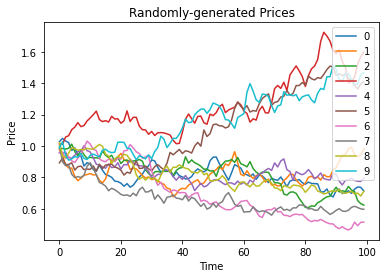

In [ ]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

**My own example 64**

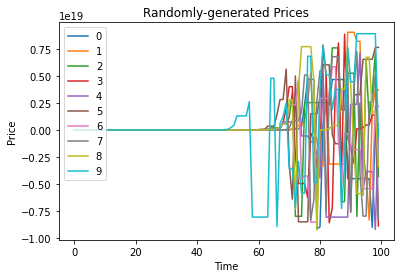

In [ ]:
returns1 = pd.DataFrame(np.random.geometric(0.45,(100,10)))
prices1 = returns1.cumprod()
prices1.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=2);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [ ]:
s = pd.Series([1, 2, np.nan, 4, 5])
print (s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


**My own example 65**

In [ ]:
animales = pd.Series(['perro', 'gato', 'gallina', 'rana', 'paloma', 'raton'])
print (animales)

0      perro
1       gato
2    gallina
3       rana
4     paloma
5      raton
dtype: object


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [ ]:
print (s.name)

None


**My own example 66**

In [ ]:
print (animales.name)

None


This name can be directly modified with no repercussions.

In [ ]:
s.name = "Toy Series"
print (s.name)

Toy Series


**My own example 67**

In [ ]:
animales.name = "animales"
print (animales.name)

animales


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [ ]:
print (s.index)

RangeIndex(start=0, stop=5, step=1)


**My own example 68**

In [ ]:
print (animales.index)

RangeIndex(start=0, stop=6, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [ ]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


**My own example 69**

In [ ]:
indices_fechas = pd.date_range("2021-02-01", periods=len(animales), freq="W")
print (indices_fechas)

DatetimeIndex(['2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28',
               '2021-03-07', '2021-03-14'],
              dtype='datetime64[ns]', freq='W-SUN')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [ ]:
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


**My own example 70**

In [ ]:
animales.index = indices_fechas
print (animales.index)

DatetimeIndex(['2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28',
               '2021-03-07', '2021-03-14'],
              dtype='datetime64[ns]', freq='W-SUN')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [ ]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


**My own example 71**

In [ ]:
print ("First element of the series: ", animales.iloc[0])
print ("Last element of the series: ", animales.iloc[len(animales)-1])

First element of the series:  perro
Last element of the series:  raton


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [ ]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

**My own example 72**

In [ ]:
animales.iloc[:3]

2021-02-07      perro
2021-02-14       gato
2021-02-21    gallina
Freq: W-SUN, Name: animales, dtype: object

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [ ]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

**My own example 73


```

**

In [ ]:
start = 0
end = len(animales) 
step = 2

animales.iloc[start:end:step]

2021-02-07      perro
2021-02-21    gallina
2021-03-07     paloma
Freq: 2W-SUN, Name: animales, dtype: object

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [ ]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

**My own example 74**

In [ ]:
animales.iloc[::-1]

2021-03-14      raton
2021-03-07     paloma
2021-02-28       rana
2021-02-21    gallina
2021-02-14       gato
2021-02-07      perro
Freq: -1W-SUN, Name: animales, dtype: object

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [ ]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

**My own example 75**

In [ ]:
animales.iloc[-3:-8:-2]

2021-02-28    rana
2021-02-14    gato
Freq: -2W-SUN, Name: animales, dtype: object

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [ ]:
s.loc['2016-01-01']

1.0

Or even for a range of dates!

In [ ]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

**My own example 76**

In [ ]:
animales.loc['2021-02-22':'2021-03-20']

2021-02-28      rana
2021-03-07    paloma
2021-03-14     raton
Freq: W-SUN, Name: animales, dtype: object

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [ ]:
print (s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


**My own example 77**

In [ ]:
print (animales == 'gato')

2021-02-07    False
2021-02-14     True
2021-02-21    False
2021-02-28    False
2021-03-07    False
2021-03-14    False
Freq: W-SUN, Name: animales, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [ ]:
print (s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


**My own example 78**

In [ ]:
print (animales.loc[animales == 'raton'])

2021-03-14    raton
Freq: W-SUN, Name: animales, dtype: object


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [ ]:
print (s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [ ]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
#prices = get_pricing(symbol, start_date=start, end_date=end, fields="price") #La función get_pricing esta obsoleta
prices =  yf.download('CMG', start, end)

[*********************100%***********************]  1 of 1 completed


**My own example 79**

In [ ]:
symbol_g = "GOOG" #Google
start_g = "2019-01-01"
end_g = "2020-01-01"
prices_g =  yf.download('CMG', start_g, end_g)

[*********************100%***********************]  1 of 1 completed


We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [ ]:
print ("\n", type(prices))
prices.head(5) 


 <class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,343.700012,350.489990,340.000000,341.269989,341.269989,728100
2012-01-04,346.000000,349.980011,345.010010,348.750000,348.750000,743100
2012-01-05,346.880005,351.980011,342.570007,350.480011,350.480011,672300
2012-01-06,348.880005,352.630005,347.350006,348.950012,348.950012,370700
2012-01-09,349.000000,349.489990,336.290009,339.739990,339.739990,748600


**My own example 80**

In [ ]:
print ("\n", type(prices_g))
prices_g.tail(7)


 <class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,838.000000,838.820007,831.770020,834.530029,834.530029,363000
2019-12-23,837.830017,838.250000,827.929993,828.289978,828.289978,294400
2019-12-24,827.099976,829.409973,823.159973,828.890015,828.890015,91900
2019-12-26,829.409973,839.280029,828.239990,838.599976,838.599976,255400
2019-12-27,839.969971,840.000000,835.000000,836.789978,836.789978,201900
2019-12-30,838.169983,838.750000,829.010010,836.070007,836.070007,211400
2019-12-31,837.239990,842.270020,833.359985,837.109985,837.109985,282200


As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [ ]:
#print ('Old name: ', prices.name)
prices.name = symbol
print ('New name: ', prices.name)

New name:  CMG


**My own example 81**

In [ ]:
prices_g.name = symbol_g
print ('New name: ', prices_g.name)

New name:  GOOG


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [ ]:
print (prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


**My own example 82**

In [ ]:
print (prices_g.index)

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [ ]:
monthly_prices = prices.resample('M').interpolate()
monthly_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,368.390015,369.720001,365.519989,367.290009,367.290009,350800.0
2012-02-29,390.899994,392.000000,387.339996,390.220001,390.220001,355100.0
2012-03-31,404.684998,405.695007,400.059998,402.184998,402.184998,340200.0
2012-04-30,418.470001,419.390015,412.779999,414.149994,414.149994,325300.0
2012-05-31,412.440002,413.809998,407.359985,413.070007,413.070007,384000.0
2012-06-30,352.035004,354.399994,348.250000,352.699997,352.699997,521150.0
2012-07-31,291.630005,294.989990,289.140015,292.329987,292.329987,658300.0
2012-08-31,291.750000,292.820007,286.489990,288.640015,288.640015,510100.0
2012-09-30,272.625000,274.185005,268.289993,271.585007,271.585007,625700.0


The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [ ]:
monthly_prices_med = prices.resample('M').mean()
monthly_prices_med.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,353.854501,357.491002,351.092499,354.829002,354.829002,4.783650e+05
2012-02-29,378.081999,381.654002,375.636002,379.535503,379.535503,5.317800e+05
2012-03-31,406.103183,408.890456,403.241364,407.002272,407.002272,3.971045e+05
2012-04-30,422.301999,427.149001,417.346500,422.798997,422.798997,7.608100e+05
2012-05-31,405.641364,410.391819,400.822271,405.805456,405.805456,5.796045e+05
2012-06-30,404.553808,408.189046,398.229523,403.033335,403.033335,6.254857e+05
2012-07-31,354.177618,358.931902,349.204764,353.880474,353.880474,1.266686e+06
2012-08-31,295.113044,298.547392,291.762612,294.535219,294.535219,6.039261e+05
2012-09-30,325.636312,331.034209,321.312628,326.513160,326.513160,8.505105e+05


We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [ ]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,343.700012,350.489990,340.000000,341.269989,341.269989,728100
2012-02-29,368.000000,371.619995,364.410004,370.410004,370.410004,873400
2012-03-31,391.850006,394.750000,388.000000,394.100006,394.100006,387700
2012-04-30,417.000000,421.410004,413.540009,418.399994,418.399994,381300
2012-05-31,415.410004,424.149994,414.589996,419.890015,419.890015,501400
2012-06-30,404.869995,408.940002,394.000000,397.140015,397.140015,657000
2012-07-31,386.029999,386.029999,376.260010,383.459991,383.459991,872400
2012-08-31,292.869995,293.880005,280.410004,280.670013,280.670013,777400
2012-09-30,289.730011,289.739990,283.679993,285.989990,285.989990,455800


**My own example 83**

In [ ]:
def custom_resampler_2(array_like):
    """ La diferencia entre el precio con el que termino y comenzo el mes """
    return array_like[-1] -array_like[0]
first_of_month_prices_g= prices_g.resample('M').apply(custom_resampler_2)
first_of_month_prices_g.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,104.970001,87.519989,103.480011,86.250000,86.250000,-357500
2019-02-28,70.110046,78.630005,75.489990,80.330017,80.330017,78200
2019-03-31,94.720032,97.789978,96.410034,98.679993,98.679993,254300
2019-04-30,-34.240051,-26.260010,-26.960022,-17.700012,-17.700012,-106400
2019-05-31,-25.909973,-28.330017,-27.690002,-28.590027,-28.590027,223900
2019-06-30,65.539978,64.970032,83.840027,91.220032,91.220032,-137300
2019-07-31,66.419983,64.469971,63.100037,70.140015,70.140015,143400
2019-08-31,52.630005,46.210022,48.940002,47.989990,47.989990,-222500
2019-09-30,-11.000000,7.800049,-1.429993,12.599976,12.599976,76100


We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [ ]:
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,343.700012,350.489990,340.000000,341.269989,341.269989,728100
2012-01-04 00:00:00-05:00,346.000000,349.980011,345.010010,348.750000,348.750000,743100
2012-01-05 00:00:00-05:00,346.880005,351.980011,342.570007,350.480011,350.480011,672300
2012-01-06 00:00:00-05:00,348.880005,352.630005,347.350006,348.950012,348.950012,370700
2012-01-09 00:00:00-05:00,349.000000,349.489990,336.290009,339.739990,339.739990,748600
2012-01-10 00:00:00-05:00,343.820007,344.339996,336.549988,341.119995,341.119995,503500
2012-01-11 00:00:00-05:00,340.000000,347.920013,338.239990,347.600006,347.600006,573900
2012-01-12 00:00:00-05:00,347.609985,348.510010,343.799988,347.619995,347.619995,384900
2012-01-13 00:00:00-05:00,350.260010,355.000000,350.000000,354.619995,354.619995,697100


**My own example 84**

In [ ]:
eastern_prices_g = prices_g.tz_localize('EST') #New York
eastern_prices_g.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-05:00,427.829987,447.459991,423.980011,443.359985,443.359985,706300
2019-01-03 00:00:00-05:00,441.929993,450.000000,438.079987,439.450012,439.450012,674600
2019-01-04 00:00:00-05:00,444.010010,457.339996,441.279999,455.000000,455.000000,899300
2019-01-07 00:00:00-05:00,454.609985,485.910004,453.920013,485.149994,485.149994,1038300
2019-01-08 00:00:00-05:00,493.190002,499.670013,485.329987,497.369995,497.369995,883200
2019-01-09 00:00:00-05:00,497.190002,505.519989,491.250000,498.480011,498.480011,792700
2019-01-10 00:00:00-05:00,495.790009,509.829987,495.670013,509.619995,509.619995,833200
2019-01-11 00:00:00-05:00,507.390015,513.299988,504.000000,506.950012,506.950012,788200
2019-01-14 00:00:00-05:00,502.850006,510.989990,499.760010,501.989990,501.989990,839900


In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [ ]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print (calendar_dates)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [ ]:
#calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices = prices.reindex(calendar_dates).ffill()
calendar_prices.head(15)

,Open,High,Low,Close,Adj Close,Volume
2012-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [ ]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
2012-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [ ]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
2012-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [ ]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume


Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

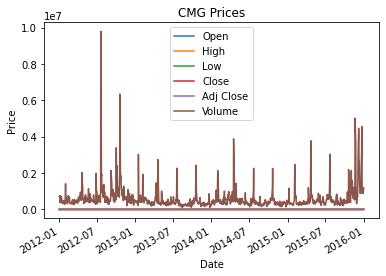

In [ ]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [ ]:
print ("Mean: ", prices.mean())
print ("Standard deviation: ", prices.std())

Mean:  Open            501.580328
High            506.547406
Low             496.621740
Close           501.636650
Adj Close       501.636650
Volume       591171.868787
dtype: float64
Standard deviation:  Open            146.831560
High            147.589064
Low             145.792764
Close           146.688738
Adj Close       146.688738
Volume       615931.535248
dtype: float64


**My own example 85**

In [ ]:
print ("Mean: ", prices_g.mean())
print ("Standard deviation: ", prices_g.std())

Mean:  Open            722.269445
High            729.547974
Low             715.031987
Close           722.891944
Adj Close       722.891944
Volume       548450.000000
dtype: float64
Standard deviation:  Open            100.719054
High             99.886674
Low              99.225947
Close            99.212752
Adj Close        99.212752
Volume       360436.092053
dtype: float64


In [ ]:
print ("Summary Statistics")
print (prices.describe())

Summary Statistics
              Open         High          Low        Close    Adj Close  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean    501.580328   506.547406   496.621740   501.636650   501.636650   
std     146.831560   147.589064   145.792764   146.688738   146.688738   
min     234.449997   243.000000   233.820007   236.240005   236.240005   
25%     370.607498   374.037498   368.189995   371.555000   371.555000   
50%     521.285004   524.994995   515.934998   521.270020   521.270020   
75%     645.989990   651.910019   638.540024   646.834991   646.834991   
max     758.489990   758.609985   748.390015   757.770020   757.770020   

             Volume  
count  1.006000e+03  
mean   5.911719e+05  
std    6.159315e+05  
min    1.012000e+05  
25%    3.189750e+05  
50%    4.262500e+05  
75%    6.282000e+05  
max    9.795100e+06  


We can easily modify `Series` with scalars using our basic mathematical operators.

In [ ]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,677.400024,690.979980,670.000000,672.539978,672.539978,1456190
2012-01-04,682.000000,689.960022,680.020020,687.500000,687.500000,1486190
2012-01-05,683.760010,693.960022,675.140015,690.960022,690.960022,1344590
2012-01-06,687.760010,695.260010,684.700012,687.900024,687.900024,741390
2012-01-09,688.000000,688.979980,662.580017,669.479980,669.479980,1497190


**My own example 86**

In [ ]:
modified_prices_g = prices_g * 1.19 
modified_prices_g.head(8)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,509.117684,532.477390,504.536213,527.598383,527.598383,840497.0
2019-01-03,525.896691,535.500000,521.315184,522.945515,522.945515,802774.0
2019-01-04,528.371912,544.234596,525.123199,541.450000,541.450000,1070167.0
2019-01-07,540.985883,578.232904,540.164816,577.328493,577.328493,1235577.0
2019-01-08,586.896103,594.607316,577.542684,591.870294,591.870294,1051008.0
2019-01-09,591.656103,601.568787,584.587500,593.191213,593.191213,943313.0
2019-01-10,589.990110,606.697684,589.847316,606.447794,606.447794,991508.0
2019-01-11,603.794117,610.826985,599.760000,603.270515,603.270515,937958.0


And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [ ]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,2012-01-11 00:00:00,2012-01-12 00:00:00,2012-01-13 00:00:00,2012-01-17 00:00:00,...,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,2015-12-31 00:00:00,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If there are no matching indices, however, we may get an empty `Series` in return.

In [ ]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1002,1003,1004,1005,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [ ]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [ ]:
#rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

**My own example 87**

In [ ]:
rolling_mean_g = prices_g.rolling(30).mean()
rolling_mean_g.name = "30-day rolling mean Google"

**My own example 88**

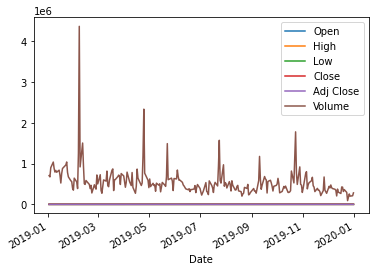

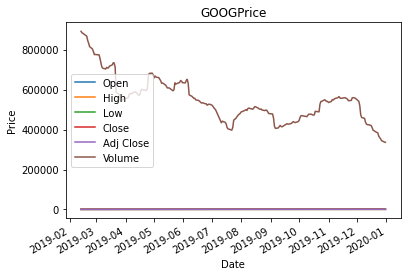

In [ ]:
prices_g.plot()
rolling_mean_g.plot()
plt.title(symbol_g + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [ ]:
#rolling_std = pd.rolling_std(prices, 30)
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

**My own example 89**

In [ ]:
rolling_std_g = prices.rolling(30).std()
rolling_std_g.name = "30-day rolling volatility Google"

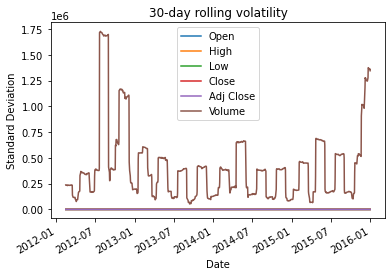

In [ ]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [ ]:
print (np.median(mult_returns))

0.0005465394818680025


**My own example 90**

In [ ]:
print (np.median(mult_returns_g))

0.0023048823802137575


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [ ]:
print (mult_returns.median())

Open         0.000879
High         0.000051
Low          0.001460
Close        0.000236
Adj Close    0.000236
Volume      -0.016473
dtype: float64


**My own example 91**

In [ ]:
print (mult_returns_g.median())

Open         0.002882
High         0.002237
Low          0.004855
Close        0.001971
Adj Close    0.001971
Volume      -0.022067
dtype: float64


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [ ]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-1.38608466,  1.43056674, -0.28604751, -1.33352922,  0.94502183])}


**My own example 92**

In [ ]:
dict_data_1 = {
    'dias de la semana' : [1, 2, 3, 4, 5, 6, 7],
    'paises' : ['Colombia', 'USA', 'Canada', 'Mexico', 'Brasil', 'España', 'Rusia'],
    'aumento inflación' : np.random.normal(0, 1, 7)
}
print (dict_data_1)

{'dias de la semana': [1, 2, 3, 4, 5, 6, 7], 'paises': ['Colombia', 'USA', 'Canada', 'Mexico', 'Brasil', 'España', 'Rusia'], 'aumento inflación': array([ 1.52471723e+00,  5.79662131e-02, -1.18938985e-03, -5.12346123e-01,
        8.17389387e-01,  5.32710928e-02, -5.60800703e-02])}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [ ]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (frame_data)

            a  b         c
2016-01-01  1  L -1.386085
2016-01-02  2  K  1.430567
2016-01-03  3  J -0.286048
2016-01-04  4  M -1.333529
2016-01-05  5  Z  0.945022


**My own example 93**

In [ ]:
frame_data_1 = pd.DataFrame(dict_data_1, index=pd.date_range('2020-03-05', periods=7))
print (frame_data_1)

            dias de la semana    paises  aumento inflación
2020-03-05                  1  Colombia           1.524717
2020-03-06                  2       USA           0.057966
2020-03-07                  3    Canada          -0.001189
2020-03-08                  4    Mexico          -0.512346
2020-03-09                  5    Brasil           0.817389
2020-03-10                  6    España           0.053271
2020-03-11                  7     Rusia          -0.056080


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [ ]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print (numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


**My own example 94**

In [ ]:
s_3 = pd.Series(["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"], name='Dias')
s_4 = pd.Series([11, 12, 13, 14, 15, 16, 17], name="Numeros")
dias_mes = pd.concat([s_3, s_4], axis=1)
print (dias_mes)

        Dias  Numeros
0      Lunes       11
1     Martes       12
2  Miercoles       13
3     Jueves       14
4    Viernes       15
5     Sabado       16
6    Domingo       17


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [ ]:
print (numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [ ]:
numbers.columns = ['Shmevens', 'Shmodds']
print (numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


**My own example 95**

In [ ]:
dias_mes.columns = ['Dioses', 'Puntaje']
print (dias_mes)

      Dioses  Puntaje
0      Lunes       11
1     Martes       12
2  Miercoles       13
3     Jueves       14
4    Viernes       15
5     Sabado       16
6    Domingo       17


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [ ]:
print (numbers.index)

RangeIndex(start=0, stop=5, step=1)


**My own example 96**

In [ ]:
print (dias_mes.index)

RangeIndex(start=0, stop=7, step=1)


In [ ]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print (numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [ ]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

**My own example 97**

In [ ]:
dias_mes.values

array([['Lunes', 11],
       ['Martes', 12],
       ['Miercoles', 13],
       ['Jueves', 14],
       ['Viernes', 15],
       ['Sabado', 16],
       ['Domingo', 17]], dtype=object)

This returns a NumPy array.

In [ ]:
type(numbers.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [ ]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
#prices = get_pricing(symbol, start_date=start, end_date=end, fields="price") No funciona
prices = yf.download(symbol, start=start, end=end)
if isinstance(symbol, list):
    #prices.columns = map(lambda x: x.symbol, prices.columns) No funciona
    prices.columns = map(lambda x: x[1], prices.columns)
else:
    prices.name = symbol

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- WFM: No data found for this date range, symbol may be delisted


Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [ ]:
#prices.CMG.head() No funciona
prices['CMG'].head()

,CMG,CMG,CMG,CMG,CMG,CMG
Date,,,,,,
2012-01-03 00:00:00,341.269989,341.269989,350.489990,340.000000,343.700012,728100
2012-01-04 00:00:00,348.750000,348.750000,349.980011,345.010010,346.000000,743100
2012-01-05 00:00:00,350.480011,350.480011,351.980011,342.570007,346.880005,672300
2012-01-06 00:00:00,348.950012,348.950012,352.630005,347.350006,348.880005,370700
2012-01-09 00:00:00,339.739990,339.739990,349.489990,336.290009,349.000000,748600


We can also use `loc[]` to access an individual column like so.

In [ ]:
prices.loc[:, 'CMG'].head()

,CMG,CMG,CMG,CMG,CMG,CMG
Date,,,,,,
2012-01-03 00:00:00,341.269989,341.269989,350.489990,340.000000,343.700012,728100
2012-01-04 00:00:00,348.750000,348.750000,349.980011,345.010010,346.000000,743100
2012-01-05 00:00:00,350.480011,350.480011,351.980011,342.570007,346.880005,672300
2012-01-06 00:00:00,348.950012,348.950012,352.630005,347.350006,348.880005,370700
2012-01-09 00:00:00,339.739990,339.739990,349.489990,336.290009,349.000000,748600


Accessing an individual column will return a `Series`, regardless of how we get it.

In [ ]:
print (type(prices.CMG))
print (type(prices.loc[:, 'CMG']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [ ]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,CMG,CMG,CMG,CMG,CMG,MCD,MCD,MCD,MCD,MCD,MCD
Date,,,,,,,,,,,,
2012-01-03 00:00:00,341.269989,341.269989,350.489990,340.000000,343.700012,728100,72.811638,98.839996,101.589996,98.750000,101.330002,8895900
2012-01-04 00:00:00,348.750000,348.750000,349.980011,345.010010,346.000000,743100,73.216812,99.389999,100.300003,98.760002,99.110001,6754700
2012-01-05 00:00:00,350.480011,350.480011,351.980011,342.570007,346.880005,672300,73.540932,99.830002,100.400002,98.680000,99.470001,8163800
2012-01-06 00:00:00,348.950012,348.950012,352.630005,347.350006,348.880005,370700,74.108170,100.599998,100.769997,99.870003,100.089996,6775300
2012-01-09 00:00:00,339.739990,339.739990,349.489990,336.290009,349.000000,748600,73.400955,99.639999,100.930000,99.510002,100.879997,4433700


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [ ]:
symbol = ["CMG", "MCD", "SHAK"]
start = "2012-01-01"
end = "2016-01-01"
prices_sin_wfm = yf.download(symbol, start=start, end=end)
prices_sin_wfm.columns = map(lambda x: x[1], prices_sin_wfm.columns)
prices_sin_wfm.loc['2015-12-15':'2015-12-22']

[*********************100%***********************]  3 of 3 completed


,CMG,MCD,SHAK,CMG,MCD,SHAK,CMG,MCD,SHAK,CMG,MCD,SHAK,CMG,MCD,SHAK,CMG,MCD,SHAK
Date,,,,,,,,,,,,,,,,,,
2015-12-15,554.859985,98.247299,41.580002,554.859985,116.930000,41.580002,564.549988,118.239998,41.720001,553.570007,116.839996,40.219002,560.130005,117.500000,40.700001,914500,6118300,505400.0
2015-12-16,567.830017,99.011894,40.169998,567.830017,117.839996,40.169998,569.280029,118.750000,42.029999,554.200012,116.489998,39.500000,556.150024,117.489998,42.029999,872000,6306300,756300.0
2015-12-17,554.890015,98.726227,38.540001,554.890015,117.500000,38.540001,577.760010,118.900002,40.849998,554.599976,117.489998,38.450001,575.010010,118.339996,40.330002,1144800,5275900,788700.0
2015-12-18,541.080017,98.020454,39.750000,541.080017,116.660004,39.750000,555.340027,117.279999,39.750000,540.500000,115.889999,38.000000,553.780029,116.739998,39.250000,1506400,11238900,1506800.0
2015-12-21,522.010010,98.885857,38.189999,522.010010,117.690002,38.189999,544.880005,117.739998,40.250000,508.100006,116.610001,37.599998,544.250000,116.959999,40.009998,3098000,3344600,909700.0
2015-12-22,494.609985,98.911079,39.750000,494.609985,117.720001,39.750000,512.330017,118.040001,40.439999,494.109985,116.639999,37.924000,511.380005,117.959999,38.189999,4564400,4092000,787100.0


This plays nicely with lists of columns, too.

In [ ]:
prices_sin_wfm.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,CMG,CMG,CMG,CMG,CMG,MCD,MCD,MCD,MCD,MCD,MCD
Date,,,,,,,,,,,,
2015-12-15,554.859985,554.859985,564.549988,553.570007,560.130005,914500,98.247299,116.930000,118.239998,116.839996,117.500000,6118300
2015-12-16,567.830017,567.830017,569.280029,554.200012,556.150024,872000,99.011894,117.839996,118.750000,116.489998,117.489998,6306300
2015-12-17,554.890015,554.890015,577.760010,554.599976,575.010010,1144800,98.726227,117.500000,118.900002,117.489998,118.339996,5275900
2015-12-18,541.080017,541.080017,555.340027,540.500000,553.780029,1506400,98.020454,116.660004,117.279999,115.889999,116.739998,11238900
2015-12-21,522.010010,522.010010,544.880005,508.100006,544.250000,3098000,98.885857,117.690002,117.739998,116.610001,116.959999,3344600
2015-12-22,494.609985,494.609985,512.330017,494.109985,511.380005,4564400,98.911079,117.720001,118.040001,116.639999,117.959999,4092000


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [ ]:
prices.iloc[0:2, 1]

Date
2012-01-03    72.811638
2012-01-04    73.216812
Name: MCD, dtype: float64

**My own example 98**

In [ ]:
prices_1.iloc[0:2, 1]

Date
2012-01-03    8.9515
2012-01-04    8.8755
Name: AMZN, dtype: float64

In [ ]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
#prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20) Can only concatenate list (not "range") to list
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

,CMG,WFM
Date,,
2012-01-04 00:00:00,348.750000,NaN
2012-01-06 00:00:00,348.950012,NaN
2012-01-10 00:00:00,341.119995,NaN
2012-01-12 00:00:00,347.619995,NaN
2012-01-17 00:00:00,353.380005,NaN
2012-01-19 00:00:00,358.089996,NaN
2012-01-23 00:00:00,360.459991,NaN
2012-01-25 00:00:00,363.140015,NaN
2012-01-27 00:00:00,366.760010,NaN


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [ ]:
 #prices.loc[prices.MCD > prices.WFM].head() Can only compare identically-labeled DataFrame objects

We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [ ]:
# prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head() Can only compare identically-labeled DataFrame objects 

#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [ ]:
#s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price') #No funciona
#prices.loc[: , 'TSLA'] = s_1 #No funciona
start = "2012-01-01"
end = "2016-01-01"
s_1 = yf.download('TSLA', start=start, end=end)
s_1.columns = map(lambda x: (x, "TSLA"), s_1.columns)
symbol_new = ["CMG", "MCD", "SHAK", "WFM"]
prices= yf.download(symbol_new, start=start, end=end)
prices.index = prices.index.astype('datetime64[ns]')
prices = prices.merge(s_1, on="Date")
prices.columns = map(lambda x: x[1], prices.columns)
prices.head(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed

1 Failed download:
- WFM: No data found for this date range, symbol may be delisted


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,CMG,MCD,SHAK,WFM,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,341.269989,72.811638,NaN,NaN,341.269989,98.839996,NaN,NaN,350.489990,101.589996,...,728100,8895900,NaN,NaN,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,348.750000,73.216782,NaN,NaN,348.750000,99.389999,NaN,NaN,349.980011,100.300003,...,743100,6754700,NaN,NaN,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,350.480011,73.540916,NaN,NaN,350.480011,99.830002,NaN,NaN,351.980011,100.400002,...,672300,8163800,NaN,NaN,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,348.950012,74.108147,NaN,NaN,348.950012,100.599998,NaN,NaN,352.630005,100.769997,...,370700,6775300,NaN,NaN,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,339.739990,73.400963,NaN,NaN,339.739990,99.639999,NaN,NaN,349.489990,100.930000,...,748600,4433700,NaN,NaN,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


**My own example 99**

In [ ]:
s_1 = yf.download('TSLA', start=start, end=end)
s_1.columns = map(lambda x: (x, "TSLA"), s_1.columns)
symbol_1 = ["AAPL", "AMZN"]
start= "2012-01-01"
end = "2016-01-01"
prices_1 = yf.download(symbol_1, start=start, end=end)
prices_1.index = prices_1.index.astype('datetime64[ns]')
prices_1 = prices_1.merge(s_1, on="Date", how="left")
prices_1.columns = map(lambda x: x[1], prices_1.columns)
prices_1.head(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,,,,,,,,,,,,,
2012-01-03,12.500191,8.9515,14.686786,8.9515,14.732143,8.9740,14.607143,8.7775,14.621429,8.7945,302220800,102216000,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,12.567369,8.8755,14.765714,8.8755,14.810000,9.0250,14.617143,8.8035,14.642857,8.9605,260022000,84104000,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,12.706897,8.8805,14.929643,8.8805,14.948214,8.9125,14.738214,8.7025,14.819643,8.7970,271269600,76182000,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,12.839726,9.1305,15.085714,9.1305,15.098214,9.2325,14.972143,8.8750,14.991786,8.9035,318292800,140168000,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,12.819362,8.9280,15.061786,8.9280,15.276786,9.2185,15.048214,8.8500,15.196429,9.1380,394024400,101138000,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


It is also just as easy to remove a column.

In [ ]:
prices = prices.drop('TSLA', axis=1) 
prices.head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,341.269989,72.811638,NaN,NaN,341.269989,98.839996,NaN,NaN,350.489990,101.589996,...,NaN,NaN,343.700012,101.330002,NaN,NaN,728100,8895900,NaN,NaN
2012-01-04,348.750000,73.216782,NaN,NaN,348.750000,99.389999,NaN,NaN,349.980011,100.300003,...,NaN,NaN,346.000000,99.110001,NaN,NaN,743100,6754700,NaN,NaN
2012-01-05,350.480011,73.540916,NaN,NaN,350.480011,99.830002,NaN,NaN,351.980011,100.400002,...,NaN,NaN,346.880005,99.470001,NaN,NaN,672300,8163800,NaN,NaN
2012-01-06,348.950012,74.108147,NaN,NaN,348.950012,100.599998,NaN,NaN,352.630005,100.769997,...,NaN,NaN,348.880005,100.089996,NaN,NaN,370700,6775300,NaN,NaN
2012-01-09,339.739990,73.400963,NaN,NaN,339.739990,99.639999,NaN,NaN,349.489990,100.930000,...,NaN,NaN,349.000000,100.879997,NaN,NaN,748600,4433700,NaN,NaN


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [ ]:
#df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price') No funciona
#df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price') No funciona
df_1 = yf.download(['SPY', 'VXX'], start=start, end=end)
df_2 = yf.download(['MSFT', 'AAPL', 'GOOG'], start=start, end=end)
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

[*********************100%***********************]  2 of 2 completed

1 Failed download:
- VXX: Data doesn't exist for startDate = 1325394000, endDate = 1451624400
[*********************100%***********************]  3 of 3 completed


Adj Close           Close            High      \
                            SPY VXX         SPY VXX         SPY VXX   
Date                                                                  
2012-01-03 00:00:00  103.596199 NaN  127.500000 NaN  128.380005 NaN   
2012-01-04 00:00:00  103.758705 NaN  127.699997 NaN  127.809998 NaN   
2012-01-05 00:00:00  104.034935 NaN  128.039993 NaN  128.229996 NaN   
2012-01-06 00:00:00  103.766823 NaN  127.709999 NaN  128.220001 NaN   
2012-01-09 00:00:00  104.018692 NaN  128.020004 NaN  128.179993 NaN   

                            Low            Open      ...       High  \
                            SPY VXX         SPY VXX  ...       MSFT   
Date                                                 ...              
2012-01-03 00:00:00  127.430000 NaN  127.760002 NaN  ...  26.959999   
2012-01-04 00:00:00  126.709999 NaN  127.199997 NaN  ...  27.469999   
2012-01-05 00:00:00  126.430000 NaN  127.010002 NaN  ...  27.730000   
2012-01-06 00:00:00  127.290001 NaN  128.199997 NaN  ...  28.190001   
2012-01-09 00:00:00  127.410004 NaN  128.000000 NaN  ...  28.100000   

                           Low                             Open             \
                          AAPL       GOOG       MSFT       AAPL       GOOG   
Date                                                                         
2012-01-03 00:00:00  14.607143  16.248346  26.389999  14.621429  16.262545   
2012-01-04 00:00:00  14.617143  16.453827  26.780001  14.642857  16.563665   
2012-01-05 00:00:00  14.738214  16.344486  27.290001  14.819643  16.491436   
2012-01-06 00:00:00  14.972143  16.184088  27.530001  14.991786  16.417213   
2012-01-09 00:00:00  15.048214  15.472754  27.719999  15.196429  16.102144   

                                   Volume                       
                          MSFT       AAPL       GOOG      MSFT  
Date                                                            
2012-01-03 00:00:00  26.549999  302220800  147611217  64731500  
2012-01-04 00:00:00  26.820000  260022000  114989399  80516100  
2012-01-05 00:00:00  27.379999  271269600  131808205  56081400  
2012-01-06 00:00:00  27.530001  318292800  108119746  99455500  
2012-01-09 00:00:00  28.049999  394024400  233776981  59706800  

[5 rows x 30 columns]

**My own example 100**

In [ ]:
df_1 = yf.download(['DIS', 'NFLX'], start=start, end=end)
df_2 = yf.download(['VOLV-B.ST', 'TM', 'MZDAY'], start=start, end=end)
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed


Adj Close                 Close                  High             \
                  DIS       NFLX        DIS       NFLX        DIS       NFLX   
Date                                                                           
2012-01-02        NaN        NaN        NaN        NaN        NaN        NaN   
2012-01-03  34.300621  10.320000  38.310001  10.320000  38.459999  10.388571   
2012-01-04  34.784103  11.492857  38.849998  11.492857  38.990002  11.567143   
2012-01-05  35.366077  11.328571  39.500000  11.328571  39.580002  11.694286   
2012-01-06  35.733170  12.327143  39.910000  12.327143  40.150002  12.471429   

                  Low                  Open             ...       High    Low  \
                  DIS       NFLX        DIS       NFLX  ...  VOLV-B.ST  MZDAY   
Date                                                    ...                     
2012-01-02        NaN        NaN        NaN        NaN  ...  78.150002    NaN   
2012-01-03  37.939999  10.018571  37.970001  10.040000  ...  80.349998  4.635   
2012-01-04  38.119999  10.258571  38.189999  10.335714  ...  80.250000  4.635   
2012-01-05  38.700001  11.040000  38.830002  11.345714  ...  81.900002  4.635   
2012-01-06  39.450001  11.242857  39.549999  11.302857  ...        NaN  4.635   

                                   Open                       Volume  \
                   TM  VOLV-B.ST  MZDAY         TM  VOLV-B.ST  MZDAY   
Date                                                                   
2012-01-02        NaN  74.900002    NaN        NaN  75.449997    NaN   
2012-01-03  67.309998  78.000000  4.635  67.389999  78.050003    0.0   
2012-01-04  68.070000  79.400002  4.635  68.230003  79.750000    0.0   
2012-01-05  68.370003  79.800003  4.635  68.500000  80.699997    0.0   
2012-01-06  68.220001        NaN  4.635  68.519997        NaN    0.0   

                                  
                  TM   VOLV-B.ST  
Date                              
2012-01-02       NaN   5620741.0  
2012-01-03  377100.0  13474693.0  
2012-01-04  501600.0  11085397.0  
2012-01-05  343700.0   8083834.0  
2012-01-06  212000.0         NaN  

[5 rows x 30 columns]

#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [ ]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,341.269989,72.811638,0.0,0.0,341.269989,98.839996,0.0,0.0,350.489990,101.589996,...,0.0,0.0,343.700012,101.330002,0.0,0.0,728100,8895900,0.0,0.0
2012-01-04,348.750000,73.216782,0.0,0.0,348.750000,99.389999,0.0,0.0,349.980011,100.300003,...,0.0,0.0,346.000000,99.110001,0.0,0.0,743100,6754700,0.0,0.0
2012-01-05,350.480011,73.540916,0.0,0.0,350.480011,99.830002,0.0,0.0,351.980011,100.400002,...,0.0,0.0,346.880005,99.470001,0.0,0.0,672300,8163800,0.0,0.0
2012-01-06,348.950012,74.108147,0.0,0.0,348.950012,100.599998,0.0,0.0,352.630005,100.769997,...,0.0,0.0,348.880005,100.089996,0.0,0.0,370700,6775300,0.0,0.0
2012-01-09,339.739990,73.400963,0.0,0.0,339.739990,99.639999,0.0,0.0,349.489990,100.930000,...,0.0,0.0,349.000000,100.879997,0.0,0.0,748600,4433700,0.0,0.0


In [ ]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,341.269989,72.811638,45.900002,NaN,341.269989,98.839996,45.900002,NaN,350.489990,101.589996,...,45.119999,NaN,343.700012,101.330002,47.0,NaN,728100,8895900,16264900.0,NaN
2012-01-04,348.750000,73.216782,45.900002,NaN,348.750000,99.389999,45.900002,NaN,349.980011,100.300003,...,45.119999,NaN,346.000000,99.110001,47.0,NaN,743100,6754700,16264900.0,NaN
2012-01-05,350.480011,73.540916,45.900002,NaN,350.480011,99.830002,45.900002,NaN,351.980011,100.400002,...,45.119999,NaN,346.880005,99.470001,47.0,NaN,672300,8163800,16264900.0,NaN
2012-01-06,348.950012,74.108147,45.900002,NaN,348.950012,100.599998,45.900002,NaN,352.630005,100.769997,...,45.119999,NaN,348.880005,100.089996,47.0,NaN,370700,6775300,16264900.0,NaN
2012-01-09,339.739990,73.400963,45.900002,NaN,339.739990,99.639999,45.900002,NaN,349.489990,100.930000,...,45.119999,NaN,349.000000,100.879997,47.0,NaN,748600,4433700,16264900.0,NaN


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [ ]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

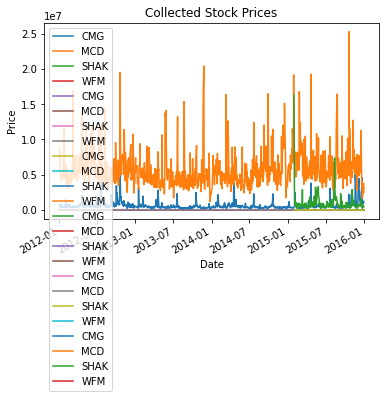

In [ ]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [ ]:
prices.mean(axis=0)

CMG     5.016367e+02
MCD     7.598484e+01
SHAK    5.357571e+01
WFM              NaN
CMG     5.016367e+02
MCD     9.662160e+01
SHAK    5.357571e+01
WFM              NaN
CMG     5.065474e+02
MCD     9.717556e+01
SHAK    5.530241e+01
WFM              NaN
CMG     4.966217e+02
MCD     9.605330e+01
SHAK    5.198364e+01
WFM              NaN
CMG     5.015803e+02
MCD     9.659987e+01
SHAK    5.375524e+01
WFM              NaN
CMG     5.911719e+05
MCD     5.720530e+06
SHAK    8.949459e+05
WFM              NaN
dtype: float64

As well as the standard deviation:

In [ ]:
prices.std(axis=0)

CMG     1.466887e+02
MCD     6.445071e+00
SHAK    1.196859e+01
WFM              NaN
CMG     1.466887e+02
MCD     5.714226e+00
SHAK    1.196859e+01
WFM              NaN
CMG     1.475891e+02
MCD     5.704697e+00
SHAK    1.256933e+01
WFM              NaN
CMG     1.457928e+02
MCD     5.653356e+00
SHAK    1.142718e+01
WFM              NaN
CMG     1.468316e+02
MCD     5.664326e+00
SHAK    1.212512e+01
WFM              NaN
CMG     6.159315e+05
MCD     2.550258e+06
SHAK    1.243824e+06
WFM              NaN
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [ ]:
prices.describe()

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,0.0,1006.000000,1006.000000,233.000000,0.0,1006.000000,1006.000000,...,233.000000,0.0,1006.000000,1006.000000,233.000000,0.0,1.006000e+03,1.006000e+03,2.330000e+02,0.0
mean,501.636650,75.984845,53.575708,NaN,501.636650,96.621600,53.575708,NaN,506.547406,97.175557,...,51.983639,NaN,501.580328,96.599871,53.755236,NaN,5.911719e+05,5.720530e+06,8.949459e+05,NaN
std,146.688738,6.445071,11.968587,NaN,146.688738,5.714226,11.968587,NaN,147.589064,5.704697,...,11.427183,NaN,146.831560,5.664326,12.125123,NaN,6.159315e+05,2.550258e+06,1.243824e+06,NaN
min,236.240005,63.333984,38.189999,NaN,236.240005,84.050003,38.189999,NaN,243.000000,84.389999,...,37.599998,NaN,234.449997,84.169998,38.189999,NaN,1.012000e+05,1.155900e+06,1.620000e+05,NaN
25%,371.555000,72.954212,44.119999,NaN,371.555000,93.672499,44.119999,NaN,374.037498,94.152502,...,43.021999,NaN,370.607498,93.699997,44.299999,NaN,3.189750e+05,4.163900e+06,4.211000e+05,NaN
50%,521.270020,75.672607,49.270000,NaN,521.270020,96.290001,49.270000,NaN,524.994995,96.970001,...,48.200001,NaN,521.285004,96.300003,49.450001,NaN,4.262500e+05,5.093650e+06,5.993000e+05,NaN
75%,646.834991,78.950666,61.669998,NaN,646.834991,99.137499,61.669998,NaN,651.910019,99.627499,...,59.720001,NaN,645.989990,99.027498,61.590000,NaN,6.282000e+05,6.509425e+06,9.364000e+05,NaN
max,757.770020,100.885597,92.860001,NaN,757.770020,120.070000,92.860001,NaN,758.609985,120.230003,...,90.120003,NaN,758.489990,119.639999,94.389999,NaN,9.795100e+06,2.528660e+07,1.626490e+07,NaN


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [ ]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,632.539978,95.623276,NaN,NaN,632.539978,147.679993,NaN,NaN,650.979980,153.179993,...,NaN,NaN,637.400024,152.660004,NaN,NaN,1456150,17791750,NaN,NaN
2012-01-04,647.500000,96.433563,NaN,NaN,647.500000,148.779999,NaN,NaN,649.960022,150.600006,...,NaN,NaN,642.000000,148.220001,NaN,NaN,1486150,13509350,NaN,NaN
2012-01-05,650.960022,97.081833,NaN,NaN,650.960022,149.660004,NaN,NaN,653.960022,150.800003,...,NaN,NaN,643.760010,148.940002,NaN,NaN,1344550,16327550,NaN,NaN
2012-01-06,647.900024,98.216293,NaN,NaN,647.900024,151.199997,NaN,NaN,655.260010,151.539993,...,NaN,NaN,647.760010,150.179993,NaN,NaN,741350,13550550,NaN,NaN
2012-01-09,629.479980,96.801926,NaN,NaN,629.479980,149.279999,NaN,NaN,648.979980,151.860001,...,NaN,NaN,648.000000,151.759995,NaN,NaN,1497150,8867350,NaN,NaN


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [ ]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,0.021918,0.005564,NaN,NaN,0.021918,0.005565,NaN,NaN,-0.001455,-0.012698,...,NaN,NaN,0.006692,-0.021909,NaN,NaN,0.020602,-0.240695,NaN,NaN
2012-01-05,0.004961,0.004427,NaN,NaN,0.004961,0.004427,NaN,NaN,0.005715,0.000997,...,NaN,NaN,0.002543,0.003632,NaN,NaN,-0.095277,0.208610,NaN,NaN
2012-01-06,-0.004365,0.007713,NaN,NaN,-0.004365,0.007713,NaN,NaN,0.001847,0.003685,...,NaN,NaN,0.005766,0.006233,NaN,NaN,-0.448609,-0.170080,NaN,NaN
2012-01-09,-0.026394,-0.009543,NaN,NaN,-0.026394,-0.009543,NaN,NaN,-0.008905,0.001588,...,NaN,NaN,0.000344,0.007893,NaN,NaN,1.019423,-0.345608,NaN,NaN
2012-01-10,0.004062,0.000602,NaN,NaN,0.004062,0.000602,NaN,NaN,-0.014736,-0.004756,...,NaN,NaN,-0.014842,-0.006344,NaN,NaN,-0.327411,0.144732,NaN,NaN


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

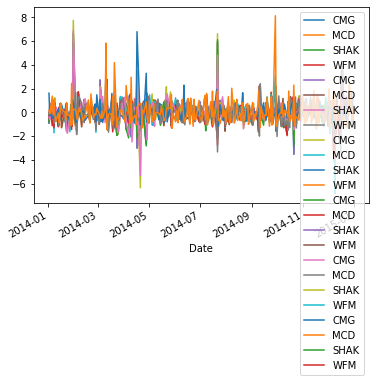

In [ ]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [ ]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

**My own example 101**

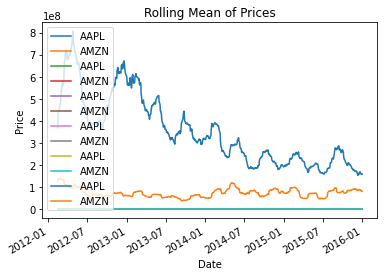

In [ ]:
rolling_mean_1.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">
</div> 

Quantconnect

Introduction to Financial Python
</div>

#Data Types and Data Structures

# Introduction

This tutorial provides a basic introduction to the Python programming language. If you are new to Python, you should run the code snippets while reading this tutorial. If you are an advanced Python user, please feel free to skip this chapter.

# Basic Variable Types
The basic types of variables in Python are: strings, integers, floating point numbers and booleans.

Strings in python are identified as a contiguous set of characters represented in either single quotes (' ') or double quotes (" ").


In [ ]:
my_string1 = 'Welcome to'
my_string2 = "QuantConnect"
print(my_string1 + ' ' + my_string2)

Welcome to QuantConnect


**My own example 102**

In [ ]:
saludo = 'Buenos dias '
nombre = "Brandon "
apellido = "Forero "
print(saludo + nombre + apellido)

Buenos dias Brandon Forero 


An integer is a round number with no values after the decimal point.

In [ ]:
my_int = 10
print(my_int)
print(type(my_int))

10
<class 'int'>


**My own example 103**

In [ ]:
entero = 1234
print(entero)
print(type(entero))

1234
<class 'int'>


The built-in function int() can convert a string into an integer.

In [ ]:
my_string = "100"
print(type(my_string))
my_int = int(my_string)
print(type(my_int))

<class 'str'>
<class 'int'>


**My own example 104**

In [ ]:
ext = "555"
print(type(ext))
num_estudiantes = int(ext)
print(type(ext))

<class 'str'>
<class 'str'>


A floating point number, or a float, is a real number in mathematics. In Python we need to include a value after a decimal point to define it as a float

In [ ]:
my_string = "100"
my_float = float(my_string)
print(type(my_float))

<class 'float'>


**My own example 105**

In [ ]:
float_string = "0.5"
float_num = float(float_string)
print(type(float_num ))

<class 'float'>


As you can see above, if we don't include a decimal value, the variable would be defined as an integer. The built-in function float() can convert a string or an integer into a float.

In [ ]:
my_bool = False
print(my_bool)
print(type(my_bool))

False
<class 'bool'>


**My own example 106**

In [ ]:
verdad = True
print(verdad)
print(type(verdad))

True
<class 'bool'>


A boolean, or bool, is a binary variable. Its value can only be True or False. It is useful when we do some logic operations, which would be covered in our next chapter.

In [ ]:
print("Addition ", 1+1)
print("Subtraction ", 5-2)
print("Multiplication ", 2*3)
print("Division ", 10/2)
print('exponent', 2**3)

Addition  2
Subtraction  3
Multiplication  6
Division  5.0
exponent 8


**My own example 107**

In [ ]:
print("Addition ", 4+17)
print("Subtraction ", 987-500)
print("Multiplication ", 6*412)
print("Division ", 714/10)
print('exponent', 3**10)

Addition  21
Subtraction  487
Multiplication  2472
Division  71.4
exponent 59049


# Basic Math Operations

The basic math operators in python are demonstrated below:

In [ ]:
print(1/3)
print(1.0/3)

0.3333333333333333
0.3333333333333333


**My own example 108**

In [ ]:
print(85/1)

85.0


# Data Collections

## List
A list is an ordered collection of values. A list is mutable, which means you can change a list's value without changing the list itself. Creating a list is simply putting different comma-separated values between square brackets.

In [ ]:
my_list = ['Quant', 'Connect', 1,2,3]
print(my_list)

['Quant', 'Connect', 1, 2, 3]


**My own example 109**

In [ ]:
datos = ['Brandon', 17, 'Nelson', 40, 1790]
print(datos)

['Brandon', 17, 'Nelson', 40, 1790]


The values in a list are called "elements". We can access list elements by indexing. Python index starts from 0. So if you have a list of length n, the index of the first element will be 0, and that of the last element will be n − 1. By the way, the length of a list can be obtained by the built-in function len().

In [ ]:
my_list = ['Quant', 'Connect', 1,2,3]
print(len(my_list))
print(my_list[0])
print(my_list[len(my_list) -1])

5
Quant
3


You can also change the elements in the list by accessing an index and assigning a new value.

In [ ]:
my_list = ['Quant','Connect',1,2,3]
my_list[2] = 'go'
print(my_list)

['Quant', 'Connect', 'go', 2, 3]


A list can also be sliced with a colon:

In [ ]:
my_list = ['Quant','Connect',1,2,3]
print(my_list[1:3])

['Connect', 1]


The slice starts from the first element indicated, but excludes the last element indicated. Here we select all elements starting from index 1, which refers to the second element:

In [ ]:
print(my_list[1:])

['Connect', 1, 2, 3]


And all elements up to but excluding index 3:

In [ ]:
print(my_list[:3])

['Quant', 'Connect', 1]


If you wish to add or remove an element from a list, you can use the append() and remove() methods for lists as follows:

In [ ]:
my_list = ['Hello', 'Quant']
my_list.append('Hello')
print(my_list)



['Hello', 'Quant', 'Hello']


**My own example 110**

In [ ]:
ingredientes = ['Arroz', 'Sal', 'Aceite', 'mantequilla']
ingredientes.append('Agua')
print(ingredientes)

['Arroz', 'Sal', 'Aceite', 'mantequilla', 'Agua']


In [ ]:
my_list.remove('Hello')
print(my_list)

['Quant', 'Hello']


**My own example 111**

In [ ]:
ingredientes.remove('mantequilla')
print(ingredientes)

['Arroz', 'Sal', 'Aceite', 'Agua']


When there are repeated instances of "Hello", the first one is removed.

## Tuple
A tuple is a data structure type similar to a list. The difference is that a tuple is immutable, which means you can't change the elements in it once it's defined. We create a tuple by putting comma-separated values between parentheses.

In [ ]:
my_tuple = ('Welcome','to','QuantConnect')

**My own example 112**

In [ ]:
transporte = ('Carro','Moto','Bicicleta')

Just like a list, a tuple can be sliced by using index.

In [ ]:
my_tuple = ('Welcome','to','QuantConnect')
print(my_tuple[1:])

('to', 'QuantConnect')


**My own example 113**

In [ ]:
transporte = ('Carro','Moto','Bicicleta')
print(transporte[2:])

('Bicicleta',)


## Set
A set is an **unordered**  collection with **no duplicate** elements. The built-in function **set()** can be used to create sets.

In [ ]:
stock_list = ['AAPL','GOOG','IBM','AAPL','IBM','FB','F','GOOG']
stock_set = set(stock_list)
print(stock_set)

{'GOOG', 'F', 'AAPL', 'FB', 'IBM'}


Set is an easy way to remove duplicate elements from a list.

##Dictionary
A dictionary is one of the most important data structures in Python. Unlike sequences which are indexed by integers, dictionaries are indexed by keys which can be either strings or floats.

A dictionary is an **unordered** collection of key : value pairs, with the requirement that the keys are unique. We create a dictionary by placing a comma-separated list of key : value pairs within the braces.

In [ ]:
my_dic = {'AAPL':'AAPLE', 'FB':'FaceBook', 'GOOG':'Alphabet'}

**My own example 114**

In [ ]:
juego = {'Nombre':'League of Legends', 'Genero':'MOBA', 'Personajes':160, 'Consola':'PC'}

In [ ]:
print(my_dic['GOOG'])

Alphabet


**My own example 115**

In [ ]:
print(juego['Nombre'])

League of Legends


After defining a dictionary, we can access any value by indicating its key in brackets.

In [ ]:
my_dic['GOOG'] = 'Alphabet Company'
print(my_dic['GOOG'])

Alphabet Company


 **My own example 116**

In [ ]:
juego['Personajes'] = 150
print(juego['Personajes'])

150


We can also change the value associated with a specified key:

In [ ]:
print(my_dic.keys())

dict_keys(['AAPL', 'FB', 'GOOG'])


**My own example 117**

In [ ]:
print(juego.keys())

dict_keys(['Nombre', 'Genero', 'Personajes', 'Consola'])


The built-in method of the dictionary object dict.keys() returns a list of all the keys used in the dictionary.

# Common String Operations
A string is an immutable sequence of characters. It can be sliced by index just like a tuple:

In [ ]:
my_str = 'Welcome to QuantConnect'
print(my_str[8:])

to QuantConnect


There are many methods associated with strings. We can use string.count() to count the occurrences of a character in a string, use string.find() to return the index of a specific character, and use string.replace() to replace characters

In [ ]:
print('Counting the number of e appears in this sentence'.count('e'))
print('The first time e appears in this sentence'.find('e'))
print('all the a in this sentence now becomes e'.replace('a','e'))

7
2
ell the e in this sentence now becomes e


The most commonly used method for strings is string.split(). This method will split the string by the indicated character and return a list:

In [ ]:
Time = '2016-04-01 09:43:00'
splited_list = Time.split(' ')
date = splited_list[0]
time = splited_list[1]
print(date, time)
hour = time.split(':')[0]
print(hour)

2016-04-01 09:43:00
09


We can replace parts of a string by our variable. This is called string formatting.

In [ ]:
my_time = 'Hour: {}, Minute:{}'.format('09','43')
print(my_time)

Hour: 09, Minute:43


Another way to format a string is to use the % symbol.

In [ ]:
print('the pi number is %f'%3.14)
print('%s to %s'%('Welcome','Quantconnect'))

the pi number is 3.140000
Welcome to Quantconnect


In [ ]:
print('the euler number is %f'%2.718)
print('%s Querida %s %s'%('Hola','Camila', 'Hernandez'))

the euler number is 2.718000
Hola Querida Camila Hernandez


# Summary

Weave seen the basic data types and data structures in Python. It's important to keep practicing to become familiar with these data structures. In the next tutorial, we will cover for and while loops and logical operations in Python.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">
</div> 

Quantconnect

Introduction to Financial Python
</div>

# Logical Operations and Loops

# Introduction
We discussed the basic data types and data structures in Python in the last tutorial. This chapter covers logical operations and loops in Python, which are very common in programming.

# Logical Operations
Like most programming languages, Python has comparison operators:

In [ ]:
print(1 == 0)
print(1 == 1)
print(1 != 0)
print(5 >= 5)
print(5 >= 6)

False
True
True
True
False


**My own example 118**

In [ ]:
print(20 == 20)
print(20 == 20)
print(20 != 20)
print(20 >= 20)
print(20 >= 20)

True
True
False
True
True


Each statement above has a boolean value, which must be either True or False, but not both.

We can combine simple statements P and Q to form complex statements using logical operators:

- The statement "P and Q" is true if both P and Q are true, otherwise it is false.
- The statement "P or Q" is false if both P and Q are false, otherwise it is true.
- The statement "not P" is true if P is false, and vice versa.

In [ ]:
print(2 > 1 and 3 > 2)
print(2 > 1 and 3 < 2) 
print(2 > 1 or 3 < 2)
print(2 < 1 and 3 < 2)

True
False
True
False


**My own example 119**

In [ ]:
print(20 > 20 and 20 > 20)
print(76 > 98 and 11 < 17) 
print(11 > 76  or 11 < 17)
print(100 < 98 and 17 < 76)

False
False
True
False


When dealing with a very complex logical statement that involves in several statements, we can use brackets to separate and combine them.

In [ ]:
print((3 > 2 or 1 < 3) and (1!=3 and 4>3) and not ( 3 < 2 or 1 < 3 and (1!=3 and 4>3)))
print(3 > 2 or 1 < 3 and (1!=3 and 4>3) and not ( 3 < 2 or 1 < 3 and (1!=3 and 4>3)))

False
True


**My own example 120**

In [ ]:
print((32 > 21 or 18 < 39) and (31!=63 and 487>365) and not ( 453 < 62 or 17 < 314 and (211!=354 and 749>35)))
print(34 > 297 or 178 < 398 and (187!=345 and 466>345) and not ( 378 < 274 or 9971 < 301 and (100!=35 and 479>5534)))

False
True


Comparing the above two statements, we can see that it's wise to use brackets when we make a complex logical statement.

# If Statement
An if statement executes a segment of code only if its condition is true. A standard if statement consists of 3 segments: if, elif and else.

```python
if statement1:
    # if the statement1 is true, execute the code here.
    # code.....
    # code.....
elif statement2:
    # if the statement 1 is false, skip the codes above to this part.
    # code......
    # code......
else:
    # if none of the above statements is True, skip to this part
    # code......
```

An if statement doesn't necessarily has elif and else part. If it's not specified, the indented block of code will be executed when the condition is true, otherwise the whole if statement will be skipped.

In [ ]:
i = 0
if i == 0:
    print('i==0 is True')

i==0 is True


**My own example 121**

In [ ]:
j = 2
if j >= 60:
    print('j es mayor o igual a 60')

As we mentioned above, we can write some complex statements here:

In [ ]:
p = 1 > 0
q = 2 > 3
if p and q:
    print('p and q is true')
elif p and not q:
    print('q is false')
elif q and not p:
    print('p is false')
else:
    print('None of p and q is true')

q is false


**My own example 122**

In [ ]:
p = 11 > 50
q = 12 > 33
if p and q:
    print('p and q is true')
elif p and not q:
    print('q is false')
elif q and not p:
    print('p is false')
else:
    print('None of p and q is true')

None of p and q is true


# Loop Structure
Loops are an essential part of programming. The "for" and "while" loops run a block of code repeatedly.

## While Loop
A "while" loop will run repeatedly until a certain condition has been met.

In [ ]:
i = 0
while i < 5:
    print(i)
    i += 1  

0
1
2
3
4


**My own example 123**

In [ ]:
i = 0
while i < 5:
    print('van',i, 'iteraciones')
    i += 1  

van 0 iteraciones
van 1 iteraciones
van 2 iteraciones
van 3 iteraciones
van 4 iteraciones


When making a while loop, we need to ensure that something changes from iteration to iteration so that the while loop will terminate, otherwise, it will run forever. Here we used i += 1 (short for i = i + 1) to make i larger after each iteration. This is the most commonly used method to control a while loop.

## For Loop
A "for" loop will iterate over a sequence of value and terminate when the sequence has ended.

In [ ]:
for i in [1,2,3,4,5]:
    print(i)

1
2
3
4
5


**My own example 124**

In [ ]:
for i in [12,312,453,655,12,6546,234,12,56,'221',2.5]:
    print(i)

12
312
453
655
12
6546
234
12
56
221
2.5


We can also add if statements in a for loop. Here is a real example from our pairs trading algorithm:

In [ ]:
stocks = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
selected = ['AAPL','IBM']
new_list = []
for i in stocks:
    if i not in selected:
        new_list.append(i)
print(stocks)
print(new_list)

['AAPL', 'GOOG', 'IBM', 'FB', 'F', 'V', 'G', 'GE']
['GOOG', 'FB', 'F', 'V', 'G', 'GE']


**My own example 125**

In [ ]:
animales = ['Perro','Gato','Ardilla','Raton','Gallina','Vaca', 'Cerdo', 'Leon']
selected = ['Perro','Gato']
no_favoritos = []
for i in animales:
    if i not in selected:
        no_favoritos.append(i)
print(animales)
print(no_favoritos)

['Perro', 'Gato', 'Ardilla', 'Raton', 'Gallina', 'Vaca', 'Cerdo', 'Leon']
['Ardilla', 'Raton', 'Gallina', 'Vaca', 'Cerdo', 'Leon']


Here we iterated all the elements in the list 'stocks'. Later in this chapter, we will introduce a smarter way to do this, which is just a one-line code.

## Break and continue
These are two commonly used commands in a for loop. If "break" is triggered while a loop is executing, the loop will terminate immediately:

In [ ]:
stocks = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
for i in stocks:
    print(i)
    if i == 'FB':
        break

AAPL
GOOG
IBM
FB


**My own example 126**

In [ ]:

for i in animales:
    print(i)
    if i == 'Raton':
        break

Perro
Gato
Ardilla
Raton


The "continue" command tells the loop to end this iteration and skip to the next iteration:

In [ ]:
stocks = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
for i in stocks:
    if i == 'FB':
        continue
    print(i)

AAPL
GOOG
IBM
F
V
G
GE


**My own example 127**

In [ ]:

for i in animales:
    if i == 'Vaca':
        continue
    print(i)

Perro
Gato
Ardilla
Raton
Gallina
Cerdo
Leon


# List Comprehension
List comprehension is a Pythonic way to create lists. Common applications are to make new lists where each element is the result of some operations applied to each member of another sequence. For example, if we want to create a list of squares using for loop:

In [ ]:
squares = []
for i in [1,2,3,4,5]:
    squares.append(i**2)
print(squares)

[1, 4, 9, 16, 25]


**My own example 128**

In [ ]:
dobles = []
for i in [1,2,3,4,5]:
    dobles.append(i*2)
print(dobles)

[2, 4, 6, 8, 10]


Using list comprehension:

In [ ]:
list_num = [1,2,3,4,5]
squares = [x**2 for x in list_num]
print(squares)

[1, 4, 9, 16, 25]


**My own example 129**

In [ ]:
list_num = [1,2,3,4,5]
dobles = [x*2 for x in list_num]
print(dobles)

[2, 4, 6, 8, 10]


Recall the example above where we used a for loop to select stocks. Here we use list comprehension:

In [ ]:
stocks = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
selected = ['AAPL','IBM']
new_list = [x for x in stocks if x in selected]
print(new_list)

['AAPL', 'IBM']


**My own example 130**

In [ ]:

selected = ['Perro','Gato', 'Toro']
new_list = [x for x in animales if x in selected]
print(new_list)

['Perro', 'Gato']


A list comprehension consists of square brackets containing an expression followed by a "for" clause, and possibly "for" or "if" clauses. For example:

In [ ]:
print([(x, y) for x in [1,2,3] for y in [3,1,4] if x != y])
print([str(x)+' vs '+str(y) for x in ['AAPL','GOOG','IBM','FB'] for y in ['F','V','G','GE'] if x!=y])

[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]
['AAPL vs F', 'AAPL vs V', 'AAPL vs G', 'AAPL vs GE', 'GOOG vs F', 'GOOG vs V', 'GOOG vs G', 'GOOG vs GE', 'IBM vs F', 'IBM vs V', 'IBM vs G', 'IBM vs GE', 'FB vs F', 'FB vs V', 'FB vs G', 'FB vs GE']


List comprehension is an elegant way to organize one or more for loops when creating a list.

# Summary
This chapter has introduced logical operations, loops, and list comprehension. In the next chapter, we will introduce functions and object-oriented programming, which will enable us to make our codes clean and versatile.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">

Quantconnect

Introduction to Financial Python
</div>

# Functions and Object-Oriented Programming

# Introduction

In the last tutorial we introduced logical operations, loops and list comprehension. We will introduce functions and object-oriented programming in this chapter, which will enable us to build complex algorithms in more flexible ways.

# Functions
A function is a reusable block of code. We can use a function to output a value, or do anything else we want. We can easily define our own function by using the keyword "def".

In [ ]:
def product(x,y):
    return x*y
print(product(2,3))
print(product(5,10))

6
50


**My own example 131**

In [ ]:
def mult(x,y):
    return x*y
print (mult(122,323))
print (mult(140,662))

39406
92680


The keyword "def" is followed by the function name and the parenthesized list of formal parameters. The statements that form the body of the function start at the next line, and must be indented. The product() function above has "x" and "y" as its parameters. A function doesn't necessarily have parameters:

In [ ]:
def say_hi():
    print('Welcome to QuantConnect')
say_hi()

Welcome to QuantConnect


**My own example 132**

In [ ]:
def presentarse():
    print ("Me llamo Brandon Forero")
presentarse()

Me llamo Brandon Forero


# Built-in Function
**range()** is a function that creates a list containing an arithmetic sequence. It's often used in for loops. The arguments must be integers. If the "step" argument is omitted, it defaults to 1.

In [ ]:
print(range(10))
print(range(1,11))
print(range(1,11,2))

range(0, 10)
range(1, 11)
range(1, 11, 2)


**len()** is another function used together with range() to create a for loop. This function returns the length of an object. The argument must be a sequence or a collection.

In [ ]:
tickers = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
print('The length of tickers is {}'.format(len(tickers)))
for i in range(len(tickers)):
    print(tickers[i])

The length of tickers is 8
AAPL
GOOG
IBM
FB
F
V
G
GE


**My own example 133**

In [ ]:
mascotas = ["Copito", "Lucas", "Tammy", "Tito"]
print("tengo", len(mascotas), "mascotas")

tengo 4 mascotas


Note: If you want to print only the tickers without those numbers, then simply write "for ticker in tickers: print ticker"

**map(**) is a function that applies a specific function to every item of a sequence or collection, and returns a list of the results.

In [ ]:
tickers = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
tickers_lista = map(len,tickers)
print(list(map(len,tickers)))

[4, 4, 3, 2, 1, 1, 1, 2]


**My own example 134**

In [ ]:
print(list(map(len,mascotas)))

[6, 5, 5, 4]


The **lambda operator** is a way to create small anonymous functions. These functions are just needed where they have been created. For example:

In [ ]:
list(map(lambda x: x**2, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

**My own example 135**

In [ ]:
print(list(map(lambda x: x*10, range(10))))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


map() can be applied to more than one list. The lists have to have the same length.

In [ ]:
list(map(lambda x, y: x+y, [1,2,3,4,5],[5,4,3,2,1]))

[6, 6, 6, 6, 6]

**My own example 136**

In [ ]:
print(list(map(lambda x, y: x/y, [1,2,3,4,5], [5,4,3,2,1])))

[0.2, 0.5, 1.0, 2.0, 5.0]


**sorted()** takes a list or set and returns a new sorted list

In [ ]:
sorted([5,2,3,4,1])

[1, 2, 3, 4, 5]

**My own example 137**

In [ ]:
sorted([5,2,3,4,1,4,435,4,6,1,0,-2,0.4,0.999])

[-2, 0, 0.4, 0.999, 1, 1, 2, 3, 4, 4, 4, 5, 6, 435]

We can add a "key" parameter to specify a function to be called on each list element prior to making comparisons. For example:

In [ ]:
price_list = [('AAPL',144.09),('GOOG',911.71),('MSFT',69),('FB',150),('WMT',75.32)]
sorted(price_list, key = lambda x: x[1])

[('MSFT', 69), ('WMT', 75.32), ('AAPL', 144.09), ('FB', 150), ('GOOG', 911.71)]

By default the values are sorted by ascending order. We can change it to descending by adding an optional parameter "reverse'.

In [ ]:
price_list = [('AAPL',144.09),('GOOG',911.71),('MSFT',69),('FB',150),('WMT',75.32)]
sorted(price_list, key = lambda x: x[1],reverse = True)

[('GOOG', 911.71), ('FB', 150), ('AAPL', 144.09), ('WMT', 75.32), ('MSFT', 69)]

Lists also have a function list.sort(). This function takes the same "key" and "reverse" arguments as sorted(), but it doesn't return a new list.

In [ ]:
price_list = [('AAPL',144.09),('GOOG',911.71),('MSFT',69),('FB',150),('WMT',75.32)]
price_list.sort(key = lambda x: x[1])
print(price_list)

[('MSFT', 69), ('WMT', 75.32), ('AAPL', 144.09), ('FB', 150), ('GOOG', 911.71)]


**My own example 138**

In [ ]:
score_list = [('E', 100), ('F', 20), ('A', 60), ('B', 80), ('I', 40)]
score_list.sort(key = lambda x: x[1])
print (score_list)

[('F', 20), ('I', 40), ('A', 60), ('B', 80), ('E', 100)]


# Object-Oriented Programming
Python is an object-oriented programming language. It's important to understand the concept of "objects" because almost every kind of data from QuantConnect API is an object.

## Class
A class is a type of data, just like a string, float, or list. When we create an object of that data type, we call it an instance of a class.

In Python, everything is an object - everything is an instance of some class. The data stored inside an object are called attributes, and the functions which are associated with the object are called methods.

For example, as mentioned above, a list is an object of the "list" class, and it has a method list.sort().

We can create our own objects by defining a class. We would do this when it's helpful to group certain functions together. For example, we define a class named "Stock" here:

In [ ]:
class stock:
    def __init__(self, ticker, open, close, volume):
        self.ticker = ticker
        self.open = open
        self.close = close
        self.volume = volume
        self.rate_return = float(close)/open - 1
 
    def update(self, open, close):
        self.open = open
        self.close = close
        self.rate_return = float(self.close)/self.open - 1
 
    def print_return(self):
        print(self.rate_return)

**My own example 139**

In [ ]:
class juego:
    def __init__(self, nombre, genero, dificultad):
        self.nombre = nombre
        self.genero = genero
        self.dificultad = dificultad

    def juego_presentacion(self):
        print("El juego es" + self.nombre + ", es del genero" + str(self.genero))

    def juego_dificultad(self):
        print ("El juego es " + self.dificultad)

The "Stock" class has attributes "ticker", "open", "close", "volume" and "rate_return". Inside the class body, the first method is called __init__, which is a special method. When we create a new instance of the class, the __init__ method is immediately executed with all the parameters that we pass to the "Stock" object. The purpose of this method is to set up a new "Stock" object using data we have provided.

Here we create two Stock objects named "apple" and "google".

In [ ]:
apple = stock('AAPL', 143.69, 144.09, 20109375)
google = stock('GOOG', 898.7, 911.7, 1561616)

**My own example 140**

In [ ]:
LoL = juego("League of Legends", "Moba", 10 )

Stock objects also have two other methods: update() and print_return(). We can access the attribues of a Stock object and call its methods:

In [ ]:
print(apple.ticker)
print(google.print_return())
print(google.update(912.8,913.4))
print(google.print_return())

AAPL
0.014465338822744034
None
None
0.0006573181419806673
None


**My own example 141**

In [ ]:
print(LoL.nombre)
print(LoL.genero)
print(LoL.dificultad)
print(LoL.juego_presentacion())

League of Legends
Moba
10
El juego esLeague of Legends, es del generoMoba
None


By calling the update() function, we updated the open and close prices of a stock. Please note that when we use the attributes or call the methods **inside a class**, we need to specify them as self.attribute or self.method(), otherwise Python will deem them as global variables and thus raise an error.

We can add an attribute to an object anywhere:

In [ ]:
apple.ceo = 'Tim Cook'
apple.ceo

'Tim Cook'

**My own example 142**

In [ ]:
LoL.dificultad = 5
LoL.dificultad

5

We can check what names (i.e. attributes and methods) are defined on an object using the dir() function:

In [ ]:
dir(apple)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ceo',
 'close',
 'open',
 'print_return',
 'rate_return',
 'ticker',
 'update',
 'volume']

## Inheritance
Inheritance is a way of arranging classes in a hierarchy from the most general to the most specific. A "child" class is a more specific type of a "parent" class because a child class will inherit all the attribues and methods of its parent. For example, we define a class named "Child" which inherits "Stock":

In [ ]:
class child(stock):
    def __init__(self,name):
        self.name = name

In [ ]:
aa = child('aa')
print(aa.name)
aa.update(100,102)
print(aa.open)
print(aa.close)
print(aa.print_return())

aa
100
102
0.020000000000000018
None


**My own example 143**

In [ ]:
pepito = Student("Pepito Perez", 18)
print(pepito.name)
print(pepito.age)
print(pepito.greet())

Pepito Perez
18
Hello, my name is Pepito Perez, I have 18
None


As seen above, the new class Child has inherited the methods from Stock.

#Summary

In this chapter we have introduced functions and classes. When we write a QuantConnect algorithm, we would define our algorithm as a class (QCAlgorithm). This means our algorithm inherited the QC API methods from QCAlgorithm class.

In the next chapter, we will introduce NumPy and Pandas, which enable us to conduct scientific calculations in Python.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div> 

# Introduction to NumPy
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

NumPy is an incredibly powerful package in Python that is ubiquitous throughout the Quantopian platform. It has strong integration with Pandas, another tool we will be covering in the lecture series. NumPy adds support for multi-dimensional arrays and mathematical functions that allow you to easily perform linear algebra calculations. This lecture will be a collection of linear algebra examples computed using NumPy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Basic NumPy arrays

The most basic way that we could make use of NumPy in finance is calculating the mean return of a portfolio. Say that we have a list containing the historical return of several stocks.

In [ ]:
stock_list = [3.5, 5, 2, 8, 4.2]

**My own example 144**

In [ ]:
datos =[3,7,8.5,8.4,2,4.5]

We can make an array by calling a function on the list:

In [ ]:
returns = np.array(stock_list)
print (returns, type(returns))

[3.5 5.  2.  8.  4.2] <class 'numpy.ndarray'>


**My own example 145**

In [ ]:
returns1 = np.array(datos)
print (returns1, type(returns))

[3.  7.  8.5 8.4 2.  4.5] <class 'numpy.ndarray'>


You'll notice that the type of our array is 'ndarray', not just 'array'. This is because NumPy arrays can be created with multiple dimensions. If we pass np.array() a list of lists, it will create a 2-dimensional array. If we pass a list of lists of lists, it will create a 3-dimensional array, and so on and so forth.

In [ ]:
A = np.array([[1, 2], [3, 4]])
print (A, type(A))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>


**My own example 146**

In [ ]:
B = np.array([[4, 1], [5, 3], [6,8]])
print (B, type(B))

[[4 1]
 [5 3]
 [6 8]] <class 'numpy.ndarray'>


We can access the dimensions of an array by looking at its `shape` member variable.

In [ ]:
print (A.shape)

(2, 2)


**My own example 147**

In [ ]:
print ( C.shape)

(3, 3)


Arrays are indexed in much the same way as lists in Python. Elements of a list begin indexing from $0$ and end at $n - 1$, where $n$ is the length of the array.

In [ ]:
print (returns[0], returns[len(returns) - 1])

KeyError: ignored

**My own example 148**

In [ ]:
print (returns1[0], returns1[len(returns1) - 1])

3.0 4.5


We can take a slice of an array using a colon, just like in a list.

In [ ]:
print (returns[1:3])

[5. 2.]


A slice of an array, like in a list, will select a group of elements in the array starting from the first element indicated and going up to (but not including) the last element indicated.

In the case of multidimensional arrays, many of the same conventions with slicing and indexing hold. We can access the first column of a 2-dimensional array like so:

In [ ]:
print (A[:, 0])

[1 3]


**My own example 149**

In [ ]:
print (B[:, 0])

[4 5 6]


And the first row of a 2-dimensional array like so:

In [ ]:
print (A[0, :])

[1 2]


**My own example 150**

In [ ]:
print (B[0, :])

[4 1]


Notice that each slice of the array returns yet another array!

In [ ]:
print (type(A[0,:]))

<class 'numpy.ndarray'>


**My own example 151**

In [ ]:
print (type(B[0,:]))

<class 'numpy.ndarray'>


Passing only one index to a 2-dimensional array will result in returning the row with the given index as well, providing us with another way to access individual rows.

In [ ]:
print (A[0])

[1 2]


Accessing the index of an individual element will return only the element.

In [ ]:
print (A[1, 1])

4


#### Array functions

Functions built into NumPy can be easily called on arrays. Most functions are applied to an array element-wise (as scalar multiplication is). For example, if we call `log()` on an array, the logarithm will be taken of each element.

In [ ]:
print (np.log(returns))

[1.25276297 1.60943791 0.69314718 2.07944154 1.43508453]


**My own example 152**

In [ ]:
print (np.sqrt(returns1))

[1.73205081 2.64575131 2.91547595 2.89827535 1.41421356 2.12132034]


Some functions return a single value. This is because they treat the array as a collection (similar to a list), performing the designated function. For example, the `mean()` function will do exactly what you expect, calculating the mean of an array.

In [ ]:
print (np.mean(returns))

4.54


**My own example 153**

In [ ]:
print (np.mean(returns1))

5.566666666666666


Or the `max()` function will return the maximum element of an array.

In [ ]:
print (np.max(returns))

8.0


**My own example 154**

In [ ]:
print (np.max(returns1))

8.5


For further reading on the universal functions in NumPy, check out the [documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions).

### Return to the returns

Now let's modify our returns array with scalar values. If we add a scalar value to an array it will be added to every element of the array. If we multiply an array by a scalar value it will be multiplied against every element of the array. If we do both, both will happen!

In [ ]:
returns*2 + 5

array([12. , 15. ,  9. , 21. , 13.4])

**My own example 155**

In [ ]:
returns1*10 - 2

array([28., 68., 83., 82., 18., 43.])

NumPy also has functions specifically built to operate on arrays. Let's take the mean and standard deviation of this group of returns.

In [ ]:
print ("Mean: ", np.mean(returns), "Std Dev: ", np.std(returns))

Mean:  4.54 Std Dev:  1.9915822855207364


**My own example 156**

In [ ]:
print ("Mean: ", np.mean(returns1), "Std Dev: ", np.std(returns1), "Median:", np.median(returns1))

Mean:  5.566666666666666 Std Dev:  2.5538641745837274 Median: 5.75


Let's simulate a universe of stocks using NumPy's functions. First we need to create the arrays to hold the assets and returns that we will use to build a portfolio. This is because arrays are created with a fixed size. Their dimensions can't be changed without creating a new array.

In [ ]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

**My own example 157**

In [ ]:
M = 20
assets1 = np.zeros((M, 40))
returns1 = np.zeros((M, 40))

This function, `zeroes()`, creates a NumPy array with the given dimensions that is entirely filled in with $0$. We can pass a single value or a tuple of as many dimensions as we like. Passing in the tuple `(N, 100)`, will return a two-dimensional array with $N$ rows and $100$ columns. Our result is a $N \times 100$ array.

Now we will simulate a base asset. We want the universe of stocks to be correlated with each other so we will use this initial value to generate the others.

In [ ]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

**My own example 158**

In [ ]:
R_2 = np.random.normal(1.01, 0.03, 40)
returns1[0] = R_2
assets1[0] = np.cumprod(R_2)

The `random` module in NumPy is exceedingly useful. It contains methods for sampling from many different probability distributions, some of which are covered in the [random variables lecture](https://www.quantopian.com/lectures/random-variables) in the Quantopian lecture series. In this case we draw $N = 100$ random samples from a normal distribution with mean $1.01$ and standard deviation $0.03$. We treat these as the daily percentage returns of our asset and take the cumulative product of these samples to get the current price.

The way we have generated our universe, the the individual $R_i$ vectors are each 1-dimensional arrays and the `returns` and `assets` variables contain 2-dimensional arrays. Above, we set the initial row of both `returns` and `assets` to be the first $R_i$ vector and the cumulative asset price based on those returns, respectively.

We will now use this base asset to create a few other random assets that are correlated with it.

In [ ]:
# Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

**My own example 159**

In [ ]:
for i in range(1, M):
    R_i = R_2 + np.random.normal(0.001, 0.01, 40)
    returns1[i] = R_i # Set each row of returns equal to the new R_i array
    assets1[i] = np.cumprod(R_i)
    
mean_returns1 = [(np.mean(R) - 1)*100 for R in returns1]
return_volatilities1 = [np.std(R) for R in returns1]

Here we generate the remaining $N - 1$ securities that we want in our universe by adding random noise to $R_1$. This ensures that our $N - 1$ other assets will be correlated with the base asset because they have some underlying information that is shared.

Let's plot what the mean return of each asset looks like:

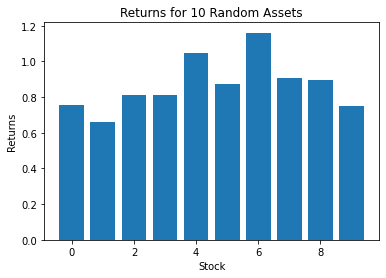

In [ ]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

**My own example 160**

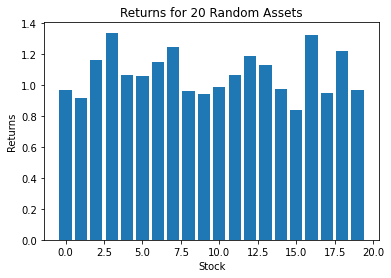

In [ ]:
plt.bar(np.arange(len(mean_returns1)), mean_returns1)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(M));

### Calculating Expected Return

So we have a universe of stocks. Great! Now let's put them together in a portfolio and calculate its expected return and risk.

We will start off by generating $N$ random weights for each asset in our portfolio.

In [ ]:
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

**My own example 161**

In [ ]:
weights_example = np.random.uniform(0, 2, M)
weights_example = weights_example/np.sum(weights_example)

We have to rescale the weights so that they all add up to $1$. We do this by scaling the weights vector by the sum total of all the weights. This step ensures that we will be using $100\%$ of the portfolio's cash.

To calculate the mean return of the portfolio, we have to scale each asset's return by its designated weight. We can pull each element of each array and multiply them individually, but it's quicker to use NumPy's linear algebra methods. The function that we want is `dot()`. This will calculate the dot product between two arrays for us. So if $v = \left[ 1, 2, 3 \right]$ and $w = \left[4, 5, 6 \right]$, then:

$$ v \cdot w = 1 \times 4 + 2 \times 5 + 3 \times 6 $$

For a one-dimensional vector, the dot product will multiply each element pointwise and add all the products together! In our case, we have a vector of weights, $\omega = \left[ \omega_1, \omega_2, \dots \omega_N\right]$ and a vector of returns, $\mu = \left[ \mu_1, \mu_2, \dots, \mu_N\right]$. If we take the dot product of these two we will get:

$$ \omega \cdot \mu = \omega_1\mu_1 + \omega_2\mu_2 + \dots + \omega_N\mu_N = \mu_P $$

This yields the sum of all the asset returns scaled by their respective weights. This the the portfolio's overall expected return!

In [ ]:
p_returns = np.dot(weights, mean_returns)
print ("Expected return of the portfolio: ", p_returns)

Expected return of the portfolio:  0.8388845831495386


**My own example 162**

In [ ]:
p_returns1 = np.dot(weights_example, mean_returns1)
print ("Expected return of the portfolio: ", p_returns1)

Expected return of the portfolio:  1.0795152998894586


Calculating the mean return is fairly intuitive and does not require too much explanation of linear algebra. However, calculating the variance of our portfolio requires a bit more background.

#### Beware of NaN values

Most of the time, all of these calculations will work without an issue. However, when working with real data we run the risk of having `nan` values in our arrays. This is NumPy's way of saying that the data there is missing or doesn't exist. These `nan` values can lead to errors in mathematical calculations so it is important to be aware of whether your array contains `nan` values and to know how to drop them.

In [ ]:
v = np.array([1, 2, np.nan, 4, 5])
print (v)

[ 1.  2. nan  4.  5.]


**My own example 163**

In [ ]:
a = np.array([1, 3, np.nan, 2, 9])
print (a)

[ 1.  3. nan  2.  9.]


Let's see what happens when we try to take the mean of this array.

In [ ]:
print (np.mean(v))

nan


**My own example 164**

In [ ]:
print (np.mean(a))

nan


Clearly, `nan` values can have a large impact on our calculations. Fortunately, we can check for `nan` values with the `isnan()` function.

In [ ]:
np.isnan(v)

array([False, False,  True, False, False])

**My own example 165**

In [ ]:
np.isnan(a)

array([False, False,  True, False, False])

Calling `isnan()` on an array will call the function on each value of the array, returning a value of `True` if the element is `nan` and `False` if the element is valid. Now, knowing whether your array contains `nan` values is all well and good, but how do we remove `nan`s? Handily enough, NumPy arrays can be indexed by boolean values (`True` or `False`). If we use a boolean array to index an array, we will remove all values of the array that register as `False` under the condition. We use the `isnan()` function in create a boolean array, assigning a `True` value to everything that is *not* `nan` and a `False` to the `nan`s and we use that to index the same array.

In [ ]:
ix = ~np.isnan(v) # the ~ indicates a logical not, inverting the bools
print (v[ix]) # We can also just write v = v[~np.isnan(v)]

[1. 2. 4. 5.]


**My own example 166**

In [ ]:
iy = ~np.isnan(a)
print (a[iy])

[1. 3. 2. 9.]


In [ ]:
print (np.mean(v[ix]))

3.0


**My own example 167**

In [ ]:
print(np.mean(a[iy]))

3.75


There are a few shortcuts to this process in the form of NumPy functions specifically built to handle them, such as `nanmean()`.

In [ ]:
print (np.nanmean(v))

3.0


**My own example 168**

In [ ]:
print (np.nanmean(a))

3.75


The `nanmean()` function simply calculates the mean of the array as if there were no `nan` values at all! There are a few more of these functions, so feel free to read more about them in the [documentation](https://docs.scipy.org/doc/numpy/user/index.html). These indeterminate values are more an issue with data than linear algebra itself so it is helpful that there are ways to handle them.

### Conclusion

Linear algebra is pervasive in finance and in general. For example, the calculation of *optimal* weights according to modern portfolio theory is done using linear algebra techniques. The arrays and functions in NumPy allow us to handle these calculations in an intuitive way. For a quick intro to linear algebra and how to use NumPy to do more significant matrix calculations, proceed to the next section.

## A brief foray into linear algebra

Let's start with a basic overview of some linear algebra. Linear algebra comes down to the multiplication and composition of scalar and matrix values. A scalar value is just a real number that we multiply against an array. When we scale a matrix or array using a scalar, we multiply each individual element of that matrix or array by the scalar.

A matrix is a collection of values, typically represented by an $m \times n$ grid, where $m$ is the number of rows and $n$ is the number of columns. The edge lengths $m$ and $n$ do not necessarily have to be different. If we have $m = n$, we call this a square matrix. A particularly interesting case of a matrix is when $m = 1$ or $n = 1$. In this case we have a special case of a matrix that we call a vector. While there is a matrix object in NumPy we will be doing everything using NumPy arrays because they can have dimensions greater than $2$. For the purpose of this section, we will be using matrix and array interchangeably.

We can express the matrix equation as:

$$ y = A\cdot x $$

Where $A$ is an $m \times n$ matrix, $y$ is a $m \times 1$ vector, and $x$ is a $n \times 1$ vector. On the right-hand side of the equation we are multiplying a matrix by a vector. This requires a little bit more clarification, lest we think that we can go about multiplying any matrices by any other matrices.

#### Matrix multiplication

With matrix multiplication, the order in which the matrices are multiplied matters. Multiplying a matrix on the left side by another matrix may be just fine, but multiplying on the right may be undefined.

In [ ]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

**My own example 169**

In [ ]:
A2 = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
B2 = np.array([
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]        
    ])

Notice that the above-defined matrices, $A$ and $B$, have different dimensions. $A$ is $3 \times 5$ and $B$ is $4 \times 3$. The general rule of what can and cannot be multiplied in which order is based on the dimensions of the matrices. Specifically, the number of columns in the matrix on the left must be equal to the number of rows in the matrix on the right. In super informal terms, let's say that we have an $m \times n$ matrix and a $p \times q$ matrix. If we multiply the first by the second on the right, we get the following:

$$ (m \times n) \cdot (p \times q) = (m \times q) $$

So the resultant product has the same number of rows as the left matrix and the same number of columns as the right matrix. This limitation of matrix multiplication with regards to dimensions is important to keep track of when writing code. To demonstrate this, we use the `dot()` function to multiply our matrices below:

In [ ]:
# print (np.dot(A, B)) Esta linea no se puede ejecutar porque la multiplicación A X B no es posible porque las dimensiones de A son 3x5 y las de B son 4x

These results make sense in accordance with our rule. Multiplying a $3 \times 5$ matrix on the right by a $4 \times 3$ matrix results in an error while multiplying a $4 \times 3$ matrix on the right by a $3 \times 5$ matrix results in a $4 \times 5$ matrix.

In [ ]:
print (np.dot(B, A))

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


**My own example 170**

In [ ]:
print (np.dot(A2, B2))

[[14 14 14]
 [32 32 32]
 [50 50 50]]


### Portfolio Variance

Let's return to our portfolio example from before. We calculated the expected return of the portfolio, but how do we calculate the variance? We start by trying to evaluate the portfolio as a sum of each individual asset, scaled by it's weight.

$$ VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N] $$

Where $S_0, \cdots, S_N$ are the assets contained within our universe. If all of our assets were independent of each other, we could simply evaluate this as

$$ VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2 $$

However, all of our assets depend on each other by their construction. They are all in some way related to our base asset and therefore each other. We thus have to calculate the variance of the portfolio by including the individual pairwise covariances of each asset. Our formula for the variance of the portfolio:

$$ VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace $$

Where $\rho_{i,j}$ is the correlation between $S_i$ and $S_j$, $\rho_{i, j} = \frac{COV[S_i, S_j]}{\sigma_i\sigma_j}$. This seems exceedingly complicated, but we can easily handle all of this using NumPy arrays. First, we calculate the covariance matrix that relates all the individual stocks in our universe.

In [ ]:
cov_mat = np.cov(returns)
print (cov_mat)

[[0.00080162 0.00062558 0.00088084 0.00083333 0.00082881 0.00079506
  0.00082588 0.00078603 0.00082297 0.00074565]
 [0.00062558 0.0009014  0.00062397 0.00075599 0.00064876 0.00068843
  0.0006524  0.00061482 0.0006424  0.0005581 ]
 [0.00088084 0.00062397 0.00134425 0.00090239 0.0009003  0.00088491
  0.0008702  0.00085498 0.00089703 0.00082048]
 [0.00083333 0.00075599 0.00090239 0.00123671 0.0008849  0.00081987
  0.00088692 0.00080095 0.00087891 0.00079581]
 [0.00082881 0.00064876 0.0009003  0.0008849  0.00124169 0.00080687
  0.00084685 0.00080967 0.00088642 0.00078629]
 [0.00079506 0.00068843 0.00088491 0.00081987 0.00080687 0.00126159
  0.00088726 0.00078035 0.00075597 0.0006777 ]
 [0.00082588 0.0006524  0.0008702  0.00088692 0.00084685 0.00088726
  0.00132061 0.00080704 0.00084087 0.00066999]
 [0.00078603 0.00061482 0.00085498 0.00080095 0.00080967 0.00078035
  0.00080704 0.00107943 0.00088152 0.00070087]
 [0.00082297 0.0006424  0.00089703 0.00087891 0.00088642 0.00075597
  0.00084087

This array is not formatted particularly nicely, but a covariance matrix is a very important concept. The covariance matrix is of the form:

$$ \left[\begin{matrix}
VAR[S_1] & COV[S_1, S_2] & \cdots & COV[S_1, S_N] \\
COV[S_2, S_1] & VAR[S_2] & \cdots & COV[S_2, S_N] \\
\vdots & \vdots & \ddots & \vdots \\
COV[S_N, S_1] & COV[S_N, S_2] & \cdots & VAR[S_N]
\end{matrix}\right] $$

So each diagonal entry is the variance of that asset at that index and each off-diagonal holds the covariance of two assets indexed by the column and row number. What is important is that once we have the covariance matrix we are able to do some very quick linear algebra to calculate the variance of the overall portfolio. We can represent the variance of the portfolio in array form as:

$$ \sigma_p^2 = \omega \ C \ \omega^\intercal$$

Where $C$ is the covariance matrix of all the assets and $\omega$ is the array containing the weights of each individual asset. The superscript $\intercal$ on the second $\omega$ listed above denotes the **transpose** of $\omega$. For a reference on the evaluation of the variance of a portfolio as a matrix equation, please see the Wikipedia article on [modern portfolio theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory).

The transpose of an array is what you get when you switch the rows and columns of an array. This has the effect of reflecting an array across what you might imagine as a diagonal. For example, take our array $A$ from before:

In [ ]:
print (A)

[[ 1  2  3 12  6]
 [ 4  5  6 15 20]
 [ 7  8  9 10 10]]


The transpose looks like a mirror image of the same array.

In [ ]:
print (np.transpose(A))

[[ 1  4  7]
 [ 2  5  8]
 [ 3  6  9]
 [12 15 10]
 [ 6 20 10]]


But $\omega$ here is a 1-dimensional array, a vector! It makes perfect to take the transpose of $A$, a $3 \times 5$ array, as the output will be a $5 \times 3$ array, but a 1-dimensional array is not quite as intuitive. A typical 1-dimensional array can be thought of as a $1 \times n$ horizontal vector. Thus, taking the tranpose of this array essentially means changing it into a $n \times 1$ vertical vector. This makes sense because 1-dimensional arrays are still arrays and any multiplication done between 1-dimensional and higher dimensional arrays must keep in line with our dimensionality issue of matrix multiplication.

To make a long story short, we think of $\omega$ as $1 \times N$ since we have $N$ securities. This makes it so that $\omega^\intercal$ is $N \times 1$. Again, our covariance matrix is $N \times N$. So the overall multiplication works out like so, in informal terms:

$$ \text{Dimensions}(\sigma_p^2) = \text{Dimensions}(\omega C \omega^\intercal) = (1 \times N)\cdot (N \times N)\cdot (N \times 1) = (1 \times 1)$$

Multiplying the covariance matrix on the left by the plain horizontal vector and on the right by that vector's transpose results in the calculation of a single scalar ($1 \times 1$) value, our portfolio's variance.

So knowing this, let's proceed and calculate the portfolio variance! We can easily calculate the product of these arrays by using `dot()` for matrix multiplication, though this time we have to do it twice.

In [ ]:
# Calculating the portfolio volatility
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print ("Portfolio volatility: ", vol_p)

Portfolio volatility:  0.028827983849457436


To confirm this calculation, let's simply evaluate the volatility of the portfolio using only NumPy functions.

In [ ]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print ("Portfolio volatility: ", vol_p_alt)

Portfolio volatility:  0.028827983849457433


The `ddof` parameter is a simple integer input that tells the function the number of degrees of freedom to take into account. This is a more statistical concept, but what this tells us that our matrix calculation is correct!

A lot of this might not make sense at first glance. It helps to go back and forth between the theory and the code representations until you have a better grasp of the mathematics involved. It is definitely not necessary to be an expert on linear algebra and on matrix operations, but linear algebra can help to streamline the process of working with large amounts of data. For further reading on NumPy, check out the [documentation](https://docs.scipy.org/doc/numpy/user/index.html).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div> 

# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

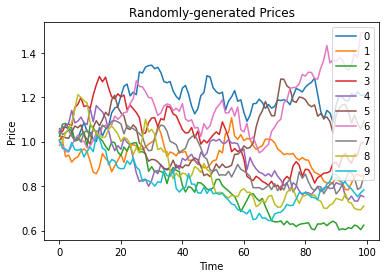

In [ ]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

**My own example 171**

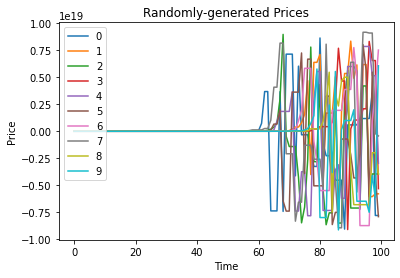

In [ ]:
returns1 = pd.DataFrame(np.random.geometric(0.45,(100,10)))
prices1 = returns1.cumprod()
prices1.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=2);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [ ]:
s = pd.Series([1, 2, np.nan, 4, 5])
print (s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64



**My own example 172**

In [ ]:
marcas_carros = pd.Series(['Ford', 'BMW', 'Audi', 'Mazda', 'Mercedes-Benz', 'Chevrolet', 'Ferrari'])
print (marcas_carros)

0             Ford
1              BMW
2             Audi
3            Mazda
4    Mercedes-Benz
5        Chevrolet
6          Ferrari
dtype: object


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [ ]:
print (s.name)

None


**My own example 173**

In [ ]:
print (marcas_carros.name)

None


This name can be directly modified with no repercussions.

In [ ]:
s.name = "Toy Series"
print (s.name)

Toy Series


**My own example 174**

In [ ]:
marcas_carros.name = "Series de carros"
print (marcas_carros.name)

Series de carros


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [ ]:
print (s.index)

RangeIndex(start=0, stop=5, step=1)


**My own example 175**

In [ ]:
print (marcas_carros.index)

RangeIndex(start=0, stop=7, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [ ]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')



**My own example 176**

In [ ]:
indices_fechas = pd.date_range("2021-02-01", periods=len(marcas_carros), freq="W")
print (indices_fechas)

DatetimeIndex(['2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28',
               '2021-03-07', '2021-03-14', '2021-03-21'],
              dtype='datetime64[ns]', freq='W-SUN')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [ ]:
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


**My own example 177**

In [ ]:
marcas_carros.index = indices_fechas
print (marcas_carros.index)

DatetimeIndex(['2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28',
               '2021-03-07', '2021-03-14', '2021-03-21'],
              dtype='datetime64[ns]', freq='W-SUN')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [ ]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


**My own example 178**

In [ ]:
print ("First element of the series: ", marcas_carros.iloc[0])
print ("Last element of the series: ", marcas_carros.iloc[len(marcas_carros)-1])

First element of the series:  Ford
Last element of the series:  Ferrari


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [ ]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

**My own example 179**

In [ ]:
marcas_carros.iloc[:3]

2021-02-07    Ford
2021-02-14     BMW
2021-02-21    Audi
Freq: W-SUN, Name: Series de carros, dtype: object

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [ ]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64


**My own example 180**

In [ ]:
start = 0
end = len(marcas_carros) 
step = 2

marcas_carros.iloc[start:end:step]

2021-02-07             Ford
2021-02-21             Audi
2021-03-07    Mercedes-Benz
2021-03-21          Ferrari
Freq: 2W-SUN, Name: Series de carros, dtype: object

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [ ]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

**My own example 181**

In [ ]:
marcas_carros.iloc[::-1]

2021-03-21          Ferrari
2021-03-14        Chevrolet
2021-03-07    Mercedes-Benz
2021-02-28            Mazda
2021-02-21             Audi
2021-02-14              BMW
2021-02-07             Ford
Freq: -1W-SUN, Name: Series de carros, dtype: object

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [ ]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

**My own example 182**

In [ ]:
marcas_carros.iloc[-3:-8:-2]

2021-03-07    Mercedes-Benz
2021-02-21             Audi
2021-02-07             Ford
Freq: -2W-SUN, Name: Series de carros, dtype: object

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [ ]:
s.loc['2016-01-01']

1.0

**My own example 183**

In [ ]:
marcas_carros.loc['2021-03-07']

'Mercedes-Benz'

Or even for a range of dates!

In [ ]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

**My own example 184**

In [ ]:
marcas_carros.loc['2021-02-22':'2021-03-20']

2021-02-28            Mazda
2021-03-07    Mercedes-Benz
2021-03-14        Chevrolet
Freq: W-SUN, Name: Series de carros, dtype: object

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [ ]:
print (s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


**My own example 185**

In [ ]:
print (marcas_carros == 'Ford')

2021-02-07     True
2021-02-14    False
2021-02-21    False
2021-02-28    False
2021-03-07    False
2021-03-14    False
2021-03-21    False
Freq: W-SUN, Name: Series de carros, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [ ]:
print (s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


**My own example 186**

In [ ]:
print (marcas_carros.loc[marcas_carros == 'Ford'])

2021-02-07    Ford
Freq: W-SUN, Name: Series de carros, dtype: object


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [ ]:
print (s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


**My own example 187**

In [ ]:
num = pd.Series([2,9,45, 6, 67, 43, 4, 92, 34, 81,])
print (num.loc[(num < 50) & (num % 2 == 0)])

0     2
3     6
6     4
8    34
dtype: int64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [ ]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
#prices = get_pricing(symbol, start_date=start, end_date=end, fields="price") #La función get_pricing esta obsoleta
prices =  yf.download('CMG', start, end)

[*********************100%***********************]  1 of 1 completed


**My own example 188**

In [ ]:
symbol_g = "GOOG" #Google
start_g = "2020-03-12"
end_g = "2021-03-12"
prices_g =  yf.download('CMG', start_g, end_g)

[*********************100%***********************]  1 of 1 completed


We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [ ]:
print ("\n", type(prices))
prices.head(5) 


 <class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,343.700012,350.489990,340.000000,341.269989,341.269989,728100
2012-01-04,346.000000,349.980011,345.010010,348.750000,348.750000,743100
2012-01-05,346.880005,351.980011,342.570007,350.480011,350.480011,672300
2012-01-06,348.880005,352.630005,347.350006,348.950012,348.950012,370700
2012-01-09,349.000000,349.489990,336.290009,339.739990,339.739990,748600


**My own example 189**

In [ ]:
print ("\n", type(prices_g))
prices_g.tail(7)


 <class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-03,1466.770020,1477.630005,1405.390015,1408.219971,1408.219971,300600
2021-03-04,1402.709961,1408.300049,1322.400024,1351.119995,1351.119995,507000
2021-03-05,1358.849976,1358.849976,1256.270020,1332.280029,1332.280029,535300
2021-03-08,1332.000000,1361.890015,1306.239990,1335.000000,1335.000000,333600
2021-03-09,1372.900024,1433.959961,1369.969971,1427.609985,1427.609985,529100
2021-03-10,1429.900024,1453.439941,1404.459961,1416.670044,1416.670044,289800
2021-03-11,1439.989990,1468.430054,1436.319946,1462.060059,1462.060059,327400


As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [ ]:
#print ('Old name: ', prices.name)
prices.name = symbol
print ('New name: ', prices.name)

New name:  CMG


**My own example 190**

In [ ]:
prices_g.name = symbol_g
print ('New name: ', prices_g.name)

New name:  GOOG


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [ ]:
print (prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


**My own example 191**

In [ ]:
print (prices_g.index)

DatetimeIndex(['2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25',
               ...
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-03',
               '2021-03-04', '2021-03-05', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [ ]:
monthly_prices = prices.resample('M').interpolate()
monthly_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,368.390015,369.720001,365.519989,367.290009,367.290009,350800.0
2012-02-29,390.899994,392.000000,387.339996,390.220001,390.220001,355100.0
2012-03-31,404.684998,405.695007,400.059998,402.184998,402.184998,340200.0
2012-04-30,418.470001,419.390015,412.779999,414.149994,414.149994,325300.0
2012-05-31,412.440002,413.809998,407.359985,413.070007,413.070007,384000.0
2012-06-30,352.035004,354.399994,348.250000,352.699997,352.699997,521150.0
2012-07-31,291.630005,294.989990,289.140015,292.329987,292.329987,658300.0
2012-08-31,291.750000,292.820007,286.489990,288.640015,288.640015,510100.0
2012-09-30,272.625000,274.185005,268.289993,271.585007,271.585007,625700.0


**My own example 192**

In [ ]:
monthly_prices_g = prices_g.resample('M').interpolate()
monthly_prices_g.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,634.659973,674.979980,625.000000,654.400024,654.400024,846400.0
2020-04-30,880.000000,897.969971,877.000000,878.549988,878.549988,449400.0
2020-05-31,964.500000,977.130005,955.770020,965.454987,965.454987,423650.0
2020-06-30,1049.000000,1056.290039,1034.540039,1052.359985,1052.359985,397900.0
2020-07-31,1153.359985,1155.170044,1127.939941,1155.160034,1155.160034,302800.0
2020-08-31,1306.079956,1325.000000,1304.910034,1310.280029,1310.280029,290600.0
2020-09-30,1261.800049,1272.000000,1234.369995,1243.709961,1243.709961,286900.0
2020-10-31,1279.740051,1284.840027,1249.664978,1266.570007,1266.570007,277450.0
2020-11-30,1297.680054,1297.680054,1264.959961,1289.430054,1289.430054,268000.0


The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [ ]:
monthly_prices_med = prices.resample('M').mean()
monthly_prices_med.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,353.854501,357.491002,351.092499,354.829002,354.829002,4.783650e+05
2012-02-29,378.081999,381.654002,375.636002,379.535503,379.535503,5.317800e+05
2012-03-31,406.103183,408.890456,403.241364,407.002272,407.002272,3.971045e+05
2012-04-30,422.301999,427.149001,417.346500,422.798997,422.798997,7.608100e+05
2012-05-31,405.641364,410.391819,400.822271,405.805456,405.805456,5.796045e+05
2012-06-30,404.553808,408.189046,398.229523,403.033335,403.033335,6.254857e+05
2012-07-31,354.177618,358.931902,349.204764,353.880474,353.880474,1.266686e+06
2012-08-31,295.113044,298.547392,291.762612,294.535219,294.535219,6.039261e+05
2012-09-30,325.636312,331.034209,321.312628,326.513160,326.513160,8.505105e+05


**My own example 193**

In [ ]:
monthly_prices_med_g = prices_g.resample('M').mean()
monthly_prices_med_g.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,595.047860,621.787136,562.864284,599.241427,599.241427,1.213436e+06
2020-04-30,779.109047,799.794282,760.173331,780.807617,780.807617,8.104381e+05
2020-05-31,953.590506,970.211996,939.083005,955.342993,955.342993,5.706450e+05
2020-06-30,1036.614544,1051.499090,1020.158178,1037.191362,1037.191362,3.942045e+05
2020-07-31,1125.029541,1140.317732,1107.689547,1126.107733,1126.107733,3.766364e+05
2020-08-31,1212.096191,1226.979045,1200.801909,1216.439535,1216.439535,2.283476e+05
2020-09-30,1282.128569,1299.175706,1256.763329,1276.364752,1276.364752,3.518238e+05
2020-10-31,1292.267267,1310.195457,1275.348189,1293.779558,1293.779558,4.125409e+05
2020-11-30,1275.071497,1291.879504,1255.160999,1274.182013,1274.182013,3.084250e+05


We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [ ]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,343.700012,350.489990,340.000000,341.269989,341.269989,728100
2012-02-29,368.000000,371.619995,364.410004,370.410004,370.410004,873400
2012-03-31,391.850006,394.750000,388.000000,394.100006,394.100006,387700
2012-04-30,417.000000,421.410004,413.540009,418.399994,418.399994,381300
2012-05-31,415.410004,424.149994,414.589996,419.890015,419.890015,501400
2012-06-30,404.869995,408.940002,394.000000,397.140015,397.140015,657000
2012-07-31,386.029999,386.029999,376.260010,383.459991,383.459991,872400
2012-08-31,292.869995,293.880005,280.410004,280.670013,280.670013,777400
2012-09-30,289.730011,289.739990,283.679993,285.989990,285.989990,455800


**My own example 194**

In [ ]:
def custom_resampler_2(array_like):
    """ La diferencia entre el precio con el que termino y comenzo el mes """
    return array_like[-1] -array_like[0]
first_of_month_prices_g= prices_g.resample('M').apply(custom_resampler_2)
first_of_month_prices_g.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,47.639954,61.119995,59.989990,51.400024,51.400024,-1234000
2020-04-30,249.979980,252.719971,272.770020,259.190002,259.190002,-370700
2020-05-31,142.229980,123.400024,133.079956,128.989990,128.989990,237100
2020-06-30,36.190002,-0.119995,24.540039,4.479980,4.479980,-315300
2020-07-31,99.510010,81.510010,79.899902,86.800049,86.800049,19100
2020-08-31,152.799927,168.449951,168.489990,163.570068,163.570068,53800
2020-09-30,-63.199951,-101.500000,-85.609985,-128.510010,-128.510010,-47700
2020-10-31,-17.869995,-19.829956,-39.689941,-36.540039,-36.540039,142300
2020-11-30,87.680054,87.680054,92.669922,100.890015,100.890015,-100700


We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [ ]:
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,343.700012,350.489990,340.000000,341.269989,341.269989,728100
2012-01-04 00:00:00-05:00,346.000000,349.980011,345.010010,348.750000,348.750000,743100
2012-01-05 00:00:00-05:00,346.880005,351.980011,342.570007,350.480011,350.480011,672300
2012-01-06 00:00:00-05:00,348.880005,352.630005,347.350006,348.950012,348.950012,370700
2012-01-09 00:00:00-05:00,349.000000,349.489990,336.290009,339.739990,339.739990,748600
2012-01-10 00:00:00-05:00,343.820007,344.339996,336.549988,341.119995,341.119995,503500
2012-01-11 00:00:00-05:00,340.000000,347.920013,338.239990,347.600006,347.600006,573900
2012-01-12 00:00:00-05:00,347.609985,348.510010,343.799988,347.619995,347.619995,384900
2012-01-13 00:00:00-05:00,350.260010,355.000000,350.000000,354.619995,354.619995,697100


**My own example 195**

In [ ]:
eastern_prices_g = prices_g.tz_localize('EST') #New York
eastern_prices_g.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-12 00:00:00-05:00,587.020020,613.859985,565.010010,603.000000,603.000000,2080400
2020-03-13 00:00:00-05:00,650.340027,655.549988,600.919983,630.359985,630.359985,1088800
2020-03-16 00:00:00-05:00,570.000000,580.099976,520.000000,571.510010,571.510010,1209600
2020-03-17 00:00:00-05:00,573.280029,579.419983,500.269989,524.409973,524.409973,1511800
2020-03-18 00:00:00-05:00,492.010010,500.000000,415.000000,465.209991,465.209991,1510100
2020-03-19 00:00:00-05:00,455.859985,553.000000,450.529999,536.150024,536.150024,1414600
2020-03-20 00:00:00-05:00,573.869995,596.989990,552.229980,566.000000,566.000000,1751900
2020-03-23 00:00:00-05:00,561.309998,602.260010,551.210022,588.710022,588.710022,1286900
2020-03-24 00:00:00-05:00,639.000000,690.359985,630.119995,664.049988,664.049988,1160100


In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [ ]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print (calendar_dates)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


**My own example 196**

In [ ]:
start = "2020-06-11"
end = "2021-05-11"
calendar_dates_g = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print (calendar_dates_g)

DatetimeIndex(['2020-06-11 00:00:00+00:00', '2020-06-12 00:00:00+00:00',
               '2020-06-13 00:00:00+00:00', '2020-06-14 00:00:00+00:00',
               '2020-06-15 00:00:00+00:00', '2020-06-16 00:00:00+00:00',
               '2020-06-17 00:00:00+00:00', '2020-06-18 00:00:00+00:00',
               '2020-06-19 00:00:00+00:00', '2020-06-20 00:00:00+00:00',
               ...
               '2021-05-02 00:00:00+00:00', '2021-05-03 00:00:00+00:00',
               '2021-05-04 00:00:00+00:00', '2021-05-05 00:00:00+00:00',
               '2021-05-06 00:00:00+00:00', '2021-05-07 00:00:00+00:00',
               '2021-05-08 00:00:00+00:00', '2021-05-09 00:00:00+00:00',
               '2021-05-10 00:00:00+00:00', '2021-05-11 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=335, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [ ]:
#calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices = prices.reindex(calendar_dates).ffill()
calendar_prices.head(15)

,Open,High,Low,Close,Adj Close,Volume
2012-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


**My own example 197**

In [ ]:
calendar_prices_g = prices_g.reindex(calendar_dates_g).ffill()
calendar_prices_g.head(15)

,Open,High,Low,Close,Adj Close,Volume
2020-06-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [ ]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
2012-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


**My own example 198**

In [ ]:
meanfilled_prices_g = calendar_prices_g.fillna(calendar_prices_g.mean())
meanfilled_prices_g.head(10)

,Open,High,Low,Close,Adj Close,Volume
2020-06-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [ ]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume
2012-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


**My own example 199**

In [ ]:
bfilled_prices_g = calendar_prices_g.fillna(method='bfill')
bfilled_prices_g.head(10)

,Open,High,Low,Close,Adj Close,Volume
2020-06-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [ ]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

,Open,High,Low,Close,Adj Close,Volume


**My own example 200**

In [ ]:
dropped_prices_g = calendar_prices_g.dropna()
dropped_prices_g.head(10)

,Open,High,Low,Close,Adj Close,Volume


Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

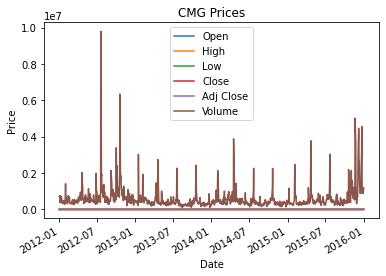

In [ ]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

**My own example 201**

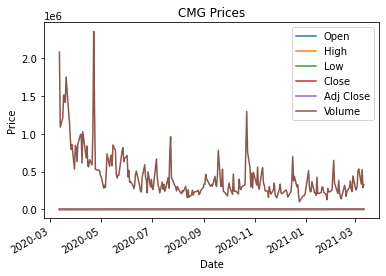

In [ ]:
prices_g.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [ ]:
print ("Mean: ", prices.mean())
print ("Standard deviation: ", prices.std())

Mean:  Open            501.580328
High            506.547406
Low             496.621740
Close           501.636650
Adj Close       501.636650
Volume       591171.868787
dtype: float64
Standard deviation:  Open            146.831560
High            147.589064
Low             145.792764
Close           146.688738
Adj Close       146.688738
Volume       615931.535248
dtype: float64


**My own example 202**

In [ ]:
print ("Mean: ", prices_g.mean())
print ("Standard deviation: ", prices_g.std())

Mean:  Open           1173.124999
High           1190.770355
Low            1154.094245
Close          1173.783058
Adj Close      1173.783058
Volume       435913.492063
dtype: float64
Standard deviation:  Open            246.088523
High            244.416733
Low             247.119706
Close           244.820519
Adj Close       244.820519
Volume       316338.725450
dtype: float64


In [ ]:
print ("Summary Statistics")
print (prices.describe())

Summary Statistics
              Open         High          Low        Close    Adj Close  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean    501.580328   506.547406   496.621740   501.636650   501.636650   
std     146.831560   147.589064   145.792764   146.688738   146.688738   
min     234.449997   243.000000   233.820007   236.240005   236.240005   
25%     370.607498   374.037498   368.189995   371.555000   371.555000   
50%     521.285004   524.994995   515.934998   521.270020   521.270020   
75%     645.989990   651.910019   638.540024   646.834991   646.834991   
max     758.489990   758.609985   748.390015   757.770020   757.770020   

             Volume  
count  1.006000e+03  
mean   5.911719e+05  
std    6.159315e+05  
min    1.012000e+05  
25%    3.189750e+05  
50%    4.262500e+05  
75%    6.282000e+05  
max    9.795100e+06  


**My own example 203**

In [ ]:
print ("Summary Statistics")
print (prices_g.describe())

Summary Statistics
              Open         High          Low        Close    Adj Close  \
count   252.000000   252.000000   252.000000   252.000000   252.000000   
mean   1173.124999  1190.770355  1154.094245  1173.783058  1173.783058   
std     246.088523   244.416733   247.119706   244.820519   244.820519   
min     455.859985   500.000000   415.000000   465.209991   465.209991   
25%    1036.730011  1052.737488  1020.449982  1037.657532  1037.657532   
50%    1248.924988  1265.354980  1234.635010  1244.104980  1244.104980   
75%    1336.425018  1358.349976  1317.295013  1340.572540  1340.572540   
max    1560.199951  1564.910034  1531.900024  1550.489990  1550.489990   

             Volume  
count  2.520000e+02  
mean   4.359135e+05  
std    3.163387e+05  
min    1.013000e+05  
25%    2.426250e+05  
50%    3.191500e+05  
75%    5.145750e+05  
max    2.354500e+06  


We can easily modify `Series` with scalars using our basic mathematical operators.

In [ ]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,677.400024,690.979980,670.000000,672.539978,672.539978,1456190
2012-01-04,682.000000,689.960022,680.020020,687.500000,687.500000,1486190
2012-01-05,683.760010,693.960022,675.140015,690.960022,690.960022,1344590
2012-01-06,687.760010,695.260010,684.700012,687.900024,687.900024,741390
2012-01-09,688.000000,688.979980,662.580017,669.479980,669.479980,1497190


**My own example 204**

In [ ]:
modified_prices_g = prices_g * 1.19 
modified_prices_g.head(8)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-12,698.553823,730.493383,672.361912,717.570000,717.570000,2475676.0
2020-03-13,773.904632,780.104485,715.094780,750.128383,750.128383,1295672.0
2020-03-16,678.300000,690.318971,618.800000,680.096912,680.096912,1439424.0
2020-03-17,682.203235,689.509780,595.321287,624.047868,624.047868,1799042.0
2020-03-18,585.491912,595.000000,493.850000,553.599890,553.599890,1797019.0
2020-03-19,542.473383,658.070000,536.130699,638.018529,638.018529,1683374.0
2020-03-20,682.905294,710.418088,657.153677,673.540000,673.540000,2084761.0
2020-03-23,667.958897,716.689412,655.939926,700.564926,700.564926,1531411.0


And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [ ]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,2012-01-11 00:00:00,2012-01-12 00:00:00,2012-01-13 00:00:00,2012-01-17 00:00:00,...,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,2015-12-31 00:00:00,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**My own example 205**

In [ ]:
noisy_prices_g = prices_g + 5 * pd.Series(np.random.normal(0, 5, len(prices_g)), index=prices_g.index) + 20
noisy_prices_g.head(7)

,2020-03-12 00:00:00,2020-03-13 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,...,2021-03-08 00:00:00,2021-03-09 00:00:00,2021-03-10 00:00:00,2021-03-11 00:00:00,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If there are no matching indices, however, we may get an empty `Series` in return.

In [ ]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1002,1003,1004,1005,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**My own example 206**

In [ ]:
empty_series_g = prices + pd.Series(np.random.normal(0, 1, len(prices_g)))
empty_series_g.head(4)

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [ ]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

**My own example 207**

In [ ]:
add_returns_g = prices_g.diff()[1:]
mult_returns_g = prices_g.pct_change()[1:]

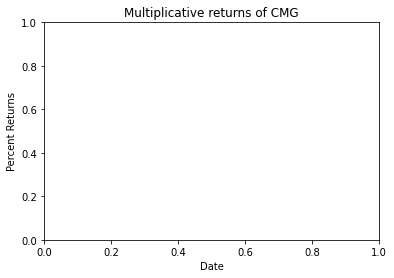

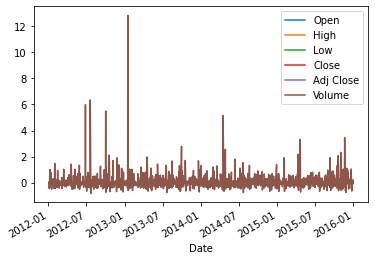

In [ ]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

**My own example 208**

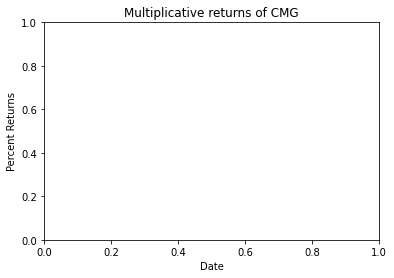

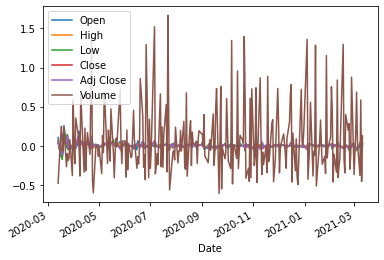

In [ ]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns_g.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [ ]:
#rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

**My own example 209**

In [ ]:
rolling_mean_g = prices_g.rolling(30).mean()
rolling_mean_g.name = "30-day rolling mean Google"

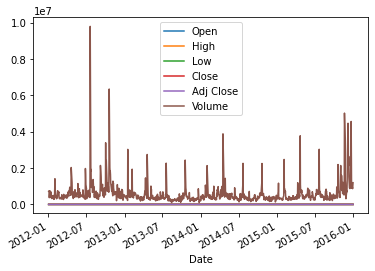

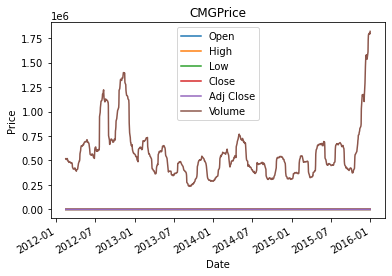

In [ ]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

**My own example 210**

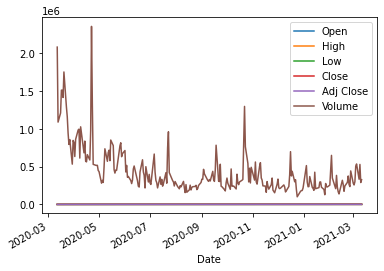

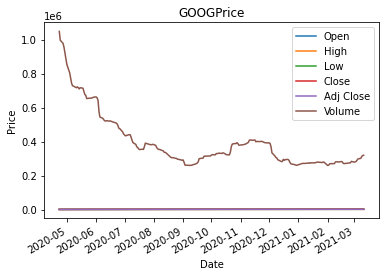

In [ ]:
prices_g.plot()
rolling_mean_g.plot()
plt.title(symbol_g + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [ ]:
#rolling_std = pd.rolling_std(prices, 30)
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

**My own example 211**

In [ ]:
rolling_std_g = prices.rolling(30).std()
rolling_std_g.name = "30-day rolling volatility Google"

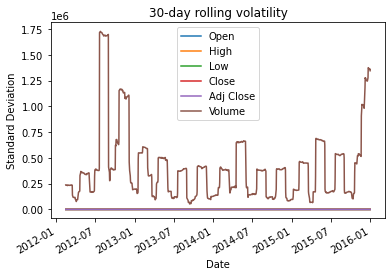

In [ ]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

**My own example 212**

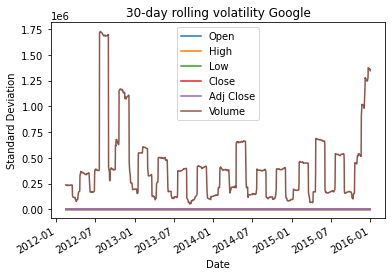

In [ ]:
rolling_std_g.plot()
plt.title(rolling_std_g.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [ ]:
print (np.median(mult_returns))

0.0005465394818680025


**My own example 213**

In [ ]:
print (np.median(mult_returns_g))

0.0023048823802137575


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [ ]:
print (mult_returns.median())

Open         0.000879
High         0.000051
Low          0.001460
Close        0.000236
Adj Close    0.000236
Volume      -0.016473
dtype: float64


**My own example 214**

In [ ]:
print (mult_returns_g.median())

Open         0.002882
High         0.002237
Low          0.004855
Close        0.001971
Adj Close    0.001971
Volume      -0.022067
dtype: float64


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [ ]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([ 0.02183386,  1.42056657,  1.06961007,  0.69129751, -1.13597218])}


**My own example 215**

In [ ]:
dict_data_1 = {
    'dias de la semana' : [1, 2, 3, 4, 5, 6, 7],
    'paises' : ['Colombia', 'USA', 'Canada', 'Mexico', 'Brasil', 'España', 'Rusia'],
    'aumento inflación' : np.random.normal(0, 1, 7)
}
print (dict_data_1)

{'dias de la semana': [1, 2, 3, 4, 5, 6, 7], 'paises': ['Colombia', 'USA', 'Canada', 'Mexico', 'Brasil', 'España', 'Rusia'], 'aumento inflación': array([ 0.28602924, -0.34801827,  0.1367958 , -1.55535952, -0.86820541,
       -1.48632023, -0.42073658])}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [ ]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (frame_data)

            a  b         c
2016-01-01  1  L  0.021834
2016-01-02  2  K  1.420567
2016-01-03  3  J  1.069610
2016-01-04  4  M  0.691298
2016-01-05  5  Z -1.135972


**My own example 216**

In [ ]:
frame_data_1 = pd.DataFrame(dict_data_1, index=pd.date_range('2020-03-05', periods=7))
print (frame_data_1)

            dias de la semana    paises  aumento inflación
2020-03-05                  1  Colombia           0.286029
2020-03-06                  2       USA          -0.348018
2020-03-07                  3    Canada           0.136796
2020-03-08                  4    Mexico          -1.555360
2020-03-09                  5    Brasil          -0.868205
2020-03-10                  6    España          -1.486320
2020-03-11                  7     Rusia          -0.420737


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [ ]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print (numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


**My own example 217**

In [ ]:
s_3 = pd.Series(["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"], name='Dias')
s_4 = pd.Series([11, 12, 13, 14, 15, 16, 17], name="Numeros")
dias_mes = pd.concat([s_3, s_4], axis=1)
print (dias_mes)

        Dias  Numeros
0      Lunes       11
1     Martes       12
2  Miercoles       13
3     Jueves       14
4    Viernes       15
5     Sabado       16
6    Domingo       17


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [ ]:
print (numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


**My own example 218**

In [ ]:
print (dias_mes.columns)

Index(['Dias', 'Numeros'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [ ]:
numbers.columns = ['Shmevens', 'Shmodds']
print (numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


**My own example 219**

In [ ]:
dias_mes.columns = ['Dioses', 'Puntaje']
print (dias_mes)

      Dioses  Puntaje
0      Lunes       11
1     Martes       12
2  Miercoles       13
3     Jueves       14
4    Viernes       15
5     Sabado       16
6    Domingo       17


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [ ]:
print (numbers.index)

RangeIndex(start=0, stop=5, step=1)


**My own example 220**

In [ ]:
print (dias_mes.index)

RangeIndex(start=0, stop=7, step=1)


In [ ]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print (numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


**My own example 221**

In [ ]:
dias_mes.index = pd.date_range("2020-06-11", periods=len(dias_mes))
print (dias_mes)

               Dioses  Puntaje
2020-06-11      Lunes       11
2020-06-12     Martes       12
2020-06-13  Miercoles       13
2020-06-14     Jueves       14
2020-06-15    Viernes       15
2020-06-16     Sabado       16
2020-06-17    Domingo       17


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [ ]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

**My own example 222**

In [ ]:
dias_mes.values

array([['Lunes', 11],
       ['Martes', 12],
       ['Miercoles', 13],
       ['Jueves', 14],
       ['Viernes', 15],
       ['Sabado', 16],
       ['Domingo', 17]], dtype=object)

This returns a NumPy array.

In [ ]:
type(numbers.values)

numpy.ndarray

**My own example 223**

In [ ]:
type(dias_mes.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [ ]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
#prices = get_pricing(symbol, start_date=start, end_date=end, fields="price") No funciona
prices = yf.download(symbol, start=start, end=end)
if isinstance(symbol, list):
    #prices.columns = map(lambda x: x.symbol, prices.columns) No funciona
    prices.columns = map(lambda x: x[1], prices.columns)
else:
    prices.name = symbol

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- WFM: No data found for this date range, symbol may be delisted


**My own example 224**

In [ ]:
symbol_1 = ["AAPL", "AMZN"]
start= "2012-01-01"
end = "2016-01-01"
prices_1 = yf.download(symbol_1, start=start, end=end)
if isinstance(symbol_1, list):
    prices_1.columns = map(lambda x: x[1], prices_1.columns)
else:
    prices_1.name = symbol_1

[*********************100%***********************]  2 of 2 completed


Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [ ]:
#prices.CMG.head() No funciona
prices['CMG'].head()

,CMG,CMG,CMG,CMG,CMG,CMG
Date,,,,,,
2012-01-03 00:00:00,341.269989,341.269989,350.489990,340.000000,343.700012,728100
2012-01-04 00:00:00,348.750000,348.750000,349.980011,345.010010,346.000000,743100
2012-01-05 00:00:00,350.480011,350.480011,351.980011,342.570007,346.880005,672300
2012-01-06 00:00:00,348.950012,348.950012,352.630005,347.350006,348.880005,370700
2012-01-09 00:00:00,339.739990,339.739990,349.489990,336.290009,349.000000,748600


**My own example 225**

In [ ]:
prices_1['AAPL'].head()

,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.500195,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.567369,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.706891,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.839727,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.819361,15.061786,15.276786,15.048214,15.196429,394024400


We can also use `loc[]` to access an individual column like so.

In [ ]:
prices.loc[:, 'CMG'].head()

,CMG,CMG,CMG,CMG,CMG,CMG
Date,,,,,,
2012-01-03 00:00:00,341.269989,341.269989,350.489990,340.000000,343.700012,728100
2012-01-04 00:00:00,348.750000,348.750000,349.980011,345.010010,346.000000,743100
2012-01-05 00:00:00,350.480011,350.480011,351.980011,342.570007,346.880005,672300
2012-01-06 00:00:00,348.950012,348.950012,352.630005,347.350006,348.880005,370700
2012-01-09 00:00:00,339.739990,339.739990,349.489990,336.290009,349.000000,748600


**My own example 226**

In [ ]:
prices_1.loc[:, 'AAPL'].head()

,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.500195,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.567369,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.706891,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.839727,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.819361,15.061786,15.276786,15.048214,15.196429,394024400


Accessing an individual column will return a `Series`, regardless of how we get it.

In [ ]:
print (type(prices.CMG))
print (type(prices.loc[:, 'CMG']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


**My own example 227**

In [ ]:
print (type(prices_1.AAPL))
print (type(prices_1.loc[:, 'AAPL']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [ ]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,CMG,CMG,CMG,CMG,CMG,MCD,MCD,MCD,MCD,MCD,MCD
Date,,,,,,,,,,,,
2012-01-03 00:00:00,341.269989,341.269989,350.489990,340.000000,343.700012,728100,72.811646,98.839996,101.589996,98.750000,101.330002,8895900
2012-01-04 00:00:00,348.750000,348.750000,349.980011,345.010010,346.000000,743100,73.216789,99.389999,100.300003,98.760002,99.110001,6754700
2012-01-05 00:00:00,350.480011,350.480011,351.980011,342.570007,346.880005,672300,73.540932,99.830002,100.400002,98.680000,99.470001,8163800
2012-01-06 00:00:00,348.950012,348.950012,352.630005,347.350006,348.880005,370700,74.108147,100.599998,100.769997,99.870003,100.089996,6775300
2012-01-09 00:00:00,339.739990,339.739990,349.489990,336.290009,349.000000,748600,73.400963,99.639999,100.930000,99.510002,100.879997,4433700


**My own example 228**

In [ ]:
prices_1.loc[:, ['AAPL', 'AMZN']].head()

,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,
2012-01-03,12.500195,14.686786,14.732143,14.607143,14.621429,302220800,8.9515,8.9515,8.9740,8.7775,8.7945,102216000
2012-01-04,12.567369,14.765714,14.810000,14.617143,14.642857,260022000,8.8755,8.8755,9.0250,8.8035,8.9605,84104000
2012-01-05,12.706891,14.929643,14.948214,14.738214,14.819643,271269600,8.8805,8.8805,8.9125,8.7025,8.7970,76182000
2012-01-06,12.839727,15.085714,15.098214,14.972143,14.991786,318292800,9.1305,9.1305,9.2325,8.8750,8.9035,140168000
2012-01-09,12.819361,15.061786,15.276786,15.048214,15.196429,394024400,8.9280,8.9280,9.2185,8.8500,9.1380,101138000


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [ ]:
symbol = ["CMG", "MCD", "SHAK"]
start = "2012-01-01"
end = "2016-01-01"
prices_sin_wfm = yf.download(symbol, start=start, end=end)
prices_sin_wfm.columns = map(lambda x: x[1], prices_sin_wfm.columns)
prices_sin_wfm.loc['2015-12-15':'2015-12-22']

[*********************100%***********************]  3 of 3 completed


,CMG,MCD,SHAK,CMG,MCD,SHAK,CMG,MCD,SHAK,CMG,MCD,SHAK,CMG,MCD,SHAK,CMG,MCD,SHAK
Date,,,,,,,,,,,,,,,,,,
2015-12-15,554.859985,98.247292,41.580002,554.859985,116.930000,41.580002,564.549988,118.239998,41.720001,553.570007,116.839996,40.219002,560.130005,117.500000,40.700001,914500,6118300,505400.0
2015-12-16,567.830017,99.011902,40.169998,567.830017,117.839996,40.169998,569.280029,118.750000,42.029999,554.200012,116.489998,39.500000,556.150024,117.489998,42.029999,872000,6306300,756300.0
2015-12-17,554.890015,98.726212,38.540001,554.890015,117.500000,38.540001,577.760010,118.900002,40.849998,554.599976,117.489998,38.450001,575.010010,118.339996,40.330002,1144800,5275900,788700.0
2015-12-18,541.080017,98.020454,39.750000,541.080017,116.660004,39.750000,555.340027,117.279999,39.750000,540.500000,115.889999,38.000000,553.780029,116.739998,39.250000,1506400,11238900,1506800.0
2015-12-21,522.010010,98.885864,38.189999,522.010010,117.690002,38.189999,544.880005,117.739998,40.250000,508.100006,116.610001,37.599998,544.250000,116.959999,40.009998,3098000,3344600,909700.0
2015-12-22,494.609985,98.911072,39.750000,494.609985,117.720001,39.750000,512.330017,118.040001,40.439999,494.109985,116.639999,37.924000,511.380005,117.959999,38.189999,4564400,4092000,787100.0


**My own example 229**

In [ ]:
prices_1.loc['2015-12-15':'2015-12-22']

,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN
Date,,,,,,,,,,,,
2015-12-15,25.249334,32.931999,27.622499,32.931999,28.200001,33.575001,27.587500,32.867500,27.985001,33.251499,213292400,95068000
2015-12-16,25.443590,33.788502,27.834999,33.788502,27.997499,33.867500,27.200001,32.966000,27.767500,33.178001,224954000,79290000
2015-12-17,24.904276,33.532501,27.245001,33.532501,28.062500,34.125000,27.245001,33.532501,28.004999,34.000000,179091200,73632000
2015-12-18,24.230133,33.207001,26.507500,33.207001,27.379999,33.841999,26.452499,33.206501,27.227501,33.432499,385813200,136826000
2015-12-21,24.527212,33.225498,26.832500,33.225498,26.842501,33.494999,26.392500,32.946499,26.820000,33.424999,190362400,65018000
2015-12-22,24.504362,33.157501,26.807501,33.157501,26.930000,33.424500,26.612499,32.963001,26.850000,33.341499,131157600,53356000


This plays nicely with lists of columns, too.

In [ ]:
prices_sin_wfm.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,CMG,CMG,CMG,CMG,CMG,MCD,MCD,MCD,MCD,MCD,MCD
Date,,,,,,,,,,,,
2015-12-15,554.859985,554.859985,564.549988,553.570007,560.130005,914500,98.247292,116.930000,118.239998,116.839996,117.500000,6118300
2015-12-16,567.830017,567.830017,569.280029,554.200012,556.150024,872000,99.011902,117.839996,118.750000,116.489998,117.489998,6306300
2015-12-17,554.890015,554.890015,577.760010,554.599976,575.010010,1144800,98.726212,117.500000,118.900002,117.489998,118.339996,5275900
2015-12-18,541.080017,541.080017,555.340027,540.500000,553.780029,1506400,98.020454,116.660004,117.279999,115.889999,116.739998,11238900
2015-12-21,522.010010,522.010010,544.880005,508.100006,544.250000,3098000,98.885864,117.690002,117.739998,116.610001,116.959999,3344600
2015-12-22,494.609985,494.609985,512.330017,494.109985,511.380005,4564400,98.911072,117.720001,118.040001,116.639999,117.959999,4092000


**My own example 230**

In [ ]:
prices_1.loc['2015-12-15':'2015-12-22', ['AAPL', 'AMZN']]

,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,
2015-12-15,25.249334,27.622499,28.200001,27.587500,27.985001,213292400,32.931999,32.931999,33.575001,32.867500,33.251499,95068000
2015-12-16,25.443590,27.834999,27.997499,27.200001,27.767500,224954000,33.788502,33.788502,33.867500,32.966000,33.178001,79290000
2015-12-17,24.904276,27.245001,28.062500,27.245001,28.004999,179091200,33.532501,33.532501,34.125000,33.532501,34.000000,73632000
2015-12-18,24.230133,26.507500,27.379999,26.452499,27.227501,385813200,33.207001,33.207001,33.841999,33.206501,33.432499,136826000
2015-12-21,24.527212,26.832500,26.842501,26.392500,26.820000,190362400,33.225498,33.225498,33.494999,32.946499,33.424999,65018000
2015-12-22,24.504362,26.807501,26.930000,26.612499,26.850000,131157600,33.157501,33.157501,33.424500,32.963001,33.341499,53356000


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [ ]:
prices.iloc[0:2, 1]

Date
2012-01-03    72.811646
2012-01-04    73.216789
Name: MCD, dtype: float64

In [ ]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

,CMG,WFM
Date,,
2012-01-04 00:00:00,348.750000,NaN
2012-01-06 00:00:00,348.950012,NaN
2012-01-10 00:00:00,341.119995,NaN
2012-01-12 00:00:00,347.619995,NaN
2012-01-17 00:00:00,353.380005,NaN
2012-01-19 00:00:00,358.089996,NaN
2012-01-23 00:00:00,360.459991,NaN
2012-01-25 00:00:00,363.140015,NaN
2012-01-27 00:00:00,366.760010,NaN


**My own example 231**

In [ ]:
prices_1.iloc[0:2, 1]

Date
2012-01-03    8.9515
2012-01-04    8.8755
Name: AMZN, dtype: float64

#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [ ]:
#prices.loc[prices.MCD > prices.WFM].head() Can only compare identically-labeled DataFrame objects

We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [ ]:
# prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head() Can only compare identically-labeled DataFrame objects

#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [ ]:
# s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price') No funciona
# prices.loc[: , 'TSLA] = s_1 No funciona
s_1 = yf.download('TSLA', start=start, end=end)
s_1.columns = map(lambda x: (x, "TSLA"), s_1.columns)
symbol_new = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices= yf.download(symbol_new, start=start, end=end)
prices.index = prices.index.astype('datetime64[ns]')
prices = prices.merge(s_1, on="Date", how="left")
prices.columns = map(lambda x: x[1], prices.columns)
prices.head(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed

1 Failed download:
- WFM: No data found for this date range, symbol may be delisted


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,CMG,MCD,SHAK,WFM,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,341.269989,72.811646,NaN,NaN,341.269989,98.839996,NaN,NaN,350.489990,101.589996,...,728100,8895900,NaN,NaN,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,348.750000,73.216789,NaN,NaN,348.750000,99.389999,NaN,NaN,349.980011,100.300003,...,743100,6754700,NaN,NaN,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,350.480011,73.540932,NaN,NaN,350.480011,99.830002,NaN,NaN,351.980011,100.400002,...,672300,8163800,NaN,NaN,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,348.950012,74.108147,NaN,NaN,348.950012,100.599998,NaN,NaN,352.630005,100.769997,...,370700,6775300,NaN,NaN,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,339.739990,73.400963,NaN,NaN,339.739990,99.639999,NaN,NaN,349.489990,100.930000,...,748600,4433700,NaN,NaN,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


**My own example 232**

In [ ]:
s_1 = yf.download('TSLA', start=start, end=end)
s_1.columns = map(lambda x: (x, "TSLA"), s_1.columns)
symbol_1 = ["AAPL", "AMZN"]
start= "2012-01-01"
end = "2016-01-01"
prices_1 = yf.download(symbol_1, start=start, end=end)
prices_1.index = prices_1.index.astype('datetime64[ns]')
prices_1 = prices_1.merge(s_1, on="Date", how="left")
prices_1.columns = map(lambda x: x[1], prices_1.columns)
prices_1.head(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,,,,,,,,,,,,,
2012-01-03,12.500194,8.9515,14.686786,8.9515,14.732143,8.9740,14.607143,8.7775,14.621429,8.7945,302220800,102216000,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,12.567370,8.8755,14.765714,8.8755,14.810000,9.0250,14.617143,8.8035,14.642857,8.9605,260022000,84104000,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,12.706894,8.8805,14.929643,8.8805,14.948214,8.9125,14.738214,8.7025,14.819643,8.7970,271269600,76182000,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,12.839727,9.1305,15.085714,9.1305,15.098214,9.2325,14.972143,8.8750,14.991786,8.9035,318292800,140168000,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,12.819362,8.9280,15.061786,8.9280,15.276786,9.2185,15.048214,8.8500,15.196429,9.1380,394024400,101138000,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


It is also just as easy to remove a column.

In [ ]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,341.269989,72.811646,NaN,NaN,341.269989,98.839996,NaN,NaN,350.489990,101.589996,...,NaN,NaN,343.700012,101.330002,NaN,NaN,728100,8895900,NaN,NaN
2012-01-04,348.750000,73.216789,NaN,NaN,348.750000,99.389999,NaN,NaN,349.980011,100.300003,...,NaN,NaN,346.000000,99.110001,NaN,NaN,743100,6754700,NaN,NaN
2012-01-05,350.480011,73.540932,NaN,NaN,350.480011,99.830002,NaN,NaN,351.980011,100.400002,...,NaN,NaN,346.880005,99.470001,NaN,NaN,672300,8163800,NaN,NaN
2012-01-06,348.950012,74.108147,NaN,NaN,348.950012,100.599998,NaN,NaN,352.630005,100.769997,...,NaN,NaN,348.880005,100.089996,NaN,NaN,370700,6775300,NaN,NaN
2012-01-09,339.739990,73.400963,NaN,NaN,339.739990,99.639999,NaN,NaN,349.489990,100.930000,...,NaN,NaN,349.000000,100.879997,NaN,NaN,748600,4433700,NaN,NaN


**My own example 233**

In [ ]:
prices_1 = prices_1.drop('TSLA', axis=1) 
prices_1.head(5)

,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN
Date,,,,,,,,,,,,
2012-01-03,12.500194,8.9515,14.686786,8.9515,14.732143,8.9740,14.607143,8.7775,14.621429,8.7945,302220800,102216000
2012-01-04,12.567370,8.8755,14.765714,8.8755,14.810000,9.0250,14.617143,8.8035,14.642857,8.9605,260022000,84104000
2012-01-05,12.706894,8.8805,14.929643,8.8805,14.948214,8.9125,14.738214,8.7025,14.819643,8.7970,271269600,76182000
2012-01-06,12.839727,9.1305,15.085714,9.1305,15.098214,9.2325,14.972143,8.8750,14.991786,8.9035,318292800,140168000
2012-01-09,12.819362,8.9280,15.061786,8.9280,15.276786,9.2185,15.048214,8.8500,15.196429,9.1380,394024400,101138000


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [ ]:
#df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price') No funciona
#df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price') No funciona
df_1 = yf.download(['SPY', 'VXX'], start=start, end=end)
df_2 = yf.download(['MSFT', 'AAPL', 'GOOG'], start=start, end=end)
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

[*********************100%***********************]  2 of 2 completed

1 Failed download:
- VXX: Data doesn't exist for startDate = 1325394000, endDate = 1451624400
[*********************100%***********************]  3 of 3 completed


Adj Close           Close            High      \
                            SPY VXX         SPY VXX         SPY VXX   
Date                                                                  
2012-01-03 00:00:00  103.596176 NaN  127.500000 NaN  128.380005 NaN   
2012-01-04 00:00:00  103.758690 NaN  127.699997 NaN  127.809998 NaN   
2012-01-05 00:00:00  104.034958 NaN  128.039993 NaN  128.229996 NaN   
2012-01-06 00:00:00  103.766800 NaN  127.709999 NaN  128.220001 NaN   
2012-01-09 00:00:00  104.018700 NaN  128.020004 NaN  128.179993 NaN   

                            Low            Open      ...       High  \
                            SPY VXX         SPY VXX  ...       MSFT   
Date                                                 ...              
2012-01-03 00:00:00  127.430000 NaN  127.760002 NaN  ...  26.959999   
2012-01-04 00:00:00  126.709999 NaN  127.199997 NaN  ...  27.469999   
2012-01-05 00:00:00  126.430000 NaN  127.010002 NaN  ...  27.730000   
2012-01-06 00:00:00  127.290001 NaN  128.199997 NaN  ...  28.190001   
2012-01-09 00:00:00  127.410004 NaN  128.000000 NaN  ...  28.100000   

                           Low                             Open             \
                          AAPL       GOOG       MSFT       AAPL       GOOG   
Date                                                                         
2012-01-03 00:00:00  14.607143  16.248346  26.389999  14.621429  16.262545   
2012-01-04 00:00:00  14.617143  16.453827  26.780001  14.642857  16.563665   
2012-01-05 00:00:00  14.738214  16.344486  27.290001  14.819643  16.491436   
2012-01-06 00:00:00  14.972143  16.184088  27.530001  14.991786  16.417213   
2012-01-09 00:00:00  15.048214  15.472754  27.719999  15.196429  16.102144   

                                   Volume                       
                          MSFT       AAPL       GOOG      MSFT  
Date                                                            
2012-01-03 00:00:00  26.549999  302220800  147611217  64731500  
2012-01-04 00:00:00  26.820000  260022000  114989399  80516100  
2012-01-05 00:00:00  27.379999  271269600  131808205  56081400  
2012-01-06 00:00:00  27.530001  318292800  108119746  99455500  
2012-01-09 00:00:00  28.049999  394024400  233776981  59706800  

[5 rows x 30 columns]

**My own example 234**

In [ ]:
df_1 = yf.download(['DIS', 'NFLX'], start=start, end=end)
df_2 = yf.download(['VOLV-B.ST', 'TM', 'MZDAY'], start=start, end=end)
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed


Adj Close                 Close                  High             \
                  DIS       NFLX        DIS       NFLX        DIS       NFLX   
Date                                                                           
2012-01-02        NaN        NaN        NaN        NaN        NaN        NaN   
2012-01-03  34.300621  10.320000  38.310001  10.320000  38.459999  10.388571   
2012-01-04  34.784103  11.492857  38.849998  11.492857  38.990002  11.567143   
2012-01-05  35.366074  11.328571  39.500000  11.328571  39.580002  11.694286   
2012-01-06  35.733162  12.327143  39.910000  12.327143  40.150002  12.471429   

                  Low                  Open             ...       High    Low  \
                  DIS       NFLX        DIS       NFLX  ...  VOLV-B.ST  MZDAY   
Date                                                    ...                     
2012-01-02        NaN        NaN        NaN        NaN  ...  78.150002    NaN   
2012-01-03  37.939999  10.018571  37.970001  10.040000  ...  80.349998  4.635   
2012-01-04  38.119999  10.258571  38.189999  10.335714  ...  80.250000  4.635   
2012-01-05  38.700001  11.040000  38.830002  11.345714  ...  81.900002  4.635   
2012-01-06  39.450001  11.242857  39.549999  11.302857  ...        NaN  4.635   

                                   Open                       Volume  \
                   TM  VOLV-B.ST  MZDAY         TM  VOLV-B.ST  MZDAY   
Date                                                                   
2012-01-02        NaN  74.900002    NaN        NaN  75.449997    NaN   
2012-01-03  67.309998  78.000000  4.635  67.389999  78.050003    0.0   
2012-01-04  68.070000  79.400002  4.635  68.230003  79.750000    0.0   
2012-01-05  68.370003  79.800003  4.635  68.500000  80.699997    0.0   
2012-01-06  68.220001        NaN  4.635  68.519997        NaN    0.0   

                                  
                  TM   VOLV-B.ST  
Date                              
2012-01-02       NaN   5620741.0  
2012-01-03  377100.0  13474693.0  
2012-01-04  501600.0  11085397.0  
2012-01-05  343700.0   8083834.0  
2012-01-06  212000.0         NaN  

[5 rows x 30 columns]

#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [ ]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,341.269989,72.811646,0.0,0.0,341.269989,98.839996,0.0,0.0,350.489990,101.589996,...,0.0,0.0,343.700012,101.330002,0.0,0.0,728100,8895900,0.0,0.0
2012-01-04,348.750000,73.216789,0.0,0.0,348.750000,99.389999,0.0,0.0,349.980011,100.300003,...,0.0,0.0,346.000000,99.110001,0.0,0.0,743100,6754700,0.0,0.0
2012-01-05,350.480011,73.540932,0.0,0.0,350.480011,99.830002,0.0,0.0,351.980011,100.400002,...,0.0,0.0,346.880005,99.470001,0.0,0.0,672300,8163800,0.0,0.0
2012-01-06,348.950012,74.108147,0.0,0.0,348.950012,100.599998,0.0,0.0,352.630005,100.769997,...,0.0,0.0,348.880005,100.089996,0.0,0.0,370700,6775300,0.0,0.0
2012-01-09,339.739990,73.400963,0.0,0.0,339.739990,99.639999,0.0,0.0,349.489990,100.930000,...,0.0,0.0,349.000000,100.879997,0.0,0.0,748600,4433700,0.0,0.0


**My own example 235**

In [ ]:
filled0_prices_1 = prices_1.fillna(0)
filled0_prices_1.head(5)

,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN
Date,,,,,,,,,,,,
2012-01-03,12.500194,8.9515,14.686786,8.9515,14.732143,8.9740,14.607143,8.7775,14.621429,8.7945,302220800,102216000
2012-01-04,12.567370,8.8755,14.765714,8.8755,14.810000,9.0250,14.617143,8.8035,14.642857,8.9605,260022000,84104000
2012-01-05,12.706894,8.8805,14.929643,8.8805,14.948214,8.9125,14.738214,8.7025,14.819643,8.7970,271269600,76182000
2012-01-06,12.839727,9.1305,15.085714,9.1305,15.098214,9.2325,14.972143,8.8750,14.991786,8.9035,318292800,140168000
2012-01-09,12.819362,8.9280,15.061786,8.9280,15.276786,9.2185,15.048214,8.8500,15.196429,9.1380,394024400,101138000


In [ ]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,341.269989,72.811646,45.900002,NaN,341.269989,98.839996,45.900002,NaN,350.489990,101.589996,...,45.119999,NaN,343.700012,101.330002,47.0,NaN,728100,8895900,16264900.0,NaN
2012-01-04,348.750000,73.216789,45.900002,NaN,348.750000,99.389999,45.900002,NaN,349.980011,100.300003,...,45.119999,NaN,346.000000,99.110001,47.0,NaN,743100,6754700,16264900.0,NaN
2012-01-05,350.480011,73.540932,45.900002,NaN,350.480011,99.830002,45.900002,NaN,351.980011,100.400002,...,45.119999,NaN,346.880005,99.470001,47.0,NaN,672300,8163800,16264900.0,NaN
2012-01-06,348.950012,74.108147,45.900002,NaN,348.950012,100.599998,45.900002,NaN,352.630005,100.769997,...,45.119999,NaN,348.880005,100.089996,47.0,NaN,370700,6775300,16264900.0,NaN
2012-01-09,339.739990,73.400963,45.900002,NaN,339.739990,99.639999,45.900002,NaN,349.489990,100.930000,...,45.119999,NaN,349.000000,100.879997,47.0,NaN,748600,4433700,16264900.0,NaN


**My own example 236**

In [ ]:
bfilled_prices_1 = prices_1.fillna(method='bfill')
bfilled_prices_1.head(5)

,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN
Date,,,,,,,,,,,,
2012-01-03,12.500194,8.9515,14.686786,8.9515,14.732143,8.9740,14.607143,8.7775,14.621429,8.7945,302220800,102216000
2012-01-04,12.567370,8.8755,14.765714,8.8755,14.810000,9.0250,14.617143,8.8035,14.642857,8.9605,260022000,84104000
2012-01-05,12.706894,8.8805,14.929643,8.8805,14.948214,8.9125,14.738214,8.7025,14.819643,8.7970,271269600,76182000
2012-01-06,12.839727,9.1305,15.085714,9.1305,15.098214,9.2325,14.972143,8.8750,14.991786,8.9035,318292800,140168000
2012-01-09,12.819362,8.9280,15.061786,8.9280,15.276786,9.2185,15.048214,8.8500,15.196429,9.1380,394024400,101138000


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [ ]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,


**My own example 237**

In [ ]:
dropped_prices_1 = prices_1.dropna()
dropped_prices_1.head(5)

,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN
Date,,,,,,,,,,,,
2012-01-03,12.500194,8.9515,14.686786,8.9515,14.732143,8.9740,14.607143,8.7775,14.621429,8.7945,302220800,102216000
2012-01-04,12.567370,8.8755,14.765714,8.8755,14.810000,9.0250,14.617143,8.8035,14.642857,8.9605,260022000,84104000
2012-01-05,12.706894,8.8805,14.929643,8.8805,14.948214,8.9125,14.738214,8.7025,14.819643,8.7970,271269600,76182000
2012-01-06,12.839727,9.1305,15.085714,9.1305,15.098214,9.2325,14.972143,8.8750,14.991786,8.9035,318292800,140168000
2012-01-09,12.819362,8.9280,15.061786,8.9280,15.276786,9.2185,15.048214,8.8500,15.196429,9.1380,394024400,101138000


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

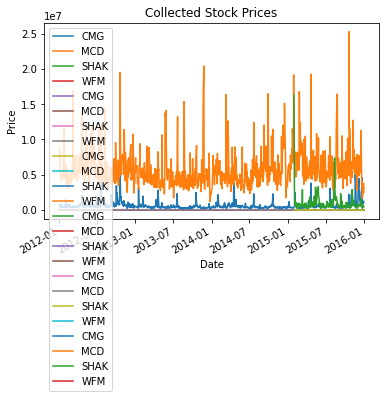

In [ ]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

**My own example 238**

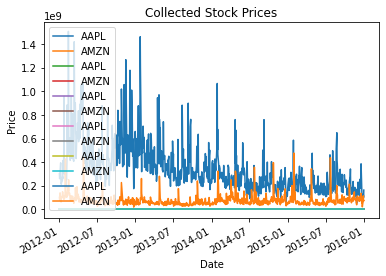

In [ ]:
prices_1.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [ ]:
prices.mean(axis=0)

CMG     5.016367e+02
MCD     7.598484e+01
SHAK    5.357571e+01
WFM              NaN
CMG     5.016367e+02
MCD     9.662160e+01
SHAK    5.357571e+01
WFM              NaN
CMG     5.065474e+02
MCD     9.717556e+01
SHAK    5.530241e+01
WFM              NaN
CMG     4.966217e+02
MCD     9.605330e+01
SHAK    5.198364e+01
WFM              NaN
CMG     5.015803e+02
MCD     9.659987e+01
SHAK    5.375524e+01
WFM              NaN
CMG     5.911719e+05
MCD     5.720530e+06
SHAK    8.949459e+05
WFM              NaN
dtype: float64

**My own example 239**

In [ ]:
prices_1.mean(axis=0)

AAPL    2.000817e+01
AMZN    1.662394e+01
AAPL    2.263639e+01
AMZN    1.662394e+01
AAPL    2.285469e+01
AMZN    1.680023e+01
AAPL    2.241962e+01
AMZN    1.643193e+01
AAPL    2.265185e+01
AMZN    1.662127e+01
AAPL    3.482186e+08
AMZN    7.522820e+07
dtype: float64

As well as the standard deviation:

In [ ]:
prices.std(axis=0)

CMG     1.466887e+02
MCD     6.445071e+00
SHAK    1.196859e+01
WFM              NaN
CMG     1.466887e+02
MCD     5.714226e+00
SHAK    1.196859e+01
WFM              NaN
CMG     1.475891e+02
MCD     5.704697e+00
SHAK    1.256933e+01
WFM              NaN
CMG     1.457928e+02
MCD     5.653356e+00
SHAK    1.142718e+01
WFM              NaN
CMG     1.468316e+02
MCD     5.664326e+00
SHAK    1.212512e+01
WFM              NaN
CMG     6.159315e+05
MCD     2.550258e+06
SHAK    1.243824e+06
WFM              NaN
dtype: float64

**My own example 240**

In [ ]:
prices_1.std(axis=0)

AAPL    5.133839e+00
AMZN    5.614767e+00
AAPL    5.368376e+00
AMZN    5.614767e+00
AAPL    5.412543e+00
AMZN    5.672429e+00
AAPL    5.323714e+00
AMZN    5.556253e+00
AAPL    5.376092e+00
AMZN    5.624528e+00
AAPL    2.062320e+08
AMZN    4.681837e+07
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [ ]:
prices.describe()

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,0.0,1006.000000,1006.000000,233.000000,0.0,1006.000000,1006.000000,...,233.000000,0.0,1006.000000,1006.000000,233.000000,0.0,1.006000e+03,1.006000e+03,2.330000e+02,0.0
mean,501.636650,75.984845,53.575708,NaN,501.636650,96.621600,53.575708,NaN,506.547406,97.175557,...,51.983639,NaN,501.580328,96.599871,53.755236,NaN,5.911719e+05,5.720530e+06,8.949459e+05,NaN
std,146.688738,6.445071,11.968587,NaN,146.688738,5.714226,11.968587,NaN,147.589064,5.704697,...,11.427183,NaN,146.831560,5.664326,12.125123,NaN,6.159315e+05,2.550258e+06,1.243824e+06,NaN
min,236.240005,63.333969,38.189999,NaN,236.240005,84.050003,38.189999,NaN,243.000000,84.389999,...,37.599998,NaN,234.449997,84.169998,38.189999,NaN,1.012000e+05,1.155900e+06,1.620000e+05,NaN
25%,371.555000,72.954218,44.119999,NaN,371.555000,93.672499,44.119999,NaN,374.037498,94.152502,...,43.021999,NaN,370.607498,93.699997,44.299999,NaN,3.189750e+05,4.163900e+06,4.211000e+05,NaN
50%,521.270020,75.672623,49.270000,NaN,521.270020,96.290001,49.270000,NaN,524.994995,96.970001,...,48.200001,NaN,521.285004,96.300003,49.450001,NaN,4.262500e+05,5.093650e+06,5.993000e+05,NaN
75%,646.834991,78.950665,61.669998,NaN,646.834991,99.137499,61.669998,NaN,651.910019,99.627499,...,59.720001,NaN,645.989990,99.027498,61.590000,NaN,6.282000e+05,6.509425e+06,9.364000e+05,NaN
max,757.770020,100.885590,92.860001,NaN,757.770020,120.070000,92.860001,NaN,758.609985,120.230003,...,90.120003,NaN,758.489990,119.639999,94.389999,NaN,9.795100e+06,2.528660e+07,1.626490e+07,NaN


**My own example 241**

In [ ]:
prices_1.describe()

,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,1.006000e+03
mean,20.008173,16.623935,22.636390,16.623935,22.854695,16.800233,22.419622,16.431928,22.651849,16.621272,3.482186e+08,7.522820e+07
std,5.133839,5.614767,5.368376,5.614767,5.412543,5.672429,5.323714,5.556253,5.376092,5.624528,2.062320e+08,4.681837e+07
min,12.046192,8.796500,13.947500,8.796500,14.271429,8.912500,13.753571,8.600000,13.856071,8.690500,5.218560e+07,1.968800e+07
25%,16.112059,12.895750,18.540000,12.895750,18.656965,12.990000,18.349554,12.758250,18.526607,12.880875,2.016794e+08,4.947400e+07
50%,18.481430,15.502000,21.550535,15.502000,21.679464,15.638500,21.264108,15.262500,21.470714,15.461750,2.895172e+08,6.340300e+07
75%,24.930106,18.757000,27.515625,18.757000,27.941249,18.961625,27.200001,18.653749,27.566875,18.779124,4.297790e+08,8.551950e+07
max,30.023243,34.698502,33.250000,34.698502,33.634998,34.821999,32.849998,34.319000,33.615002,34.594501,1.506120e+09,4.771220e+08


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [ ]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,632.539978,95.623291,NaN,NaN,632.539978,147.679993,NaN,NaN,650.979980,153.179993,...,NaN,NaN,637.400024,152.660004,NaN,NaN,1456150,17791750,NaN,NaN
2012-01-04,647.500000,96.433578,NaN,NaN,647.500000,148.779999,NaN,NaN,649.960022,150.600006,...,NaN,NaN,642.000000,148.220001,NaN,NaN,1486150,13509350,NaN,NaN
2012-01-05,650.960022,97.081863,NaN,NaN,650.960022,149.660004,NaN,NaN,653.960022,150.800003,...,NaN,NaN,643.760010,148.940002,NaN,NaN,1344550,16327550,NaN,NaN
2012-01-06,647.900024,98.216293,NaN,NaN,647.900024,151.199997,NaN,NaN,655.260010,151.539993,...,NaN,NaN,647.760010,150.179993,NaN,NaN,741350,13550550,NaN,NaN
2012-01-09,629.479980,96.801926,NaN,NaN,629.479980,149.279999,NaN,NaN,648.979980,151.860001,...,NaN,NaN,648.000000,151.759995,NaN,NaN,1497150,8867350,NaN,NaN


**My own example 242**

In [ ]:
(3 * prices_1 - 30).head(5)

,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN
Date,,,,,,,,,,,,
2012-01-03,7.500581,-3.145500,14.060357,-3.145500,14.196430,-3.078000,13.821430,-3.667500,13.864288,-3.616499,906662370,306647970
2012-01-04,7.702111,-3.373501,14.297141,-3.373501,14.430001,-2.925001,13.851428,-3.589499,13.928570,-3.118501,780065970,252311970
2012-01-05,8.120682,-3.358500,14.788928,-3.358500,14.844641,-3.262499,14.214641,-3.892499,14.458929,-3.609000,813808770,228545970
2012-01-06,8.519182,-2.608500,15.257143,-2.608500,15.294642,-2.302500,14.916430,-3.375000,14.975358,-3.289501,954878370,420503970
2012-01-09,8.458085,-3.215999,15.185357,-3.215999,15.830358,-2.344500,15.144642,-3.449999,15.589288,-2.586001,1182073170,303413970


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [ ]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,...,SHAK,WFM,CMG,MCD,SHAK,WFM,CMG,MCD,SHAK,WFM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,0.021918,0.005564,NaN,NaN,0.021918,0.005565,NaN,NaN,-0.001455,-0.012698,...,NaN,NaN,0.006692,-0.021909,NaN,NaN,0.020602,-0.240695,NaN,NaN
2012-01-05,0.004961,0.004427,NaN,NaN,0.004961,0.004427,NaN,NaN,0.005715,0.000997,...,NaN,NaN,0.002543,0.003632,NaN,NaN,-0.095277,0.208610,NaN,NaN
2012-01-06,-0.004365,0.007713,NaN,NaN,-0.004365,0.007713,NaN,NaN,0.001847,0.003685,...,NaN,NaN,0.005766,0.006233,NaN,NaN,-0.448609,-0.170080,NaN,NaN
2012-01-09,-0.026394,-0.009543,NaN,NaN,-0.026394,-0.009543,NaN,NaN,-0.008905,0.001588,...,NaN,NaN,0.000344,0.007893,NaN,NaN,1.019423,-0.345608,NaN,NaN
2012-01-10,0.004062,0.000602,NaN,NaN,0.004062,0.000602,NaN,NaN,-0.014736,-0.004756,...,NaN,NaN,-0.014842,-0.006344,NaN,NaN,-0.327411,0.144732,NaN,NaN


**My own example 243**

In [ ]:
mult_returns_1 = prices_1.pct_change()[1:]
mult_returns_1.head()

,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN,AAPL,AMZN
Date,,,,,,,,,,,,
2012-01-04,0.005374,-0.008490,0.005374,-0.008490,0.005285,0.005683,0.000685,0.002962,0.001465,0.018875,-0.139629,-0.177193
2012-01-05,0.011102,0.000563,0.011102,0.000563,0.009332,-0.012465,0.008283,-0.011473,0.012073,-0.018247,0.043256,-0.094193
2012-01-06,0.010454,0.028152,0.010454,0.028152,0.010035,0.035905,0.015872,0.019822,0.011616,0.012106,0.173345,0.839910
2012-01-09,-0.001586,-0.022178,-0.001586,-0.022178,0.011827,-0.001516,0.005081,-0.002817,0.013650,0.026338,0.237931,-0.278452
2012-01-10,0.003580,0.004368,0.003580,0.004368,-0.004091,-0.010685,0.000356,0.000565,0.000964,-0.009083,-0.344720,-0.211810


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

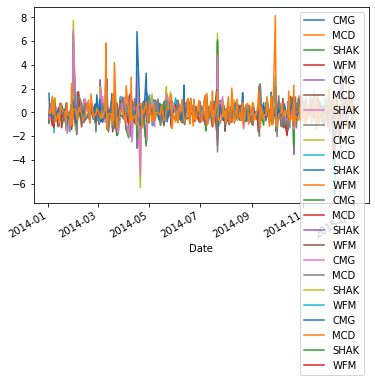

In [ ]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

**My own example 244**

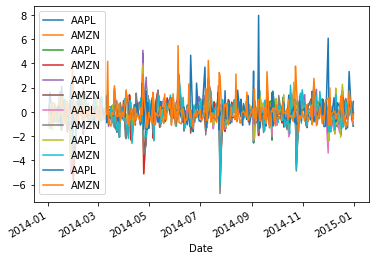

In [ ]:
norm_returns_1 = (mult_returns_1 - mult_returns_1.mean(axis=0))/mult_returns_1.std(axis=0)
norm_returns_1.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [ ]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

**My own example 245**

In [ ]:
rolling_mean_1 = prices_1.rolling(30).mean()
rolling_mean_1.columns = prices_1.columns

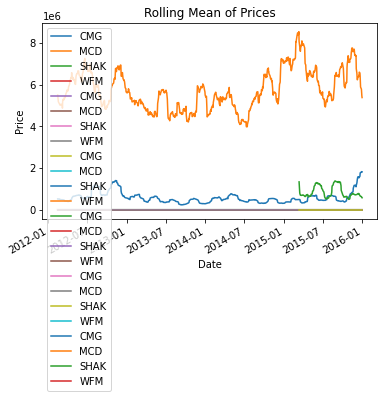

In [ ]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

**My own example 246**

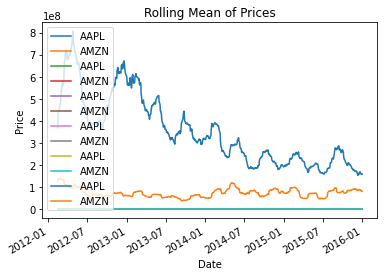

In [ ]:
rolling_mean_1.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">
</div>

Quantconnect

Introduction to Financial Python
</div>

# NumPy and Basic Pandas

# Introduction

Now that we have introduced the fundamentals of Python, it's time to learn about NumPy and Pandas.

# NumPy
NumPy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. It also has strong integration with Pandas, which is another powerful tool for manipulating financial data.

Python packages like NumPy and Pandas contain classes and methods which we can use by importing the package:

In [ ]:
import numpy as np

## Basic NumPy Arrays
A NumPy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. Here we make an array by passing a list of Apple stock prices:

In [ ]:
price_list = [143.73, 145.83, 143.68, 144.02, 143.5, 142.62]
price_array = np.array(price_list)
print(price_array, type(price_array))

[143.73 145.83 143.68 144.02 143.5  142.62] <class 'numpy.ndarray'>


**My own example 247**

In [ ]:
price_list2 = [25.723, 585.823, 563.6218, 314.99, 111.545, 333.652]
price_array2 = np.array(price_list2)
print(price_array2, type(price_array2))

[ 25.723  585.823  563.6218 314.99   111.545  333.652 ] <class 'numpy.ndarray'>


Notice that the type of array is "ndarray" which is a multi-dimensional array. If we pass np.array() a list of lists, it will create a 2-dimensional array.

In [ ]:
Ar = np.array([[1,3],[2,4]])
print(Ar, type(Ar))

[[1 3]
 [2 4]] <class 'numpy.ndarray'>


**My own example 248**

In [ ]:
Ar2 = np.array([[1,4], [10,20]])
print (Ar2, type(Ar2))

[[ 1  4]
 [10 20]] <class 'numpy.ndarray'>


We get the dimensions of an ndarray using the .shape attribute:

In [ ]:
print(Ar.shape)

(2, 2)


**My own example 249**

In [ ]:
print (Ar2.shape)

(2, 2)


If we create an 2-dimensional array (i.e. matrix), each row can be accessed by index:

In [ ]:
print(Ar[0])
print(Ar[1])

[1 3]
[2 4]


**My own example 250**

In [ ]:
print (Ar2[0])
print (Ar2[1])

[1 4]
[10 20]


If we want to access the matrix by column instead:

In [ ]:
print('the first column: ', Ar[:,0])
print('the second column: ', Ar[:,1])

the first column:  [1 2]
the second column:  [3 4]


**My own example 251**

In [ ]:
print ('First column:', Ar_2[:,0])
print ('Second column:', Ar_2[:,1])
print ('Third column:', Ar_2[:,2])

First column: [1 4]
Second column: [2 5]
Third column: [3 6]


## Array Functions
Some functions built in NumPy that allow us to perform calculations on arrays. For example, we can apply the natural logarithm to each element of an array:

In [ ]:
print(np.log(price_array))

[4.96793654 4.98244156 4.9675886  4.96995218 4.96633504 4.96018375]


**My own example 252**

In [ ]:
np.log(score_array)

array([1.25276297, 1.38629436, 1.22377543, 1.45861502, 0.91629073,
       1.60943791])

Other functions return a single value:

In [ ]:
print(np.mean(price_array))
print(np.std(price_array))
print(np.sum(price_array))
print(np.max(price_array))

143.89666666666668
0.9673790478515796
863.38
145.83


The functions above return the mean, standard deviation, total and maximum value of an array.

# Pandas
Pandas is one of the most powerful tools for dealing with financial data. 

First we need to import Pandas:

In [ ]:
import pandas as pd

## Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, float, Python object, etc.)

We create a Series by calling pd.Series(data), where data can be a dictionary, an array or just a scalar value.

In [ ]:
price = [143.73, 145.83, 143.68, 144.02, 143.5, 142.62]
s = pd.Series(price)
s

0    143.73
1    145.83
2    143.68
3    144.02
4    143.50
5    142.62
dtype: float64


**My own example 253**

In [ ]:
price2 = [342,123.34,123.52,2341.54,23.4,234,3,1.324,123]
s2 = pd.Series(price)
s2

0    143.73
1    145.83
2    143.68
3    144.02
4    143.50
5    142.62
dtype: float64

We can customize the indices of a new Series:

In [ ]:
s = pd.Series(price,index = ['a','b','c','d','e','f'])
s

a    143.73
b    145.83
c    143.68
d    144.02
e    143.50
f    142.62
dtype: float64

**My own example 254**

In [ ]:
s2 = pd.Series(score, index = ['1.0', '2.0', '3.0', '4.0', '5.0','6.0'])
print (s2)

1    3.5
2    4.0
3    3.4
4    4.3
5    2.5
6    5.0
dtype: float64


Or we can change the indices of an existing Series:

In [ ]:
s.index = [6,5,4,3,2,1]
s

6    143.73
5    145.83
4    143.68
3    144.02
2    143.50
1    142.62
dtype: float64

**My own example 255**

In [ ]:
s2.index = [1,2,3,4,5,6]
print (s2)

1    3.5
2    4.0
3    3.4
4    4.3
5    2.5
6    5.0
dtype: float64


Series is like a list since it can be sliced by index:

In [ ]:
print(s[1:])
print(s[:-2])

5    145.83
4    143.68
3    144.02
2    143.50
1    142.62
dtype: float64
6    143.73
5    145.83
4    143.68
3    144.02
dtype: float64


**My own example 256**

In [ ]:
print (s2[3:])
print (s2[:3])

4    4.3
5    2.5
6    5.0
dtype: float64
1    3.5
2    4.0
3    3.4
dtype: float64


Series is also like a dictionary whose values can be set or fetched by index label:

In [ ]:
print(s[4])
s[4] = 0
print(s)

143.68
6    143.73
5    145.83
4      0.00
3    144.02
2    143.50
1    142.62
dtype: float64


**My own example 257**

In [ ]:
print (s2[3])
s2[3] = 3
print (s2)

3.4
1    3.5
2    4.0
3    3.0
4    4.3
5    2.5
6    5.0
dtype: float64


Series can also have a name attribute, which will be used when we make up a Pandas DataFrame using several series.

In [ ]:
s = pd.Series(price, name = 'Apple Price List')
print(s)
print(s.name)

0    143.73
1    145.83
2    143.68
3    144.02
4    143.50
5    142.62
Name: Apple Price List, dtype: float64
Apple Price List


**My own example 258**

In [ ]:
s2 = pd.Series(score, name = 'Puntajes')
print (s2)
print (s2.name)

0    3.5
1    4.0
2    3.4
3    4.3
4    2.5
5    5.0
Name: Puntajes, dtype: float64
Puntajes


We can get the statistical summaries of a Series:

In [ ]:
print(s.describe())

count      6.000000
mean     143.896667
std        1.059711
min      142.620000
25%      143.545000
50%      143.705000
75%      143.947500
max      145.830000
Name: Apple Price List, dtype: float64


**My own example 259**

In [ ]:
print (s2.describe())

count    6.000000
mean     3.783333
std      0.856543
min      2.500000
25%      3.425000
50%      3.750000
75%      4.225000
max      5.000000
Name: Puntajes, dtype: float64


## Time Index
Pandas has a built-in function specifically for creating date indices: pd.date_range(). We use it to create a new index for our Series:

In [ ]:
time_index = pd.date_range('2017-01-01',periods = len(s),freq = 'D')
print(time_index)
s.index = time_index
print(s)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')
2017-01-01    143.73
2017-01-02    145.83
2017-01-03    143.68
2017-01-04    144.02
2017-01-05    143.50
2017-01-06    142.62
Freq: D, Name: Apple Price List, dtype: float64


Series are usually accessed using the iloc[] and loc[] methods. iloc[] is used to access elements by integer index, and loc[] is used to access the index of the series.

iloc[] is necessary when the index of a series are integers, take our previous defined series as example:

In [ ]:
s.index = [6,5,4,3,2,1]
print(s)
print(s[1])

6    143.73
5    145.83
4    143.68
3    144.02
2    143.50
1    142.62
Name: Apple Price List, dtype: float64
142.62


If we intended to take the second element of the series, we would make a mistake here, because the index are integers. In order to access to the element we want, we use iloc[] here:

In [ ]:
print(s.iloc[1])

145.83


While working with time series data, we often use time as the index. Pandas provides us with various methods to access the data by time index

In [ ]:
s.index = time_index
print(s['2017-01-03'])

143.68


We can even access to a range of dates:

In [ ]:
print(s['2017-01-02':'2017-01-05'])

2017-01-02    145.83
2017-01-03    143.68
2017-01-04    144.02
2017-01-05    143.50
Freq: D, Name: Apple Price List, dtype: float64


Series[] provides us a very flexible way to index data. We can add any condition in the square brackets:

In [ ]:
print(s[s < np.mean(s)] )
print([(s > np.mean(s)) & (s < np.mean(s) + 1.64*np.std(s))])

2017-01-01    143.73
2017-01-03    143.68
2017-01-05    143.50
2017-01-06    142.62
Name: Apple Price List, dtype: float64
[2017-01-01    False
2017-01-02    False
2017-01-03    False
2017-01-04     True
2017-01-05    False
2017-01-06    False
Freq: D, Name: Apple Price List, dtype: bool]


As demonstrated, we can use logical operators like & (and), | (or) and ~ (not) to group multiple conditions.

# Summary
Here we have introduced NumPy and Pandas for scientific computing in Python. In the next chapter, we will dive into Pandas to learn resampling and manipulating Pandas DataFrame, which are commonly used in financial data analysis.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png"> <img style="display: block; margin: auto;" alt="photo" src="https://www.marketing-branding.com/wp-content/uploads/2020/07/google-colaboratory-colab-guia-completa.jpg " width="50" height="50">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/commons/3/37/Yahoo_Finance_Logo_2019.png" width="50" height="50">  
</div>

Quantconnect -> Google Colab with Yahoo Finance data

Introduction to Financial Python
</div>

# Pandas-Resampling and DataFrame

# Introduction
In the last chapter we had a glimpse of Pandas. In this chapter we will learn about resampling methods and the DataFrame object, which is a powerful tool for financial data analysis.

# Fetching Data
Here we use the Yahoo Finance to retrieve data.


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

aapl = yf.Ticker("AAPL")

# get stock info
#print(aapl.info)

# get historical market data
aapl_table = aapl.history(start="2016-01-01",  end="2017-12-31")
aapl_table

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,23.448587,24.079307,23.309189,24.074736,270597600,0.0,0.0
2016-01-05 00:00:00-05:00,24.166147,24.188999,23.402886,23.471441,223164000,0.0,0.0
2016-01-06 00:00:00-05:00,22.980115,23.393740,22.822436,23.012108,273829600,0.0,0.0
2016-01-07 00:00:00-05:00,22.550499,22.881855,22.036326,22.040895,324377600,0.0,0.0
2016-01-08 00:00:00-05:00,22.520796,22.648768,22.111742,22.157446,283192000,0.0,0.0
...,...,...,...,...,...,...,...
2017-12-22 00:00:00-05:00,41.462480,41.638129,41.419756,41.540810,65397600,0.0,0.0
2017-12-26 00:00:00-05:00,40.541519,40.700552,40.275671,40.486927,132742000,0.0,0.0
2017-12-27 00:00:00-05:00,40.375364,40.536769,40.282793,40.494045,85992800,0.0,0.0


In [ ]:
aapl = aapl_table['Close']['2017']

Recall that we can fetch a specific data point using series['yyyy-mm-dd']. We can also fetch the data in a specific month using series['yyyy-mm'].

In [ ]:
print(aapl['2017-3'])

Date
2017-03-01 00:00:00-05:00    32.797348
2017-03-02 00:00:00-05:00    32.602615
2017-03-03 00:00:00-05:00    32.795010
2017-03-06 00:00:00-05:00    32.691780
2017-03-07 00:00:00-05:00    32.734013
2017-03-08 00:00:00-05:00    32.612011
2017-03-09 00:00:00-05:00    32.536919
2017-03-10 00:00:00-05:00    32.644844
2017-03-13 00:00:00-04:00    32.658936
2017-03-14 00:00:00-04:00    32.609657
2017-03-15 00:00:00-04:00    32.954552
2017-03-16 00:00:00-04:00    33.008503
2017-03-17 00:00:00-04:00    32.844276
2017-03-20 00:00:00-04:00    33.189167
2017-03-21 00:00:00-04:00    32.809082
2017-03-22 00:00:00-04:00    33.179775
2017-03-23 00:00:00-04:00    33.062473
2017-03-24 00:00:00-04:00    32.996780
2017-03-27 00:00:00-04:00    33.053085
2017-03-28 00:00:00-04:00    33.738178
2017-03-29 00:00:00-04:00    33.813251
2017-03-30 00:00:00-04:00    33.768669
2017-03-31 00:00:00-04:00    33.705326
Name: Close, dtype: float64


.head(N) and .tail(N) are methods for quickly accessing the first or last N elements.

In [ ]:
print(aapl.head(5))
print(aapl.tail(10))

Date
2017-01-03 00:00:00-05:00    27.133326
2017-01-04 00:00:00-05:00    27.102961
2017-01-05 00:00:00-05:00    27.240786
2017-01-06 00:00:00-05:00    27.544472
2017-01-09 00:00:00-05:00    27.796770
Name: Close, dtype: float64
Date
2017-12-15 00:00:00-05:00    41.293957
2017-12-18 00:00:00-05:00    41.875492
2017-12-19 00:00:00-05:00    41.429245
2017-12-20 00:00:00-05:00    41.384167
2017-12-21 00:00:00-05:00    41.540810
2017-12-22 00:00:00-05:00    41.540810
2017-12-26 00:00:00-05:00    40.486927
2017-12-27 00:00:00-05:00    40.494045
2017-12-28 00:00:00-05:00    40.607979
2017-12-29 00:00:00-05:00    40.168861
Name: Close, dtype: float64


# Resampling
**_series.resample(freq)_** is a class called "DatetimeIndexResampler" which groups data in a Series object into regular time intervals. The argument "freq" determines the length of each interval.

**_series.resample.mean()_** is a complete statement that groups data into intervals, and then compute the mean of each interval. For example, if we want to aggregate the daily data into monthly data by mean:

In [ ]:
by_month = aapl.resample('M').mean()
print(by_month)

Date
2017-01-31 00:00:00-05:00    27.932259
2017-02-28 00:00:00-05:00    31.330267
2017-03-31 00:00:00-04:00    32.991576
2017-04-30 00:00:00-04:00    33.523928
2017-05-31 00:00:00-04:00    35.810209
2017-06-30 00:00:00-04:00    34.827169
2017-07-31 00:00:00-04:00    34.937454
2017-08-31 00:00:00-04:00    37.566285
2017-09-30 00:00:00-04:00    37.276347
2017-10-31 00:00:00-04:00    37.325723
2017-11-30 00:00:00-05:00    40.873830
2017-12-31 00:00:00-05:00    40.800599
Freq: M, Name: Close, dtype: float64


We can also aggregate the data by week:

In [ ]:
by_week = aapl.resample('W').mean()
print(by_week.head())

Date
2017-01-08 00:00:00-05:00    27.255386
2017-01-15 00:00:00-05:00    27.852365
2017-01-22 00:00:00-05:00    28.019280
2017-01-29 00:00:00-05:00    28.304626
2017-02-05 00:00:00-05:00    29.403508
Freq: W-SUN, Name: Close, dtype: float64


We can also aggregate the data by month with max:

In [ ]:
aapl.resample('M').max()

Date
2017-01-31 00:00:00-05:00    28.488237
2017-02-28 00:00:00-05:00    32.168571
2017-03-31 00:00:00-04:00    33.813251
2017-04-30 00:00:00-04:00    33.965752
2017-05-31 00:00:00-04:00    36.775154
2017-06-30 00:00:00-04:00    36.622032
2017-07-31 00:00:00-04:00    36.153210
2017-08-31 00:00:00-04:00    38.788017
2017-09-30 00:00:00-04:00    38.799843
2017-10-31 00:00:00-04:00    39.980038
2017-11-30 00:00:00-05:00    41.682922
2017-12-31 00:00:00-05:00    41.875492
Freq: M, Name: Close, dtype: float64

We can choose almost any frequency by using the format 'nf', where 'n' is an integer and 'f' is M for month, W for week and D for day.

In [ ]:
three_day = aapl.resample('3D').mean()
two_week = aapl.resample('2W').mean()
two_month = aapl.resample('2M').mean()


print(three_day)
print(two_week)
print(two_month )

Date
2017-01-03 00:00:00-05:00    27.159024
2017-01-06 00:00:00-05:00    27.544472
2017-01-09 00:00:00-05:00    27.865291
2017-01-12 00:00:00-05:00    27.832975
2017-01-15 00:00:00-05:00    28.032713
                               ...    
2017-12-17 00:00:00-05:00    41.652369
2017-12-20 00:00:00-05:00    41.488595
2017-12-23 00:00:00-05:00          NaN
2017-12-26 00:00:00-05:00    40.529650
2017-12-29 00:00:00-05:00    40.168861
Freq: 3D, Name: Close, Length: 121, dtype: float64
Date
2017-01-08 00:00:00-05:00    27.255386
2017-01-22 00:00:00-05:00    27.926549
2017-02-05 00:00:00-05:00    28.854067
2017-02-19 00:00:00-05:00    31.241590
2017-03-05 00:00:00-05:00    32.310908
2017-03-19 00:00:00-04:00    32.729549
2017-04-02 00:00:00-04:00    33.331579
2017-04-16 00:00:00-04:00    33.554128
2017-04-30 00:00:00-04:00    33.496747
2017-05-14 00:00:00-04:00    35.385896
2017-05-28 00:00:00-04:00    36.177467
2017-06-11 00:00:00-04:00    36.196132
2017-06-25 00:00:00-04:00    34.227516
201

Besides the mean() method, other methods can also be used with the resampler:



In [ ]:
std = aapl.resample('W').std()
max = aapl.resample('W').max()
min = aapl.resample('W').min()


print(std)
print(max)
print(min)

Date
2017-01-08 00:00:00-05:00    0.201590
2017-01-15 00:00:00-05:00    0.071893
2017-01-22 00:00:00-05:00    0.025333
2017-01-29 00:00:00-05:00    0.243144
2017-02-05 00:00:00-05:00    0.935025
2017-02-12 00:00:00-05:00    0.249802
2017-02-19 00:00:00-05:00    0.229369
2017-02-26 00:00:00-05:00    0.058825
2017-03-05 00:00:00-05:00    0.337122
2017-03-12 00:00:00-05:00    0.075623
2017-03-19 00:00:00-04:00    0.176279
2017-03-26 00:00:00-04:00    0.155889
2017-04-02 00:00:00-04:00    0.317015
2017-04-09 00:00:00-04:00    0.127563
2017-04-16 00:00:00-04:00    0.210622
2017-04-23 00:00:00-04:00    0.173146
2017-04-30 00:00:00-04:00    0.089239
2017-05-07 00:00:00-04:00    0.233576
2017-05-14 00:00:00-04:00    0.349899
2017-05-21 00:00:00-04:00    0.531413
2017-05-28 00:00:00-04:00    0.059867
2017-06-04 00:00:00-04:00    0.278773
2017-06-11 00:00:00-04:00    0.614623
2017-06-18 00:00:00-04:00    0.379224
2017-06-25 00:00:00-04:00    0.127767
2017-07-02 00:00:00-04:00    0.261801
2017-07

Often we want to calculate monthly returns of a stock, based on prices on the last day of each month. To fetch those prices, we use the series.resample.agg() method:

In [ ]:
last_day = aapl.resample('M').agg(lambda x: x[-1])
print(last_day)

Date
2017-01-31 00:00:00-05:00    28.348072
2017-02-28 00:00:00-05:00    32.140415
2017-03-31 00:00:00-04:00    33.705326
2017-04-30 00:00:00-04:00    33.702972
2017-05-31 00:00:00-04:00    35.988289
2017-06-30 00:00:00-04:00    33.929253
2017-07-31 00:00:00-04:00    35.038872
2017-08-31 00:00:00-04:00    38.788017
2017-09-30 00:00:00-04:00    36.451271
2017-10-31 00:00:00-04:00    39.980038
2017-11-30 00:00:00-05:00    40.790745
2017-12-31 00:00:00-05:00    40.168861
Freq: M, Name: Close, dtype: float64


Or directly calculate the monthly rates of return using the data for the first day and the last day:

In [ ]:
monthly_return = aapl.resample('M').agg(lambda x: x[-1]/x[0] - 1)
print(monthly_return)

Date
2017-01-31 00:00:00-05:00    0.044770
2017-02-28 00:00:00-05:00    0.068613
2017-03-31 00:00:00-04:00    0.027684
2017-04-30 00:00:00-04:00   -0.000348
2017-05-31 00:00:00-04:00    0.046463
2017-06-30 00:00:00-04:00   -0.059799
2017-07-31 00:00:00-04:00    0.036446
2017-08-31 00:00:00-04:00    0.097261
2017-09-30 00:00:00-04:00   -0.060530
2017-10-31 00:00:00-04:00    0.099018
2017-11-30 00:00:00-05:00    0.033422
2017-12-31 00:00:00-05:00   -0.010640
Freq: M, Name: Close, dtype: float64


Series object also provides us some convenient methods to do some quick calculation.

In [ ]:
print(monthly_return.mean())
print(monthly_return.std())
print(monthly_return.max())

0.026863270900429958
0.052258522213127476
0.09901835750737553


Another two methods frequently used on Series are .diff() and .pct_change(). The former calculates the difference between consecutive elements, and the latter calculates the percentage change.

In [ ]:
print(last_day.diff())
print(last_day.pct_change())

Date
2017-01-31 00:00:00-05:00         NaN
2017-02-28 00:00:00-05:00    3.792343
2017-03-31 00:00:00-04:00    1.564911
2017-04-30 00:00:00-04:00   -0.002354
2017-05-31 00:00:00-04:00    2.285316
2017-06-30 00:00:00-04:00   -2.059036
2017-07-31 00:00:00-04:00    1.109619
2017-08-31 00:00:00-04:00    3.749146
2017-09-30 00:00:00-04:00   -2.336746
2017-10-31 00:00:00-04:00    3.528767
2017-11-30 00:00:00-05:00    0.810707
2017-12-31 00:00:00-05:00   -0.621883
Freq: M, Name: Close, dtype: float64
Date
2017-01-31 00:00:00-05:00         NaN
2017-02-28 00:00:00-05:00    0.133778
2017-03-31 00:00:00-04:00    0.048690
2017-04-30 00:00:00-04:00   -0.000070
2017-05-31 00:00:00-04:00    0.067808
2017-06-30 00:00:00-04:00   -0.057214
2017-07-31 00:00:00-04:00    0.032704
2017-08-31 00:00:00-04:00    0.107000
2017-09-30 00:00:00-04:00   -0.060244
2017-10-31 00:00:00-04:00    0.096808
2017-11-30 00:00:00-05:00    0.020278
2017-12-31 00:00:00-05:00   -0.015246
Freq: M, Name: Close, dtype: float64


Notice that we induced a NaN value while calculating percentage changes i.e. returns.

When dealing with NaN values, we usually either removing the data point or fill it with a specific value. Here we fill it with 0:

In [ ]:
daily_return = last_day.pct_change()
print(daily_return.fillna(0))

Date
2017-01-31 00:00:00-05:00    0.000000
2017-02-28 00:00:00-05:00    0.133778
2017-03-31 00:00:00-04:00    0.048690
2017-04-30 00:00:00-04:00   -0.000070
2017-05-31 00:00:00-04:00    0.067808
2017-06-30 00:00:00-04:00   -0.057214
2017-07-31 00:00:00-04:00    0.032704
2017-08-31 00:00:00-04:00    0.107000
2017-09-30 00:00:00-04:00   -0.060244
2017-10-31 00:00:00-04:00    0.096808
2017-11-30 00:00:00-05:00    0.020278
2017-12-31 00:00:00-05:00   -0.015246
Freq: M, Name: Close, dtype: float64


Alternatively, we can fill a NaN with the next fitted value. This is called 'backward fill', or 'bfill' in short:

In [ ]:
daily_return = last_day.pct_change()
print(daily_return.fillna(method = 'bfill'))

Date
2017-01-31 00:00:00-05:00    0.133778
2017-02-28 00:00:00-05:00    0.133778
2017-03-31 00:00:00-04:00    0.048690
2017-04-30 00:00:00-04:00   -0.000070
2017-05-31 00:00:00-04:00    0.067808
2017-06-30 00:00:00-04:00   -0.057214
2017-07-31 00:00:00-04:00    0.032704
2017-08-31 00:00:00-04:00    0.107000
2017-09-30 00:00:00-04:00   -0.060244
2017-10-31 00:00:00-04:00    0.096808
2017-11-30 00:00:00-05:00    0.020278
2017-12-31 00:00:00-05:00   -0.015246
Freq: M, Name: Close, dtype: float64


As expected, since there is a 'backward fill' method, there must be a 'forward fill' method, or 'ffill' in short. However we can't use it here because the NaN is the first value.

We can also simply remove NaN values by **_.dropna()_**

In [ ]:
daily_return = last_day.pct_change()
daily_return.dropna()

Date
2017-02-28 00:00:00-05:00    0.133778
2017-03-31 00:00:00-04:00    0.048690
2017-04-30 00:00:00-04:00   -0.000070
2017-05-31 00:00:00-04:00    0.067808
2017-06-30 00:00:00-04:00   -0.057214
2017-07-31 00:00:00-04:00    0.032704
2017-08-31 00:00:00-04:00    0.107000
2017-09-30 00:00:00-04:00   -0.060244
2017-10-31 00:00:00-04:00    0.096808
2017-11-30 00:00:00-05:00    0.020278
2017-12-31 00:00:00-05:00   -0.015246
Freq: M, Name: Close, dtype: float64

# DataFrame
The **DataFrame** is the most commonly used data structure in Pandas. It is essentially a table, just like an Excel spreadsheet.

More precisely, a DataFrame is a collection of Series objects, each of which may contain different data types. A DataFrame can be created from various data types: dictionary, 2-D numpy.ndarray, a Series or another DataFrame.

## Create DataFrames
The most common method of creating a DataFrame is passing a dictionary:

In [ ]:
import pandas as pd

dict = {'AAPL': [143.5, 144.09, 142.73, 144.18, 143.77],'GOOG':[898.7, 911.71, 906.69, 918.59, 926.99],
        'IBM':[155.58, 153.67, 152.36, 152.94, 153.49]}
data_index = pd.date_range('2017-07-03',periods = 5, freq = 'D')
df = pd.DataFrame(dict, index = data_index)
print(df)

              AAPL    GOOG     IBM
2017-07-03  143.50  898.70  155.58
2017-07-04  144.09  911.71  153.67
2017-07-05  142.73  906.69  152.36
2017-07-06  144.18  918.59  152.94
2017-07-07  143.77  926.99  153.49


## Manipulating DataFrames
We can fetch values in a DataFrame by columns and index. Each column in a DataFrame is essentially a Pandas Series. We can fetch a column by square brackets: **df['column_name']**

If a column name contains no spaces, then we can also use df.column_name to fetch a column:

In [ ]:
df = aapl_table
print(df.Close.tail(5))
print(df['Volume'].tail(5))

Date
2017-12-22 00:00:00-05:00    41.540810
2017-12-26 00:00:00-05:00    40.486927
2017-12-27 00:00:00-05:00    40.494045
2017-12-28 00:00:00-05:00    40.607979
2017-12-29 00:00:00-05:00    40.168861
Name: Close, dtype: float64
Date
2017-12-22 00:00:00-05:00     65397600
2017-12-26 00:00:00-05:00    132742000
2017-12-27 00:00:00-05:00     85992800
2017-12-28 00:00:00-05:00     65920800
2017-12-29 00:00:00-05:00    103999600
Name: Volume, dtype: int64


All the methods we applied to a Series index such as iloc[], loc[] and resampling methods, can also be applied to a DataFrame:

In [ ]:
aapl_2016 = df['2016']
aapl_month = aapl_2016.resample('M').agg(lambda x: x[-1])
print(aapl_month)

                                Open       High        Low      Close  \
Date                                                                    
2016-01-31 00:00:00-05:00  21.661551  22.244280  21.561001  22.244280   
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645   
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710   
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846   
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675   
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940   
2016-07-31 00:00:00-04:00  24.084603  24.167821  23.966711  24.089226   
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979   
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254   
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134   
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127   
2016-12-31 00:00:00-05:00  27.250132  27.378614  26

<ipython-input-3795-b2f3be7087f4>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aapl_2016 = df['2016']


We may select certain columns of a DataFrame using their names:

In [ ]:
aapl_bar = aapl_month[['Open', 'High', 'Low', 'Close']]
print(aapl_bar)

                                Open       High        Low      Close
Date                                                                 
2016-01-31 00:00:00-05:00  21.661551  22.244280  21.561001  22.244280
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940
2016-07-31 00:00:00-04:00  24.084603  24.167821  23.966711  24.089226
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127
2016-12-31 00:00:00-05:00  27.250132  27.378614  26.965132  27.056238


We can even specify both rows and columns using loc[]. The row indices and column names are separated by a comma:

In [ ]:
print(aapl_month.loc['2016-03':'2016-06',['Open', 'High', 'Low', 'Close']])

                                Open       High        Low      Close
Date                                                                 
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940


The subset methods in DataFrame is quite useful. By writing logical statements in square brackets, we can make customized subsets:

In [ ]:
import numpy as np

above = aapl_bar[aapl_bar.Close > np.mean(aapl_bar.Close)]
print(above)

                                Open       High        Low      Close
Date                                                                 
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127
2016-12-31 00:00:00-05:00  27.250132  27.378614  26.965132  27.056238


## Data Validation
As mentioned, all methods that apply to a Series can also be applied to a DataFrame. Here we add a new column to an existing DataFrame:

In [ ]:
aapl_bar['rate_return'] = aapl_bar.Close.pct_change()
print(aapl_bar)

                                Open       High        Low      Close  \
Date                                                                    
2016-01-31 00:00:00-05:00  21.661551  22.244280  21.561001  22.244280   
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645   
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710   
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846   
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675   
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940   
2016-07-31 00:00:00-04:00  24.084603  24.167821  23.966711  24.089226   
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979   
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254   
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134   
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127   
2016-12-31 00:00:00-05:00  27.250132  27.378614  26

<ipython-input-3799-f3fe1efaa757>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_bar['rate_return'] = aapl_bar.Close.pct_change()


Here the calculation introduced a NaN value. If the DataFrame is large, we would not be able to observe it. **isnull()** provides a convenient way to check abnormal values.

In [ ]:
missing = aapl_bar.isnull()
print(missing)
print('---------------------------------------------')
print(missing.describe())

                            Open   High    Low  Close  rate_return
Date                                                              
2016-01-31 00:00:00-05:00  False  False  False  False         True
2016-02-29 00:00:00-05:00  False  False  False  False        False
2016-03-31 00:00:00-04:00  False  False  False  False        False
2016-04-30 00:00:00-04:00  False  False  False  False        False
2016-05-31 00:00:00-04:00  False  False  False  False        False
2016-06-30 00:00:00-04:00  False  False  False  False        False
2016-07-31 00:00:00-04:00  False  False  False  False        False
2016-08-31 00:00:00-04:00  False  False  False  False        False
2016-09-30 00:00:00-04:00  False  False  False  False        False
2016-10-31 00:00:00-04:00  False  False  False  False        False
2016-11-30 00:00:00-05:00  False  False  False  False        False
2016-12-31 00:00:00-05:00  False  False  False  False        False
---------------------------------------------
         Open   

The row labelled "unique" indicates the number of unique values in each column. Since the "rate_return" column has 2 unique values, it has at least one missing value.

We can deduce the number of missing values by comparing "count" with "freq". There are 12 counts and 11 False values, so there is one True value which corresponds to the missing value.

We can also find the rows with missing values easily:

In [ ]:
print(missing[missing.rate_return == True])

                            Open   High    Low  Close  rate_return
Date                                                              
2016-01-31 00:00:00-05:00  False  False  False  False         True


Usually when dealing with missing data, we either delete the whole row or fill it with some value. As we introduced in the Series chapter, the same method **dropna()** and **fillna()** can be applied to a DataFrame.

In [ ]:
drop = aapl_bar.dropna()
print(drop)
print('\n--------------------------------------------------\n')
fill = aapl_bar.fillna(0)
print(fill)

                                Open       High        Low      Close  \
Date                                                                    
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645   
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710   
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846   
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675   
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940   
2016-07-31 00:00:00-04:00  24.084603  24.167821  23.966711  24.089226   
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979   
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254   
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134   
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127   
2016-12-31 00:00:00-05:00  27.250132  27.378614  26.965132  27.056238   

                           rate_return  
Date     

## DataFrame Concat
We have seen how to extract a Series from a dataFrame. Now we need to consider how to merge a Series or a DataFrame into another one.

In Pandas, the function **concat()** allows us to merge multiple Series into a DataFrame:

In [ ]:
s1 = pd.Series([143.5, 144.09, 142.73, 144.18, 143.77], name = 'AAPL')
s2 = pd.Series([898.7, 911.71, 906.69, 918.59, 926.99], name = 'GOOG')
data_frame = pd.concat([s1,s2], axis = 1)
print(data_frame)

     AAPL    GOOG
0  143.50  898.70
1  144.09  911.71
2  142.73  906.69
3  144.18  918.59
4  143.77  926.99


The "axis = 1" parameter will join two DataFrames by columns:

In [ ]:
log_price = np.log(aapl_bar.Close)
log_price.name = 'log_price'
print(log_price)
print('\n---------------------- separate line--------------------\n')
concat = pd.concat([aapl_bar, log_price], axis = 1)
print(concat)

Date
2016-01-31 00:00:00-05:00    3.102085
2016-02-29 00:00:00-05:00    3.100797
2016-03-31 00:00:00-04:00    3.220543
2016-04-30 00:00:00-04:00    3.069812
2016-05-31 00:00:00-04:00    3.139126
2016-06-30 00:00:00-04:00    3.095530
2016-07-31 00:00:00-04:00    3.181765
2016-08-31 00:00:00-04:00    3.205141
2016-09-30 00:00:00-04:00    3.268590
2016-10-31 00:00:00-04:00    3.272914
2016-11-30 00:00:00-05:00    3.251077
2016-12-31 00:00:00-05:00    3.297918
Freq: M, Name: log_price, dtype: float64

---------------------- separate line--------------------

                                Open       High        Low      Close  \
Date                                                                    
2016-01-31 00:00:00-05:00  21.661551  22.244280  21.561001  22.244280   
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645   
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710   
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846   
2

We can also join two DataFrames by rows. Consider these two DataFrames:

In [ ]:
df_volume = aapl_table.loc['2016-10':'2017-04',['Volume', 'Stock Splits']].resample('M').agg(lambda x: x[-1])
print(df_volume)
print('\n---------------------- separate line--------------------\n')
df_2017 = aapl_table.loc['2016-10':'2017-04',['Open', 'High', 'Low', 'Close']].resample('M').agg(lambda x: x[-1])
print(df_2017)

                              Volume  Stock Splits
Date                                              
2016-10-31 00:00:00-04:00  105677600           0.0
2016-11-30 00:00:00-05:00  144649200           0.0
2016-12-31 00:00:00-05:00  122345200           0.0
2017-01-31 00:00:00-05:00  196804000           0.0
2017-02-28 00:00:00-05:00   93931600           0.0
2017-03-31 00:00:00-04:00   78646800           0.0
2017-04-30 00:00:00-04:00   83441600           0.0

---------------------- separate line--------------------

                                Open       High        Low      Close
Date                                                                 
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127
2016-12-31 00:00:00-05:00  27.250132  27.378614  26.965132  27.056238
2017-01-31 00:00:00-05:00  28.301352  28.357417  28.177541  28.348072
2017-02-28 00:00:00-05:00  32.161530  32.245993  32.072374  32

Now we merge the DataFrames with our DataFrame 'aapl_bar'

In [ ]:
concat = pd.concat([aapl_bar, df_volume], axis = 1)
print(concat)

                                Open       High        Low      Close  \
Date                                                                    
2016-01-31 00:00:00-05:00  21.661551  22.244280  21.561001  22.244280   
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645   
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710   
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846   
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675   
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940   
2016-07-31 00:00:00-04:00  24.084603  24.167821  23.966711  24.089226   
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979   
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254   
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134   
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127   
2016-12-31 00:00:00-05:00  27.250132  27.378614  26

By default the DataFrame are joined with all of the data. This default options results in zero information loss. We can also merge them by intersection, this is called 'inner join

In [ ]:
concat = pd.concat([aapl_bar,df_volume],axis = 1, join = 'inner')
print(concat)

                                Open       High        Low      Close  \
Date                                                                    
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134   
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127   
2016-12-31 00:00:00-05:00  27.250132  27.378614  26.965132  27.056238   

                           rate_return     Volume  Stock Splits  
Date                                                             
2016-10-31 00:00:00-04:00     0.004334  105677600           0.0  
2016-11-30 00:00:00-05:00    -0.021601  144649200           0.0  
2016-12-31 00:00:00-05:00     0.047955  122345200           0.0  


Only the intersection part was left if use 'inner join' method. Now let's try to append a DataFrame to another one:

In [ ]:
append = aapl_bar.append(df_2017)
print(append)

                                Open       High        Low      Close  \
Date                                                                    
2016-01-31 00:00:00-05:00  21.661551  22.244280  21.561001  22.244280   
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645   
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710   
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846   
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675   
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940   
2016-07-31 00:00:00-04:00  24.084603  24.167821  23.966711  24.089226   
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979   
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254   
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134   
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127   
2016-12-31 00:00:00-05:00  27.250132  27.378614  26

'Append' is essentially to concat two DataFrames by axis = 0, thus here is an alternative way to append:

In [ ]:
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print(concat)

                                Open       High        Low      Close  \
Date                                                                    
2016-01-31 00:00:00-05:00  21.661551  22.244280  21.561001  22.244280   
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645   
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710   
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846   
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675   
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940   
2016-07-31 00:00:00-04:00  24.084603  24.167821  23.966711  24.089226   
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979   
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254   
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134   
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127   
2016-12-31 00:00:00-05:00  27.250132  27.378614  26

Please note that if the two DataFrame have some columns with the same column names, these columns are considered to be the same and will be merged. It's very important to have the right column names. If we change a column names here:

In [ ]:
df_2017.columns = ['Change', 'High','Low','Close']
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print(concat)

                                Open       High        Low      Close  \
Date                                                                    
2016-01-31 00:00:00-05:00  21.661551  22.244280  21.561001  22.244280   
2016-02-29 00:00:00-05:00  22.254704  22.569478  22.206454  22.215645   
2016-03-31 00:00:00-04:00  25.209437  25.250794  25.016436  25.041710   
2016-04-30 00:00:00-04:00  21.595286  21.763013  21.255240  21.537846   
2016-05-31 00:00:00-04:00  23.023573  23.208502  22.843268  23.083675   
2016-06-30 00:00:00-04:00  21.830795  22.138237  21.798432  22.098940   
2016-07-31 00:00:00-04:00  24.084603  24.167821  23.966711  24.089226   
2016-08-31 00:00:00-04:00  24.556719  24.768214  24.552070  24.658979   
2016-09-30 00:00:00-04:00  26.137129  26.348626  25.983738  26.274254   
2016-10-31 00:00:00-04:00  26.413700  26.548499  26.309113  26.388134   
2016-11-30 00:00:00-05:00  26.070422  26.210585  25.759725  25.818127   
2016-12-31 00:00:00-05:00  27.250132  27.378614  26

Since the column name of 'Open' has been changed, the new DataFrame has an new column named 'Change'.

# Summary

Hereby we introduced the most import part of python: resampling and DataFrame manipulation. We only introduced the most commonly used method in Financial data analysis. There are also many methods used in data mining, which are also beneficial. You can always check the [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) official documentations for help.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div>

# Colab Yahoo Graphical Representations of Data
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



Representing data graphically can be incredibly useful for learning how the data behaves and seeing potential structure or flaws. Care should be taken, as humans are incredibly good at seeing only evidence that confirms our beliefs, and visual data lends itself well to that. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

We will go over some common plots here.

In [ ]:
# Import our libraries

# This is for numerical processing
import numpy as np
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Getting Some Data

If we're going to plot data we need some data to plot. We'll get the pricing data of Apple (AAPL) and Microsoft (MSFT) to use in our examples.

### Data Structure

Knowing the structure of your data is very important. Normally you'll have to do a ton of work molding your data into the form you need for testing. Quantopian has done a lot of cleaning on the data, but you still need to put it into the right shapes and formats for your purposes.

In this case the data will be returned as a pandas dataframe object. The rows are timestamps, and the columns are the two assets, AAPL and MSFT.

In [ ]:
import yfinance as yf

data_all = yf.download("AAPL,MSFT", start="2014-01-01", end="2015-01-01")
data_all.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
                 AAPL       MSFT       AAPL       MSFT       AAPL       MSFT   
Date                                                                           
2014-01-02  17.388979  31.489397  19.754642  37.160000  19.893929  37.400002   
2014-01-03  17.007019  31.277550  19.320715  36.910000  19.775000  37.220001   
2014-01-06  17.099756  30.616581  19.426071  36.130001  19.528570  36.889999   
2014-01-07  16.977467  30.853853  19.287144  36.410000  19.498571  36.490002   
2014-01-08  17.084982  30.303047  19.409286  35.759998  19.484285  36.139999   

                  Low                  Open                Volume            
                 AAPL       MSFT       AAPL       MSFT       AAPL      MSFT  
Date                                                                         
2014-01-02  19.715000  37.099998  19.845715  37.349998  234684800  30632200  
2014-01-03  19.301071  36.599998  19.745001  37.200001  392467600  31134800  
2014-01-06  19.057142  36.110001  19.194643  36.849998  412610800  43603700  
2014-01-07  19.211430  36.209999  19.440001  36.330002  317209200  35802800  
2014-01-08  19.238930  35.580002  19.243214  36.000000  258529600  59971700

In [ ]:
data = data_all["Close"]
data.head()

,AAPL,MSFT
Date,,
2014-01-02,19.754642,37.160000
2014-01-03,19.320715,36.910000
2014-01-06,19.426071,36.130001
2014-01-07,19.287144,36.410000
2014-01-08,19.409286,35.759998


In [ ]:
data['MSFT'].head()

Date
2014-01-02    37.160000
2014-01-03    36.910000
2014-01-06    36.130001
2014-01-07    36.410000
2014-01-08    35.759998
Name: MSFT, dtype: float64

##Histogram

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, it lets us quickly see where most of the observations are clustered. The height of each bar represents the number of observations that lie in each interval. You can think of a histogram as an empirical and discrete Probability Density Function (PDF).

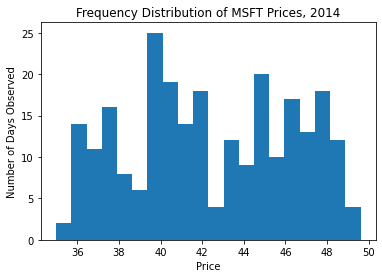

In [ ]:
# Plot a histogram using 20 bins
plt.hist(data['MSFT'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

### Returns Histogram

In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot. For more info on non-stationarity please see [this lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity). Instead we will use daily returns. Let's try that now.

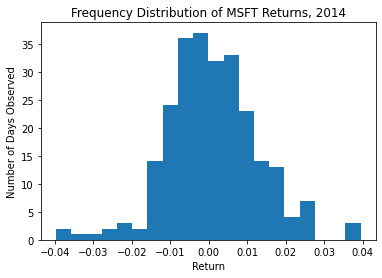

In [ ]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

The graph above shows, for example, that the daily returns of MSFT were above 0.03 on fewer than 5 days in 2014. Note that we are completely discarding the dates corresponding to these returns. 

#####IMPORTANT: Note also that this does not imply that future returns will have the same distribution.

### Cumulative Histogram (Discrete Estimated CDF)

An alternative way to display the data would be using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing since you cannot have a negative number of observations. The choice of graph depends on the information you are interested in.

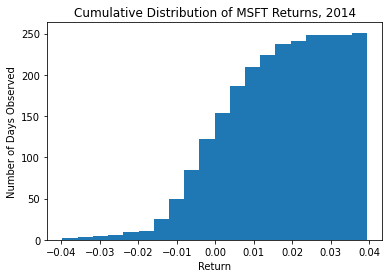

In [ ]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

## Scatter plot

A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

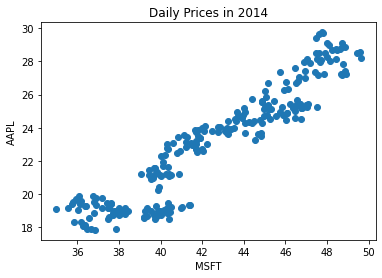

In [ ]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

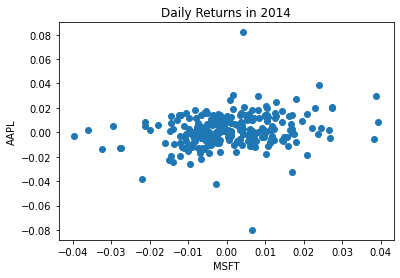

In [ ]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

# Line graph

A line graph can be used when we want to track the development of the y value as the x value changes. For instance, when we are plotting the price of a stock, showing it as a line graph instead of just plotting the data points makes it easier to follow the price over time. This necessarily involves "connecting the dots" between the data points, which can mask out changes that happened between the time we took measurements.

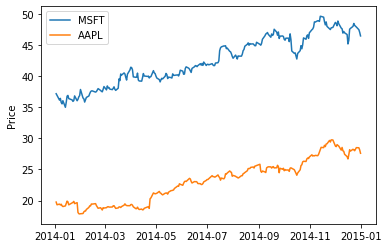

In [ ]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

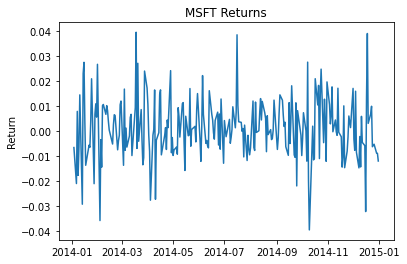

In [ ]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

## Never Assume Conditions Hold

Again, whenever using plots to visualize data, do not assume you can test a hypothesis by looking at a graph. Also do not assume that because a distribution or trend used to be true, it is still true. In general much more sophisticated and careful validation is required to test whether models hold. Plots are mainly useful when initially deciding how your models should work.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*